In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

Quels sont les pays avec un fort potentiel de clients pour nos services ?  
Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?  
Dans quels pays l'entreprise doit-elle opérer en priorité ?  

# Nettoyage 

In [2]:
# EdStatsCountry-Series

StatsCountryS = pd.read_csv("EdStatsCountry-Series.csv",sep=',')
StatsCountryS

CountryCode         SeriesCode                                        DESCRIPTION  Unnamed: 3
0           ABW        SP.POP.TOTL  Data sources : United Nations World Population...         NaN
1           ABW        SP.POP.GROW  Data sources: United Nations World Population ...         NaN
2           AFG        SP.POP.GROW  Data sources: United Nations World Population ...         NaN
3           AFG  NY.GDP.PCAP.PP.CD                 Estimates are based on regression.         NaN
4           AFG        SP.POP.TOTL  Data sources : United Nations World Population...         NaN
..          ...                ...                                                ...         ...
608         ZAF        SP.POP.GROW  Data sources : Statistics South Africa, United...         NaN
609         ZMB        SP.POP.GROW  Data sources: United Nations World Population ...         NaN
610         ZMB        SP.POP.TOTL  Data sources : United Nations World Population...         NaN
611         ZWE        SP.POP.TOTL  Data sources : United Nations World Population...         NaN
612         ZWE        SP.POP.GROW  Data sources: United Nations World Population ...         NaN

[613 rows x 4 columns]

In [3]:
# EdStatsCountry

StatsCountry = pd.read_csv("EdStatsCountry.csv",sep=',')
StatsCountry

Country Code                                      Short Name                                      Table Name                                          Long Name 2-alpha code                               Currency Unit                                      Special Notes                      Region          Income Group WB-2 code                        National accounts base year  National accounts reference year                   SNA price valuation Lending category Other groups  \
0            ABW                                           Aruba                                           Aruba                                              Aruba           AW                               Aruban florin  SNA data for 2000-2011 are updated from offici...   Latin America & Caribbean  High income: nonOECD        AW                                               2000                               NaN     Value added at basic prices (VAB)              NaN          NaN   
1            AFG                                     Afghanistan                                     Afghanistan                       Islamic State of Afghanistan           AF                              Afghan afghani  Fiscal year end: March 20; reporting period fo...                  South Asia            Low income        AF                                            2002/03                               NaN     Value added at basic prices (VAB)              IDA         HIPC   
2            AGO                                          Angola                                          Angola                        People's Republic of Angola           AO                              Angolan kwanza  April 2013 database update: Based on IMF data,...          Sub-Saharan Africa   Upper middle income        AO                                               2002                               NaN  Value added at producer prices (VAP)             IBRD          NaN   
3            ALB                                         Albania                                         Albania                                Republic of Albania           AL                                Albanian lek                                                NaN       Europe & Central Asia   Upper middle income        AL  Original chained constant price data are resca...                            1996.0     Value added at basic prices (VAB)             IBRD          NaN   
4            AND                                         Andorra                                         Andorra                            Principality of Andorra           AD                                        Euro                                                NaN       Europe & Central Asia  High income: nonOECD        AD                                               1990                               NaN                                   NaN              NaN          NaN   
5            ARB                                      Arab World                                      Arab World                                         Arab World           1A                                         NaN  Arab World aggregate. Arab World is composed o...                         NaN                   NaN        1A                                                NaN                               NaN                                   NaN              NaN          NaN   
6            ARE                            United Arab Emirates                            United Arab Emirates                               United Arab Emirates           AE                               U.A.E. dirham  April 2013 database update: Based on data from...  Middle East & North Africa  High income: nonOECD        AE                                               2007                               NaN  Value added at producer prices (VAP)              NaN          NaN   
7            ARG                                       Argentina                                    

In [4]:
# EdStatsFootNote

StatsFootNote = pd.read_csv("EdStatsFootNote.csv",sep=',')
StatsFootNote

CountryCode      SeriesCode    Year                             DESCRIPTION  Unnamed: 4
0              ABW  SE.PRE.ENRL.FE  YR2001                     Country estimation.         NaN
1              ABW  SE.TER.TCHR.FE  YR2005                     Country estimation.         NaN
2              ABW  SE.PRE.TCHR.FE  YR2000                     Country estimation.         NaN
3              ABW  SE.SEC.ENRL.GC  YR2004                     Country estimation.         NaN
4              ABW     SE.PRE.TCHR  YR2006                     Country estimation.         NaN
...            ...             ...     ...                                     ...         ...
643633         ZWE     SH.DYN.MORT  YR2007       Uncertainty bound is 91.6 - 109.3         NaN
643634         ZWE     SH.DYN.MORT  YR2014          Uncertainty bound is 54.3 - 76         NaN
643635         ZWE     SH.DYN.MORT  YR2015        Uncertainty bound is 48.3 - 73.3         NaN
643636         ZWE     SH.DYN.MORT  YR2017  5-year average value between 0s and 5s         NaN
643637         ZWE     SP.POP.GROW  YR2017  5-year average value between 0s and 5s         NaN

[643638 rows x 5 columns]

In [5]:
# EdStatsSeries

StatsSeries = pd.read_csv("EdStatsSeries.csv",sep=',')
StatsSeries

Series Code         Topic                                     Indicator Name                                   Short definition                                    Long definition  Unit of measure Periodicity Base Period Other notes Aggregation method Limitations and exceptions  Notes from original source General comments                                             Source Statistical concept and methodology Development relevance Related source links  Other web links  \
0             BAR.NOED.1519.FE.ZS    Attainment  Barro-Lee: Percentage of female population age...  Percentage of female population age 15-19 with...  Percentage of female population age 15-19 with...              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN  Robert J. Barro and Jong-Wha Lee: http://www.b...                                 NaN                   NaN                  NaN              NaN   
1                BAR.NOED.1519.ZS    Attainment  Barro-Lee: Percentage of population age 15-19 ...  Percentage of population age 15-19 with no edu...  Percentage of population age 15-19 with no edu...              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN  Robert J. Barro and Jong-Wha Lee: http://www.b...                                 NaN                   NaN                  NaN              NaN   
2             BAR.NOED.15UP.FE.ZS    Attainment  Barro-Lee: Percentage of female population age...  Percentage of female population age 15+ with n...  Percentage of female population age 15+ with n...              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN  Robert J. Barro and Jong-Wha Lee: http://www.b...                                 NaN                   NaN                  NaN              NaN   
3                BAR.NOED.15UP.ZS    Attainment  Barro-Lee: Percentage of population age 15+ wi...  Percentage of population age 15+ with no educa...  Percentage of population age 15+ with no educa...              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN  Robert J. Barro and Jong-Wha Lee: http://www.b...                                 NaN                   NaN                  NaN              NaN   
4             BAR.NOED.2024.FE.ZS    Attainment  Barro-Lee: Percentage of female population age...  Percentage of female population age 20-24 with...  Percentage of female population age 20-24 with...              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN  Robert J. Barro and Jong-Wha Lee: http://www.b...                                 NaN                   NaN                  NaN              NaN   
...                           ...           ...                                                ...                                                ...                                                ...              ...         ...         ...         ...                ...                        ...                         ...              ...                                                ...                                 ...                   ...                  ...              ...   
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures  Government expenditure per upper secondary stu...                                                NaN  Average total (current, capital and transfers)...              NaN         NaN         NaN         NaN                NaN                        NaN                         NaN              NaN                    UNESCO Institute for Statistics                                 NaN                   NaN                  NaN              NaN   
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures  Government ex

In [6]:
# EdStatsData

StatsData = pd.read_csv("EdStatsData.csv",sep=',')
StatsData

Country Name Country Code                                     Indicator Name        Indicator Code       1970       1971       1972       1973       1974      1975       1976      1977      1978       1979       1980       1981          1982       1983       1984       1985       1986      1987       1988       1989       1990       1991          1992       1993       1994      1995       1996       1997       1998       1999       2000       2001       2002       2003       2004  \
0        Arab World          ARB  Adjusted net enrolment rate, lower secondary, ...            UIS.NERA.2        NaN        NaN        NaN        NaN        NaN       NaN        NaN       NaN       NaN        NaN        NaN        NaN           NaN        NaN        NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN           NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
1        Arab World          ARB  Adjusted net enrolment rate, lower secondary, ...          UIS.NERA.2.F        NaN        NaN        NaN        NaN        NaN       NaN        NaN       NaN       NaN        NaN        NaN        NaN           NaN        NaN        NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN           NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
2        Arab World          ARB  Adjusted net enrolment rate, lower secondary, ...        UIS.NERA.2.GPI        NaN        NaN        NaN        NaN        NaN       NaN        NaN       NaN       NaN        NaN        NaN        NaN           NaN        NaN        NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN           NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
3        Arab World          ARB  Adjusted net enrolment rate, lower secondary, ...          UIS.NERA.2.M        NaN        NaN        NaN        NaN        NaN       NaN        NaN       NaN       NaN        NaN        NaN        NaN           NaN        NaN        NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN           NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
4        Arab World          ARB  Adjusted net enrolment rate, primary, both sex...           SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  60.999962  61.92268  62.69342  64.383186  65.617767  66.085152     66.608139  67.290451  68.510094  69.033211  69.944908  71.04187  71.693779  71.699097  71.995819  72.602837     70.032722  70.464821  72.645683  71.81176  73.903511  74.425201  75.110817  76.254318  77.245682  78.800522  80.051399  80.805389  81.607063   
...             ...          ...                                                ...                   ...        ...        ...        ...        ...        ...       ...        ...       ...       ...        ...        ...        ...           ...        ...        ...        ...        ...       ...        ...        ...        ...        ...           ...        ...        ...       ...        ...        ...        ...        ...        ...        ...        ...        ...        ...   
886925     Zimbabwe          ZWE  Youth illiterate population, 15-24 years, male...      UIS.LP.AG15T24.M        NaN        NaN        NaN        NaN        NaN       NaN        NaN       NaN       NaN        NaN        NaN        NaN  47631.000000        NaN        NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN  38800.000000        NaN        NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
886926     Zimbabwe          ZWE  Youth literac

In [7]:
# Suppression des données dupliquées

StatsDataDupp = StatsData.duplicated()
StatsDataDupp

0         False
1         False
2         False
3         False
4         False
          ...  
886925    False
886926    False
886927    False
886928    False
886929    False
Length: 886930, dtype: bool

In [8]:
true_count = sum(StatsDataDupp)
true_count

0

In [9]:
StatsData.drop_duplicates(keep='first', inplace=True)
StatsData

Country Name Country Code                                     Indicator Name        Indicator Code       1970       1971       1972       1973       1974      1975       1976      1977      1978       1979       1980       1981          1982       1983       1984       1985       1986      1987       1988       1989       1990       1991          1992       1993       1994      1995       1996       1997       1998       1999       2000       2001       2002       2003       2004  \
0        Arab World          ARB  Adjusted net enrolment rate, lower secondary, ...            UIS.NERA.2        NaN        NaN        NaN        NaN        NaN       NaN        NaN       NaN       NaN        NaN        NaN        NaN           NaN        NaN        NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN           NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
1        Arab World          ARB  Adjusted net enrolment rate, lower secondary, ...          UIS.NERA.2.F        NaN        NaN        NaN        NaN        NaN       NaN        NaN       NaN       NaN        NaN        NaN        NaN           NaN        NaN        NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN           NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
2        Arab World          ARB  Adjusted net enrolment rate, lower secondary, ...        UIS.NERA.2.GPI        NaN        NaN        NaN        NaN        NaN       NaN        NaN       NaN       NaN        NaN        NaN        NaN           NaN        NaN        NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN           NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
3        Arab World          ARB  Adjusted net enrolment rate, lower secondary, ...          UIS.NERA.2.M        NaN        NaN        NaN        NaN        NaN       NaN        NaN       NaN       NaN        NaN        NaN        NaN           NaN        NaN        NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN           NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
4        Arab World          ARB  Adjusted net enrolment rate, primary, both sex...           SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  60.999962  61.92268  62.69342  64.383186  65.617767  66.085152     66.608139  67.290451  68.510094  69.033211  69.944908  71.04187  71.693779  71.699097  71.995819  72.602837     70.032722  70.464821  72.645683  71.81176  73.903511  74.425201  75.110817  76.254318  77.245682  78.800522  80.051399  80.805389  81.607063   
...             ...          ...                                                ...                   ...        ...        ...        ...        ...        ...       ...        ...       ...       ...        ...        ...        ...           ...        ...        ...        ...        ...       ...        ...        ...        ...        ...           ...        ...        ...       ...        ...        ...        ...        ...        ...        ...        ...        ...        ...   
886925     Zimbabwe          ZWE  Youth illiterate population, 15-24 years, male...      UIS.LP.AG15T24.M        NaN        NaN        NaN        NaN        NaN       NaN        NaN       NaN       NaN        NaN        NaN        NaN  47631.000000        NaN        NaN        NaN        NaN       NaN        NaN        NaN        NaN        NaN  38800.000000        NaN        NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
886926     Zimbabwe          ZWE  Youth literac

In [10]:
tx = StatsData.loc[:,'1970':'2100'].count()/len(StatsData)
tx

1970    0.081504
1971    0.040067
1972    0.040160
1973    0.040076
1974    0.040285
1975    0.098436
1976    0.042262
1977    0.042364
1978    0.042366
1979    0.041502
1980    0.100484
1981    0.043720
1982    0.042293
1983    0.043363
1984    0.043528
1985    0.101807
1986    0.044391
1987    0.043567
1988    0.043467
1989    0.042326
1990    0.140265
1991    0.083927
1992    0.085174
1993    0.085455
1994    0.087337
1995    0.148108
1996    0.086599
1997    0.082817
1998    0.095739
1999    0.133989
2000    0.199199
2001    0.139255
2002    0.140039
2003    0.146982
2004    0.145236
2005    0.207579
2006    0.158200
2007    0.154772
2008    0.151519
2009    0.160225
2010    0.273350
2011    0.164626
2012    0.166038
2013    0.155039
2014    0.128295
2015    0.147766
2016    0.018558
2017    0.000161
2020    0.057993
2025    0.057993
2030    0.057993
2035    0.057993
2040    0.057993
2045    0.057993
2050    0.057993
2055    0.057993
2060    0.057993
2065    0.057993
2070    0.0579

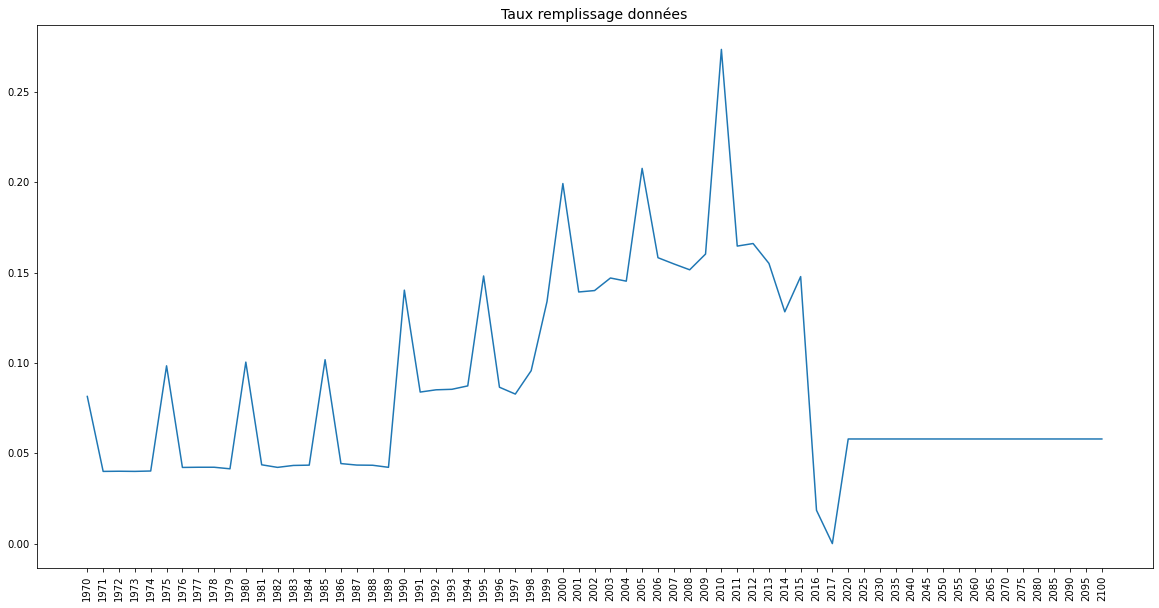

In [11]:
plt.figure(figsize=(20, 10))
plt.title('Taux remplissage données',fontsize=14)
plt.plot(tx ,label='Value count')
plt.xticks(rotation=90)
plt.show()

In [12]:
# Suppression des Zones / pays qui n'ont qu'une donnée

StatsData_ok = StatsData.copy()
StatsData_ok = StatsData_ok.dropna(thresh=6)
StatsData_ok = StatsData_ok.dropna(axis=1, how='all')
StatsData_ok

Country Name Country Code                                     Indicator Name        Indicator Code       1970       1971       1972       1973       1974       1975       1976       1977       1978       1979       1980       1981          1982       1983       1984       1985       1986       1987       1988       1989       1990       1991          1992       1993       1994       1995       1996       1997       1998       1999       2000       2001       2002       2003       2004  \
4        Arab World          ARB  Adjusted net enrolment rate, primary, both sex...           SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109  57.991138  59.365540  60.999962  61.922680  62.693420  64.383186  65.617767  66.085152     66.608139  67.290451  68.510094  69.033211  69.944908  71.041870  71.693779  71.699097  71.995819  72.602837     70.032722  70.464821  72.645683  71.811760  73.903511  74.425201  75.110817  76.254318  77.245682  78.800522  80.051399  80.805389  81.607063   
5        Arab World          ARB   Adjusted net enrolment rate, primary, female (%)        SE.PRM.TENR.FE  43.351101  43.318150  44.640701  45.845718  46.449501  48.363892  50.046188  51.245281  52.242321  54.754372  56.486790  57.314659     58.226051  59.289230  60.748180  61.520870  62.734951  64.115883  65.099663  65.129204  65.827492  66.797028     63.260429  63.972111  67.033043  65.761559  68.780800  69.267052  70.435387  72.047287  73.275620  75.132980  76.641022  77.653580  78.485397   
6        Arab World          ARB  Adjusted net enrolment rate, primary, gender p...        UIS.NERA.1.GPI   0.658570   0.656400   0.663290   0.672040   0.672610   0.691760   0.699950   0.710140   0.718430   0.743740   0.759440   0.769250      0.779860   0.790710   0.799610   0.806770   0.816060   0.825130   0.834190   0.834760   0.844660   0.854320      0.826490   0.834080   0.859090   0.847310   0.872660   0.872690   0.884940   0.897370   0.904060   0.912750   0.919790   0.926300   0.927680   
7        Arab World          ARB     Adjusted net enrolment rate, primary, male (%)        SE.PRM.TENR.MA  65.826233  65.993584  67.301857  68.219078  69.059013  69.914551  71.499512  72.162064  72.717690  73.619972  74.379982  74.507133     74.662628  74.981827  75.972542  76.255493  76.875053  77.703857  78.039368  78.021889  77.933853  78.187492     76.541100  76.697418  78.028130  77.611900  78.817490  79.372040  79.593536  80.287529  81.051369  82.315048  83.324059  83.832230  84.604393   
12       Arab World          ARB  Adjusted net intake rate to Grade 1 of primary...            UIS.NIRA.1  52.448921  52.489750  52.635593  53.327000  54.184654  54.865627  58.701626  58.876965  59.452522  62.776375  62.559566  62.594330     62.447292  63.409138  65.837379  64.613091  65.926895  66.775635  66.447350  66.931831  67.080444  67.508705     67.653282  67.444687  68.652267  69.208015  68.651680  69.611557  66.867638  68.321686  70.737579  73.594200  74.976158  75.328583  76.428513   
...             ...          ...                                                ...                   ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...           ...        ...        ...        ...        ...        ...        ...        ...        ...        ...           ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...   
886925     Zimbabwe          ZWE  Youth illiterate population, 15-24 years, male...      UIS.LP.AG15T24.M        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  47631.000000        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  38800.000000        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN   
886926 

In [13]:
tx_1 = StatsData_ok.count()/len(StatsData_ok)
tx_1

Country Name      1.000000
Country Code      1.000000
Indicator Name    1.000000
Indicator Code    1.000000
1970              0.226031
1971              0.111149
1972              0.111582
1973              0.111303
1974              0.111923
1975              0.273375
1976              0.117445
1977              0.117683
1978              0.117651
1979              0.115198
1980              0.279019
1981              0.121462
1982              0.117492
1983              0.120400
1984              0.120829
1985              0.282911
1986              0.123286
1987              0.121070
1988              0.120744
1989              0.117489
1990              0.389350
1991              0.232871
1992              0.236534
1993              0.237446
1994              0.242181
1995              0.409443
1996              0.240135
1997              0.229487
1998              0.264476
1999              0.370499
2000              0.551203
2001              0.385264
2002              0.387561
2

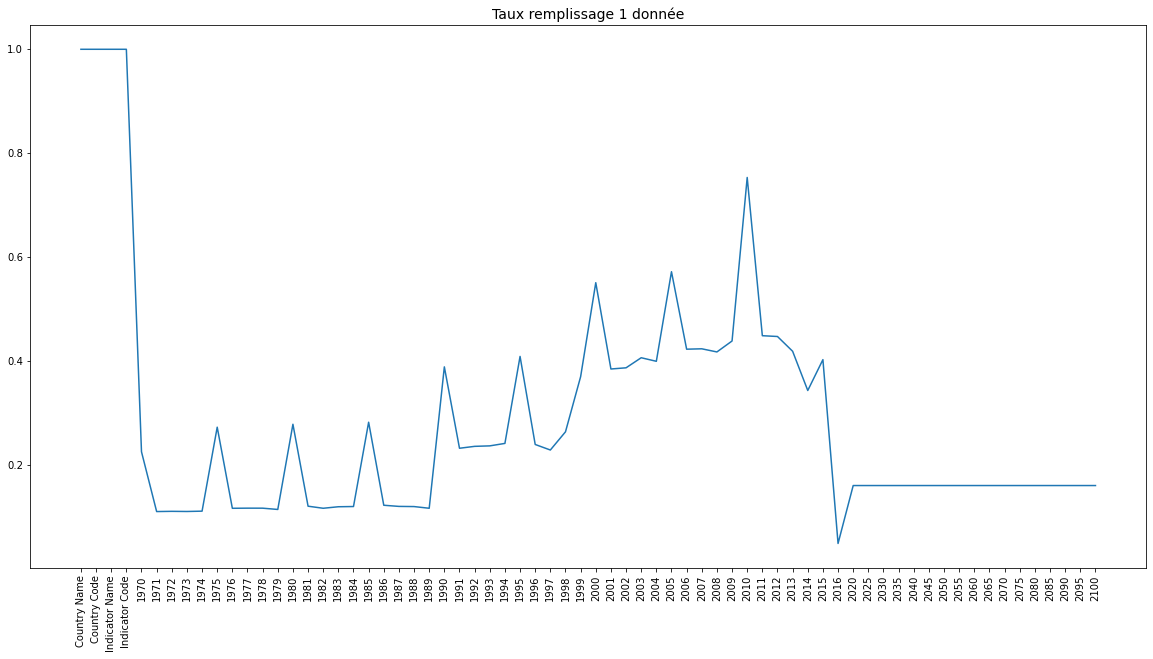

In [14]:
plt.figure(figsize=(20, 10))
plt.title('Taux remplissage 1 donnée',fontsize=14)
plt.plot(tx_1 ,label='Value count')
plt.xticks(rotation=90)
plt.show()

In [15]:
StatsData_ok['Country Name'].unique().tolist()

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Berm

In [16]:
# Isolement des zones géographiques

StatsData_zone = StatsData_ok.loc[StatsData_ok["Country Name"].isin(['Arab World',
                                                                  'East Asia & Pacific',
                                                                  'East Asia & Pacific (excluding high income)',
                                                                  'Euro area',
                                                                  'Europe & Central Asia',
                                                                  'Europe & Central Asia (excluding high income)',
                                                                  'European Union',
                                                                  'Heavily indebted poor countries (HIPC)',
                                                                  'High income',
                                                                  'Latin America & Caribbean',
                                                                  'Latin America & Caribbean (excluding high income)',
                                                                  'Least developed countries: UN classification',
                                                                  'Low & middle income',
                                                                  'Low income',
                                                                  'Lower middle income',
                                                                  'Middle East & North Africa',
                                                                  'Middle East & North Africa (excluding high income)',
                                                                  'Middle income',
                                                                  'North America',
                                                                  'OECD members',
                                                                  'South Asia',
                                                                  'Sub-Saharan Africa',
                                                                  'Sub-Saharan Africa (excluding high income)',
                                                                  'Upper middle income',
                                                                  'World'])]

StatsData_zone

Country Name Country Code                                     Indicator Name        Indicator Code       1970       1971       1972       1973       1974       1975       1976       1977       1978       1979       1980       1981       1982       1983       1984          1985          1986          1987          1988          1989          1990          1991          1992          1993          1994          1995          1996          1997          1998          1999          2000  \
4       Arab World          ARB  Adjusted net enrolment rate, primary, both sex...           SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109  57.991138  59.365540  60.999962  61.922680  62.693420  64.383186  65.617767  66.085152  66.608139  67.290451  68.510094  6.903321e+01  6.994491e+01  7.104187e+01  7.169378e+01  7.169910e+01  7.199582e+01  7.260284e+01  7.003272e+01  7.046482e+01  7.264568e+01  7.181176e+01  7.390351e+01  7.442520e+01  7.511082e+01  7.625432e+01  7.724568e+01   
5       Arab World          ARB   Adjusted net enrolment rate, primary, female (%)        SE.PRM.TENR.FE  43.351101  43.318150  44.640701  45.845718  46.449501  48.363892  50.046188  51.245281  52.242321  54.754372  56.486790  57.314659  58.226051  59.289230  60.748180  6.152087e+01  6.273495e+01  6.411588e+01  6.509966e+01  6.512920e+01  6.582749e+01  6.679703e+01  6.326043e+01  6.397211e+01  6.703304e+01  6.576156e+01  6.878080e+01  6.926705e+01  7.043539e+01  7.204729e+01  7.327562e+01   
6       Arab World          ARB  Adjusted net enrolment rate, primary, gender p...        UIS.NERA.1.GPI   0.658570   0.656400   0.663290   0.672040   0.672610   0.691760   0.699950   0.710140   0.718430   0.743740   0.759440   0.769250   0.779860   0.790710   0.799610  8.067700e-01  8.160600e-01  8.251300e-01  8.341900e-01  8.347600e-01  8.446600e-01  8.543200e-01  8.264900e-01  8.340800e-01  8.590900e-01  8.473100e-01  8.726600e-01  8.726900e-01  8.849400e-01  8.973700e-01  9.040600e-01   
7       Arab World          ARB     Adjusted net enrolment rate, primary, male (%)        SE.PRM.TENR.MA  65.826233  65.993584  67.301857  68.219078  69.059013  69.914551  71.499512  72.162064  72.717690  73.619972  74.379982  74.507133  74.662628  74.981827  75.972542  7.625549e+01  7.687505e+01  7.770386e+01  7.803937e+01  7.802189e+01  7.793385e+01  7.818749e+01  7.654110e+01  7.669742e+01  7.802813e+01  7.761190e+01  7.881749e+01  7.937204e+01  7.959354e+01  8.028753e+01  8.105137e+01   
12      Arab World          ARB  Adjusted net intake rate to Grade 1 of primary...            UIS.NIRA.1  52.448921  52.489750  52.635593  53.327000  54.184654  54.865627  58.701626  58.876965  59.452522  62.776375  62.559566  62.594330  62.447292  63.409138  65.837379  6.461309e+01  6.592690e+01  6.677563e+01  6.644735e+01  6.693183e+01  6.708044e+01  6.750871e+01  6.765328e+01  6.744469e+01  6.865227e+01  6.920802e+01  6.865168e+01  6.961156e+01  6.686764e+01  6.832169e+01  7.073758e+01   
...            ...          ...                                                ...                   ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...        ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...   
91619        World          WLD  Youth illiterate population, 15-24 years, fema...      UIS.LP.AG15T24.F        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN  1.059540e+08  1.059540e+08  1.059540e+08  1.059540e+08  1.059540e+08  1.059540e+08  1.059540e+08  1.059540e+08  1.059540e+08  1.059540e+08  8.602780e+07  8.602780e+07  8.602780e+07  8.602780e+07  8.602780e+07  8.602780e+07   
91621        World          WL

In [142]:
StatsData_zone_count = StatsData_zone['Country Name'].unique().tolist()
len(StatsData_zone_count)

25

In [134]:
# Isolement des pays uniques

StatsData_unique = StatsData_ok.loc[~StatsData_ok["Country Name"].isin(['Arab World',
                                                                  'East Asia & Pacific',
                                                                  'East Asia & Pacific (excluding high income)',
                                                                  'Euro area',
                                                                  'Europe & Central Asia',
                                                                  'Europe & Central Asia (excluding high income)',
                                                                  'European Union',
                                                                  'Heavily indebted poor countries (HIPC)',
                                                                  'High income',
                                                                  'Latin America & Caribbean',
                                                                  'Latin America & Caribbean (excluding high income)',
                                                                  'Least developed countries: UN classification',
                                                                  'Low & middle income',
                                                                  'Low income',
                                                                  'Lower middle income',
                                                                  'Middle East & North Africa',
                                                                  'Middle East & North Africa (excluding high income)',
                                                                  'Middle income',
                                                                  'North America',
                                                                  'OECD members',
                                                                  'South Asia',
                                                                  'Sub-Saharan Africa',
                                                                  'Sub-Saharan Africa (excluding high income)',
                                                                  'Upper middle income',
                                                                  'World'])]

StatsData_unique


Country Name Country Code                                     Indicator Name        Indicator Code  1970  1971  1972  1973      1974  1975  1976  1977  1978  1979  1980  1981          1982  1983  1984  1985  1986  1987  1988  1989  1990  1991          1992       1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006       2007  2008  2009  2010          2011  2012       2013           2014  2015  2016  2020  2025  2030  2035  2040  2045  2050  2055  2060  \
91625   Afghanistan          AFG  Adjusted net enrolment rate, lower secondary, ...            UIS.NERA.2   NaN   NaN   NaN   NaN   7.05911   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN  17.260189   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  28.059870   NaN   NaN   NaN           NaN   NaN  47.436790      50.627232   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91626   Afghanistan          AFG  Adjusted net enrolment rate, lower secondary, ...          UIS.NERA.2.F   NaN   NaN   NaN   NaN   2.53138   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN   9.431810   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  15.223100   NaN   NaN   NaN           NaN   NaN  34.073261      37.641541   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91627   Afghanistan          AFG  Adjusted net enrolment rate, lower secondary, ...        UIS.NERA.2.GPI   NaN   NaN   NaN   NaN   0.22154   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN   0.386230   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.379130   NaN   NaN   NaN           NaN   NaN   0.567060       0.598370   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91628   Afghanistan          AFG  Adjusted net enrolment rate, lower secondary, ...          UIS.NERA.2.M   NaN   NaN   NaN   NaN  11.42652   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN  24.420429   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  40.152851   NaN   NaN   NaN           NaN   NaN  60.087059      62.906952   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91631   Afghanistan          AFG  Adjusted net enrolment rate, primary, gender p...        UIS.NERA.1.GPI   NaN   NaN   NaN   NaN   0.19066   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN   0.351840   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN        NaN   NaN   NaN   NaN           NaN   NaN        NaN            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...             ...          ...                                                ...                   ...   ...   ...   ...   ...       ...   ...   ...   ...   ...   ...   ...   ...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...           ...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...        ...   ...   ...   ...           ...   ...        ...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
886925     Zimbabwe          ZWE  Youth illiterate population, 15-24 years, male...      UIS.LP.AG15T24.M   NaN   NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  47631.000000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  38800.000000        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN        NaN   NaN   NaN   NaN  166679.00000   NaN        NaN  199464.000000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886926     Zimbabwe          ZW

In [141]:
NB_pays = StatsData_unique['Country Name'].unique().tolist()
len(NB_pays)

217

In [18]:
txp = StatsData_unique.count()/len(StatsData_unique)
txp

Country Name      1.000000
Country Code      1.000000
Indicator Name    1.000000
Indicator Code    1.000000
1970              0.220849
1971              0.102142
1972              0.102052
1973              0.101368
1974              0.101907
1975              0.267929
1976              0.107181
1977              0.107365
1978              0.107313
1979              0.104650
1980              0.273067
1981              0.110702
1982              0.106600
1983              0.109337
1984              0.109650
1985              0.275607
1986              0.110786
1987              0.108488
1988              0.108101
1989              0.104695
1990              0.383863
1991              0.222427
1992              0.225351
1993              0.225732
1994              0.229579
1995              0.401560
1996              0.227104
1997              0.213755
1998              0.246385
1999              0.355134
2000              0.541045
2001              0.369994
2002              0.372253
2

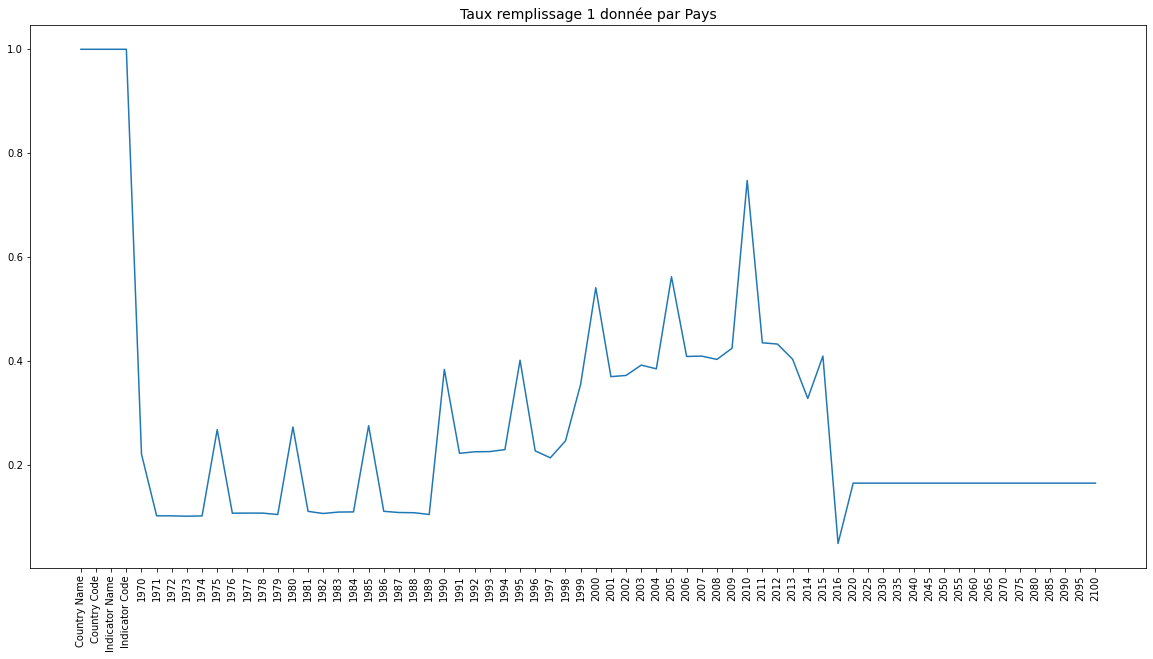

In [19]:
plt.figure(figsize=(20, 10))
plt.title('Taux remplissage 1 donnée par Pays',fontsize=14)
plt.plot(txp ,label='Value count')
plt.xticks(rotation=90)
plt.show()

In [20]:
# Groupby pays
StatsData_pays = StatsData_unique.groupby('Country Name').count().sort_values(by = 'Indicator Name', ascending = False)

# Groupby indicateur
StatsData_indic = StatsData_unique.groupby('Indicator Name').count().sort_values(by = 'Country Name', ascending = False)

## Taux de remplissage par pays 

In [21]:
# Regroupement par pays
StatsData_pays

Country Code  Indicator Name  Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  2085  2090  2095  2100
Country Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Colombia                                2302            2302            2302   584   221   228   224   224   514   125   156   154   158   522   173   246   263   339   700   350   332   330   328   821   451   409   480   399   831   474   280   541   629  1086   631   660   260   856  1513   972   927   878  1039  1901  1003  1017  1004   909   873    72   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308
Ghana                                   2176            2176            2176   428   322   270   171   326   683   253   229   236   234   592   237   164   121   128   486    88   143   152   163   677   463   459   395   297   664   259   259   359   645  1093   775   683   823   662  1076   738   816   984   906  1049   838   800   884   875  1139   165   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308
Indonesia                               2093            2093            2093   496   190   233   177   213   570   221   190   200    79   466   174   197   202   224   549   181   163   209   195   763   430   382   404   445   939   478   521   303   484   811   652   805   984   727   990   790   959   991   918  1413   871   878   793   783   816   100   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308
Niger                                   2044            2044            2044   416   315   313   366   382   703   348   355   349   336   624   351   227   197   215   571   241   199   122   366   932   554   594   427   265   733   456   572   571   655   993   765   722   762   745  1093  1085   808   800   838  1611   887  1215   872   766   664    72   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308
Uganda                                  2033            2033            2033   477   110   107    80   121   544   205   164   127   194   470   170   260   108   106   492   270   111   127   112   697   358   338   297   325   844   308   318   280   427  1184   637   667   581   763   829   869   604   678   636  1439   802   441   524   273   603    73   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308
Namibia                                 2028            2028            2028   413    53    53    53    53   413    53    53    53    53   418    58    59    59    59   419    84    84    84   134   702   401   617   336   482   803   388   401   634   723  1207   749   683   754   623  1126   803   738   689   535  1198   293   583   755   212   651    73   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308   308
Mali                                    2022            2022            2022   416   243   188   186   188   484   232   162   212   235   560   275   209   209   287   630   177   305   278   124   685   327   318   318   296   794   335   344   399   586   871   648   522   566   567   933   889   571   787   843  1547   958   635   801   6

In [22]:
len(StatsData_pays)

217

In [23]:
StatsData_pourcentage = StatsData_pays["Indicator Code"]/len(StatsData_indic)*100
StatsData_pourcentage

Country Name
Colombia                          82.420337
Ghana                             77.909058
Indonesia                         74.937343
Niger                             73.182957
Uganda                            72.789116
Namibia                           72.610097
Mali                              72.395274
Dominican Republic                72.252059
Malawi                            72.108844
Kenya                             71.464375
Bangladesh                        71.356964
Lesotho                           71.356964
Mozambique                        71.106337
Cambodia                          70.927318
Cameroon                          70.891515
Guyana                            70.784103
Armenia                           70.426065
Benin                             70.318654
Kazakhstan                        69.924812
Hungary                           69.674185
Latvia                            69.602578
Egypt, Arab Rep.                  69.530970
Lithuania          

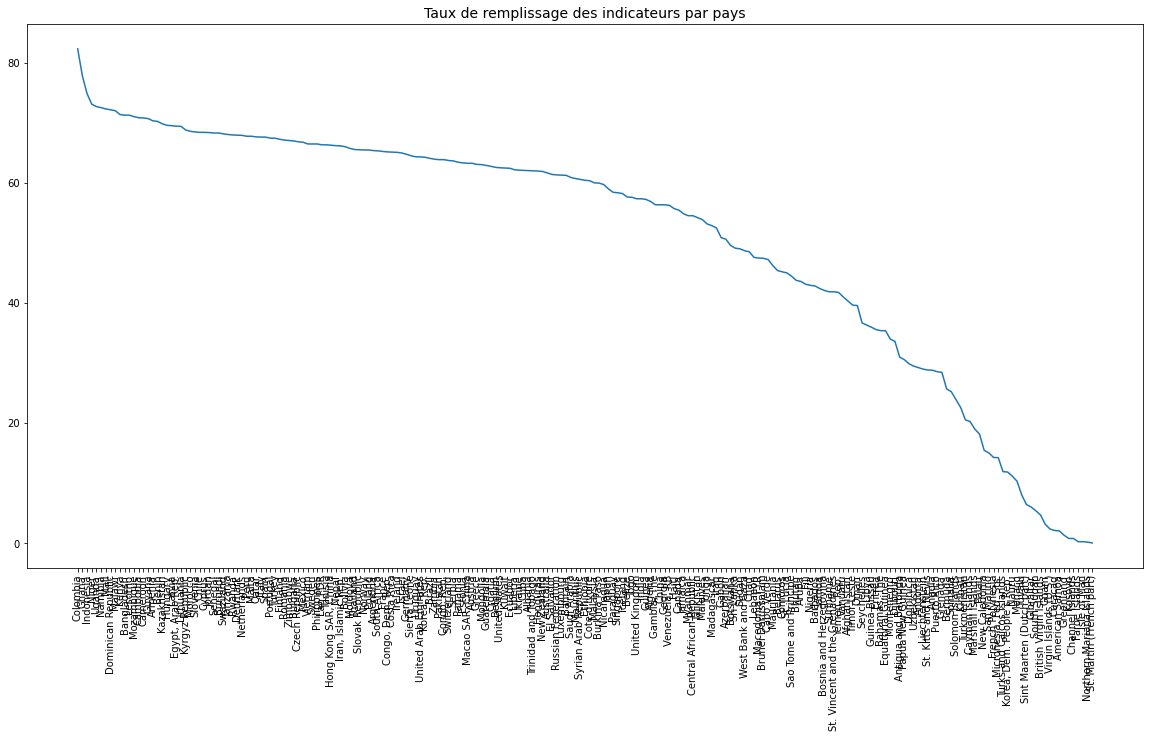

In [24]:
plt.figure(figsize=(20, 10))
plt.title('Taux de remplissage des indicateurs par pays',fontsize=14)
plt.plot(StatsData_pourcentage ,label='Value count')
plt.xticks(rotation=90)
plt.show()

In [25]:
taux_remplissage_pays = StatsData_pays.copy()
taux_remplissage_pays = taux_remplissage_pays.reset_index()

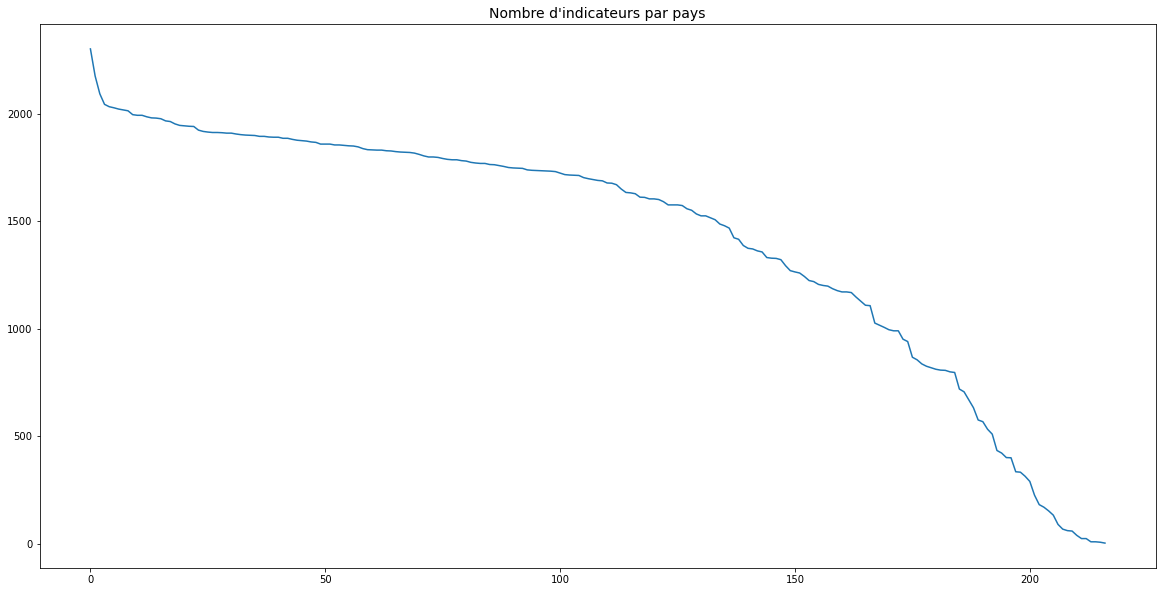

In [26]:
x = taux_remplissage_pays["Indicator Code"]
plt.figure(figsize=(20, 10))
plt.title('Nombre d\'indicateurs par pays',fontsize=14)
plt.plot(x ,label='Value count')
plt.show()

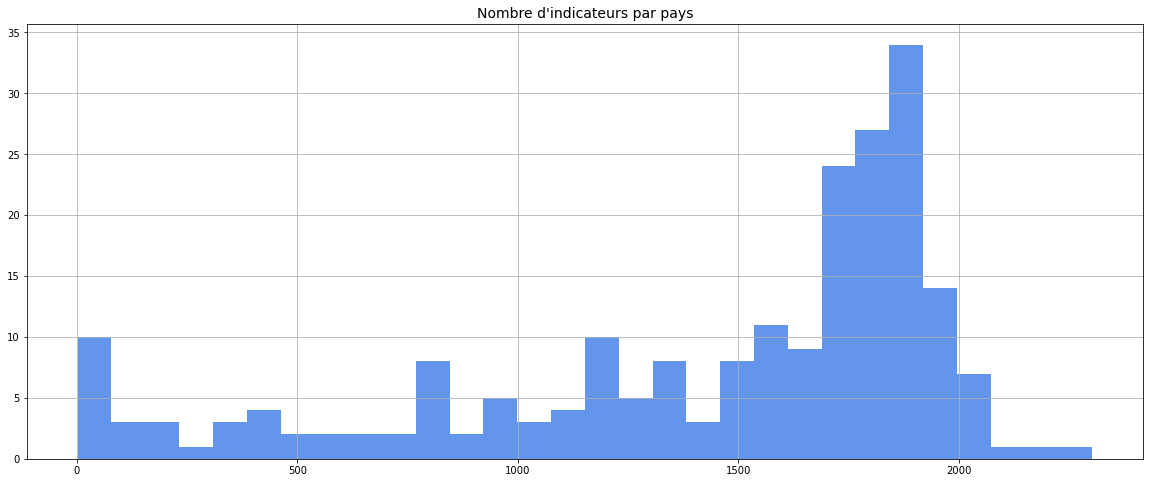

In [27]:
plt.figure(figsize=(20, 8))
plt.title('Nombre d\'indicateurs par pays',fontsize=14) 
taux_remplissage_pays["Indicator Code"].hist(bins = 30, color = "cornflowerblue") 
plt.show()

## Taux de remplissage par indicateur 

In [28]:
# Regroupement par indicateur 
StatsData_indic

Country Name  Country Code  Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  2085  2090  2095  2100
Indicator Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
Population, total                                            215           215             215   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   213   213   212   212   212   213   213   213   215   215   215   215   215   215   215   215   215   215   215   215   215   215   214   214   210   210   210     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
Population growth (annual %)                                 215           215             215   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   211   212   212   212   212   212   212   213   213   213   215   215   215   215   215   215   215   215   215   215   215   215   214   214   214   210   210   210     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
Official entrance age to primary education (years)           210           210             210   201   201   201   201   201   201   201   201   201   201   201   204   206   206   206   206   206   206   206   206   206   206   206   206   206   206   206   205   205   208   208   208   208   208   208   208   208   208   208   208   208   208   208   208   208   208   178     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
Theoretical duration of pre-primary education (...           210           210             210   200   201   201   201   201   201   201   201   201   201   201   204   206   206   206   206   206   206   206   206   206   206   206   206   206   206   206   206   205   208   205   205   205   205   205   205   205   205   205   205   205   205   205   205   205   205   175     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
Theoretical duration of primary education (years)            210           210             210   201   201   201   201   201   201   201   201   201   201   201   204   206   206   206   206   206   206   206   206   206   206   206   206   206   206   206   205   205   208   208   208   208   208   208   208   208   208   208   208   208   208   208   208   208   208   178     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0
...                                                          ...           ...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
Africa Dataset: Ratio of teacher training gradu...             1             1               1     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0     0

In [29]:
StatsData_indic_pc = StatsData_indic["Indicator Code"]/len(StatsData_pays)*100

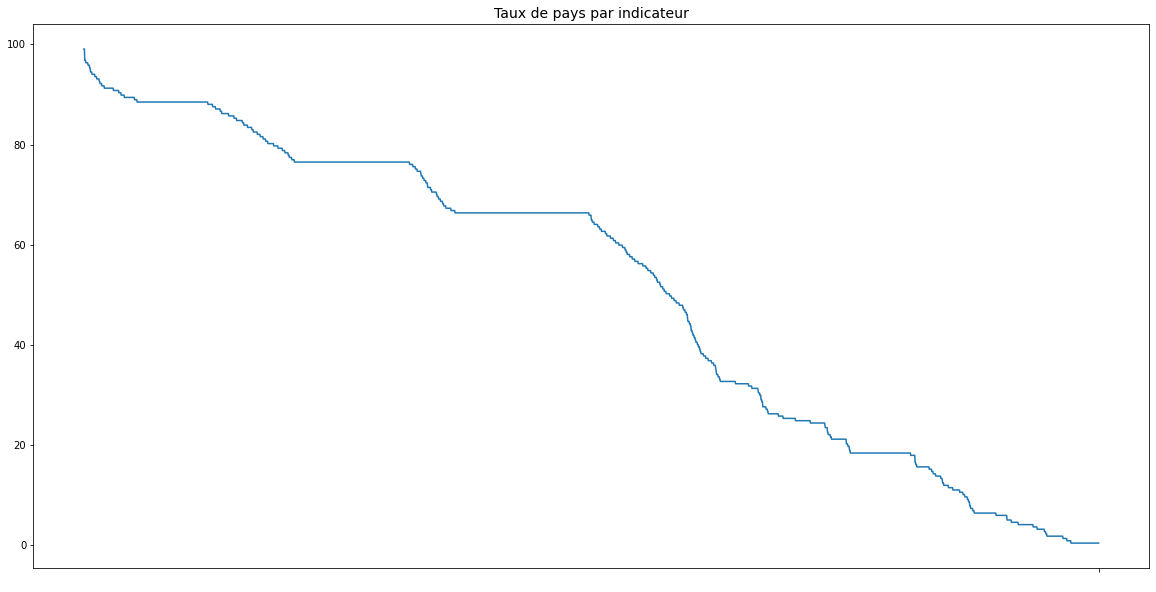

In [30]:
plt.figure(figsize=(20, 10))
plt.title('Taux de pays par indicateur',fontsize=14)
plt.plot(StatsData_indic_pc)
plt.xticks(" ")
plt.show()

In [31]:
taux_remplissage = StatsData_indic.copy()
taux_remplissage = taux_remplissage.reset_index()

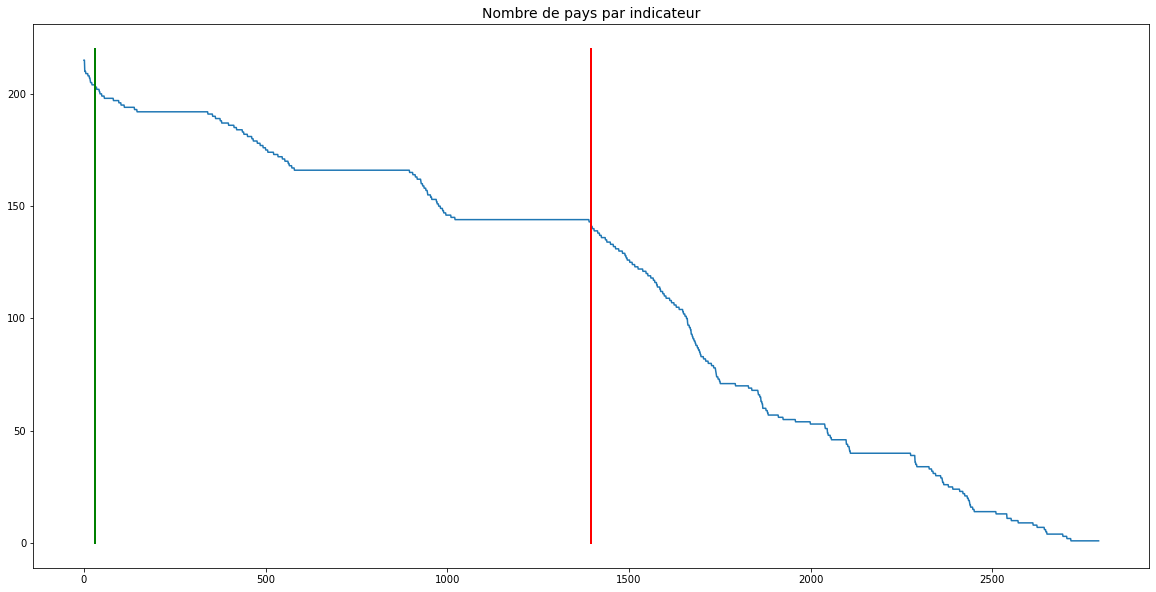

In [32]:
lowerbound = 200

x = taux_remplissage["Indicator Code"]
plt.figure(figsize=(20, 10))
plt.title('Nombre de pays par indicateur',fontsize=14)
plt.plot(x ,label='Value count')
plt.plot([1396, 1396], [0, 220], 'r-', lw=2) # Red straight line
plt.plot([30, 30], [0, 220], 'g-', lw=2) # Green straight line
plt.show()

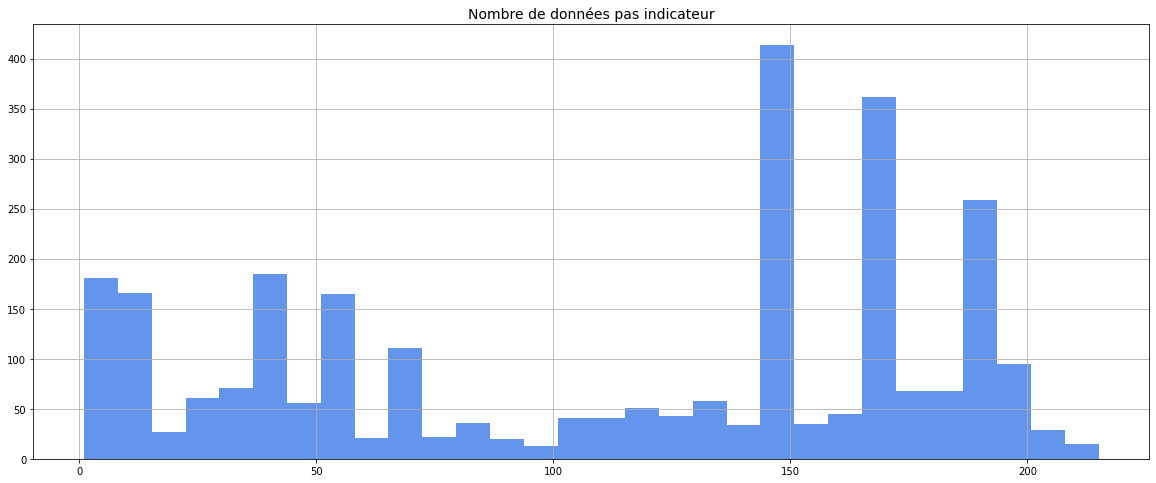

In [33]:
plt.figure(figsize=(20, 8))
plt.title('Nombre de données pas indicateur',fontsize=14) 
taux_remplissage["Indicator Code"].hist(bins = 30, color = 'cornflowerblue') 
plt.show()

In [34]:
taux_remplissage = taux_remplissage[taux_remplissage["Indicator Code"] > lowerbound]
indic_name = taux_remplissage["Indicator Name"].tolist()
StatsData_unique = StatsData_unique.loc[StatsData_unique["Indicator Name"].isin(indic_name)]
StatsData_uniqueStatsData_unique = StatsData_unique.loc[StatsData_unique["Indicator Name"].isin(indic_name)]
StatsData_unique

Country Name Country Code                                     Indicator Name    Indicator Code      1970      1971      1972      1973      1974      1975      1976      1977      1978  1979      1980      1981     1982  1983     1984      1985      1986  1987      1988      1989  1990  1991  1992      1993  1994      1995  1996  1997  1998  1999  2000  2001       2002       2003      2004      2005  2006      2007  2008      2009       2010       2011       2012       2013       2014  \
92758   Afghanistan          AFG  Enrolment in Grade 1 of lower secondary genera...  UIS.E.2.GPV.G1.T   38844.0   40868.0   43644.0   46386.0   49282.0   56555.0   69782.0   70712.0   72997.0   NaN   86774.0   93254.0  44771.0   NaN  52607.0   53109.0   52371.0   NaN   53708.0   56583.0   NaN   NaN   NaN   74962.0   NaN  114002.0   NaN   NaN   NaN   NaN   NaN   NaN        NaN   129419.0  189028.0  208145.0   NaN  348498.0   NaN  563596.0   594126.0   594073.0   622065.0   630990.0   652756.0   
92759   Afghanistan          AFG  Enrolment in Grade 1 of lower secondary genera...  UIS.E.2.GPV.G1.F    4861.0    5234.0    5509.0    6005.0    6340.0    7479.0    9765.0   10629.0   11041.0   NaN   14298.0   18944.0  12491.0   NaN  15254.0   14610.0   16312.0   NaN   16276.0   17174.0   NaN   NaN   NaN   19338.0   NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN        NaN    34973.0   85377.0   51021.0   NaN   97337.0   NaN  186196.0   200668.0   212734.0   223414.0   228057.0   238935.0   
92760   Afghanistan          AFG  Enrolment in Grade 1 of primary education, bot...        UIS.E.1.G1  132066.0  143743.0  154080.0  157621.0  168449.0  168884.0  174099.0  187835.0  199875.0   NaN  236940.0  244852.0  70835.0   NaN  98763.0  108733.0  128146.0   NaN  147970.0  140159.0   NaN   NaN   NaN  141442.0   NaN  292759.0   NaN   NaN   NaN   NaN   NaN   NaN  1330567.0  1410344.0       NaN  903979.0   NaN  811282.0   NaN  948131.0  1032665.0  1087009.0  1159081.0  1179675.0  1159427.0   
92761   Afghanistan          AFG  Enrolment in Grade 1 of primary education, fem...      UIS.E.1.G1.F   20537.0   21531.0   21982.0   24519.0   25305.0   26534.0   28089.0   31333.0   34002.0   NaN   44283.0   45076.0  24724.0   NaN  31596.0   35868.0   46918.0   NaN   47408.0   46351.0   NaN   NaN   NaN   34692.0   NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   493276.0   533226.0       NaN  347659.0   NaN  317356.0   NaN  380900.0   420933.0   451467.0   490276.0   477487.0   465590.0   
92762   Afghanistan          AFG  Enrolment in Grade 2 of lower secondary genera...  UIS.E.2.GPV.G2.T   24341.0   29543.0   32260.0   33528.0   34503.0   35671.0   41597.0   54247.0   59133.0   NaN   69636.0   80291.0  39719.0   NaN  46001.0   48240.0   45926.0   NaN   44684.0   47569.0   NaN   NaN   NaN   72549.0   NaN  110129.0   NaN   NaN   NaN   NaN   NaN   NaN        NaN    96125.0       NaN  140188.0   NaN  238261.0   NaN  446892.0   481245.0   467651.0   496339.0   511015.0   534503.0   
...             ...          ...                                                ...               ...       ...       ...       ...       ...       ...       ...       ...       ...       ...   ...       ...       ...      ...   ...      ...       ...       ...   ...       ...       ...   ...   ...   ...       ...   ...       ...   ...   ...   ...   ...   ...   ...        ...        ...       ...       ...   ...       ...   ...       ...        ...        ...        ...        ...        ...   
886247     Zimbabwe          ZWE  Theoretical duration of lower secondary educat...    SE.SEC.DURS.LO       2.0       2.0       2.0       2.0       2.0       2.0       2.0       2.0       2.0   2.0       2.0       2.0      2.0   2.0      2.0       2.0       2.0   2.0       2.0       2.0   2.0   2.0   2.0       2.0   2.0       2.0   2.0   2.0   2.0   2.0   2.0   2.0        2.0        2.0       2.0       2.0   2.0       2.0   2.0       2.0        2.0        2.0        2.0        2.0        2.0   
886249 

In [35]:
len(indic_name)

44

## Taux de remplissage par date

In [36]:
taux_remplissage_test = StatsData_unique.copy()
taux_remplissage_test = taux_remplissage_test.count()/len(taux_remplissage_test)
taux_remplissage_test

Country Name      1.000000
Country Code      1.000000
Indicator Name    1.000000
Indicator Code    1.000000
1970              0.382031
1971              0.647033
1972              0.651785
1973              0.649133
1974              0.651232
1975              0.640623
1976              0.670019
1977              0.662725
1978              0.668030
1979              0.651122
1980              0.643054
1981              0.676760
1982              0.660073
1983              0.667035
1984              0.671124
1985              0.660404
1986              0.675765
1987              0.649243
1988              0.648801
1989              0.639850
1990              0.668472
1991              0.677423
1992              0.675323
1993              0.676207
1994              0.687369
1995              0.668361
1996              0.645707
1997              0.602276
1998              0.520721
1999              0.791911
2000              0.798983
2001              0.810255
2002              0.815118
2

Text(0.5, 1.0, 'Taux de remplissage par date')

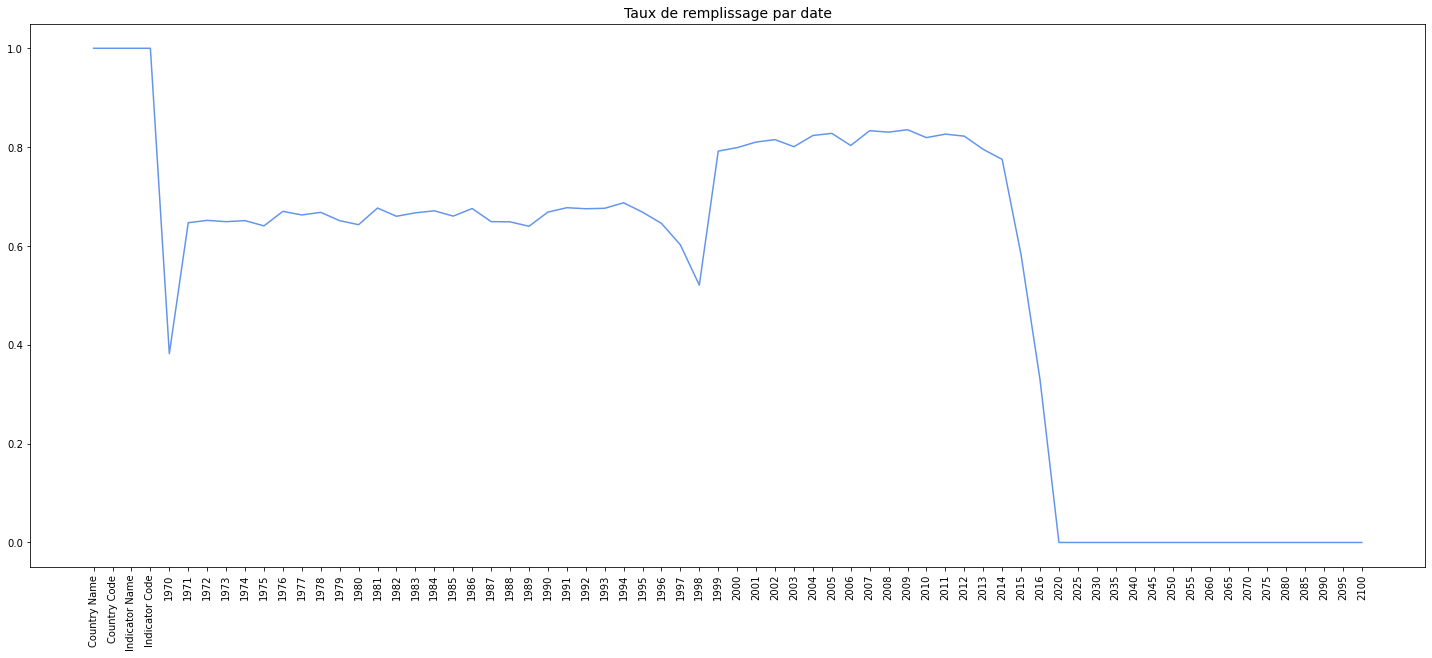

In [37]:
plt.figure(figsize=(25, 10))
plt.plot(taux_remplissage_test ,color = 'cornflowerblue')
plt.xticks(rotation=90)
plt.title('Taux de remplissage par date',fontsize=14)

In [38]:
taux_remplissage_date = StatsData_unique.copy()
taux_remplissage_date = (taux_remplissage_date.count()/len(StatsData_unique))*100
date_data = StatsData_unique.copy()
date_data = date_data.append(taux_remplissage_date, ignore_index=True)
date_data.loc[[9049],'Indicator Code'] = 'Total'
date_data

Country Name Country Code                                     Indicator Name    Indicator Code           1970           1971           1972          1973           1974           1975           1976           1977           1978       1979           1980           1981          1982       1983          1984           1985           1986       1987           1988           1989       1990       1991       1992           1993       1994           1995       1996       1997       1998  \
0     Afghanistan          AFG  Enrolment in Grade 1 of lower secondary genera...  UIS.E.2.GPV.G1.T   38844.000000   40868.000000   43644.000000   46386.00000   49282.000000   56555.000000   69782.000000   70712.000000   72997.000000        NaN   86774.000000   93254.000000  44771.000000        NaN  52607.000000   53109.000000   52371.000000        NaN   53708.000000   56583.000000        NaN        NaN        NaN   74962.000000        NaN  114002.000000        NaN        NaN        NaN   
1     Afghanistan          AFG  Enrolment in Grade 1 of lower secondary genera...  UIS.E.2.GPV.G1.F    4861.000000    5234.000000    5509.000000    6005.00000    6340.000000    7479.000000    9765.000000   10629.000000   11041.000000        NaN   14298.000000   18944.000000  12491.000000        NaN  15254.000000   14610.000000   16312.000000        NaN   16276.000000   17174.000000        NaN        NaN        NaN   19338.000000        NaN            NaN        NaN        NaN        NaN   
2     Afghanistan          AFG  Enrolment in Grade 1 of primary education, bot...        UIS.E.1.G1  132066.000000  143743.000000  154080.000000  157621.00000  168449.000000  168884.000000  174099.000000  187835.000000  199875.000000        NaN  236940.000000  244852.000000  70835.000000        NaN  98763.000000  108733.000000  128146.000000        NaN  147970.000000  140159.000000        NaN        NaN        NaN  141442.000000        NaN  292759.000000        NaN        NaN        NaN   
3     Afghanistan          AFG  Enrolment in Grade 1 of primary education, fem...      UIS.E.1.G1.F   20537.000000   21531.000000   21982.000000   24519.00000   25305.000000   26534.000000   28089.000000   31333.000000   34002.000000        NaN   44283.000000   45076.000000  24724.000000        NaN  31596.000000   35868.000000   46918.000000        NaN   47408.000000   46351.000000        NaN        NaN        NaN   34692.000000        NaN            NaN        NaN        NaN        NaN   
4     Afghanistan          AFG  Enrolment in Grade 2 of lower secondary genera...  UIS.E.2.GPV.G2.T   24341.000000   29543.000000   32260.000000   33528.00000   34503.000000   35671.000000   41597.000000   54247.000000   59133.000000        NaN   69636.000000   80291.000000  39719.000000        NaN  46001.000000   48240.000000   45926.000000        NaN   44684.000000   47569.000000        NaN        NaN        NaN   72549.000000        NaN  110129.000000        NaN        NaN        NaN   
...           ...          ...                                                ...               ...            ...            ...            ...           ...            ...            ...            ...            ...            ...        ...            ...            ...           ...        ...           ...            ...            ...        ...            ...            ...        ...        ...        ...            ...        ...            ...        ...        ...        ...   
9045     Zimbabwe          ZWE  Theoretical duration of pre-primary education ...       UIS.THDUR.0       2.000000       2.000000       2.000000       2.00000       2.000000       2.000000       2.000000       2.000000       2.000000   2.000000       2.000000       2.000000      2.000000   2.000000      2.000000       2.000000       2.000000   3.000000       3.000000       3.000000   3.000000   3.000000   3.000000       3.000000   3.000000       3.000000   3.000000   1.000000   2.000000   
9046     Zimbabwe          ZWE  Theoretical d

In [39]:
date_graph = date_data.copy()
date_graph = date_graph.loc [[9049],'1970':'2100']
date_graph = date_graph.transpose()
date_graph

9049
1970  38.203116
1971  64.703282
1972  65.178473
1973  64.913250
1974  65.123218
1975  64.062327
1976  67.001879
1977  66.272516
1978  66.802962
1979  65.112167
1980  64.305448
1981  67.675986
1982  66.007294
1983  66.703503
1984  67.112388
1985  66.040446
1986  67.576528
1987  64.924301
1988  64.880097
1989  63.984971
1990  66.847165
1991  67.742292
1992  67.532324
1993  67.620732
1994  68.736877
1995  66.836114
1996  64.570671
1997  60.227649
1998  52.072052
1999  79.191071
2000  79.898331
2001  81.025528
2002  81.511769
2003  80.086197
2004  82.351641
2005  82.782628
2006  80.329318
2007  83.324124
2008  83.025749
2009  83.523041
2010  81.920654
2011  82.627915
2012  82.219030
2013  79.544701
2014  77.522378
2015  58.194276
2016  32.964969
2020   0.000000
2025   0.000000
2030   0.000000
2035   0.000000
2040   0.000000
2045   0.000000
2050   0.000000
2055   0.000000
2060   0.000000
2065   0.000000
2070   0.000000
2075   0.000000
2080   0.000000
2085   0.000000
2090   0.000000
2095   0.000000
2100   0.000000

Text(0.5, 1.0, 'Taux de remplissage par date')

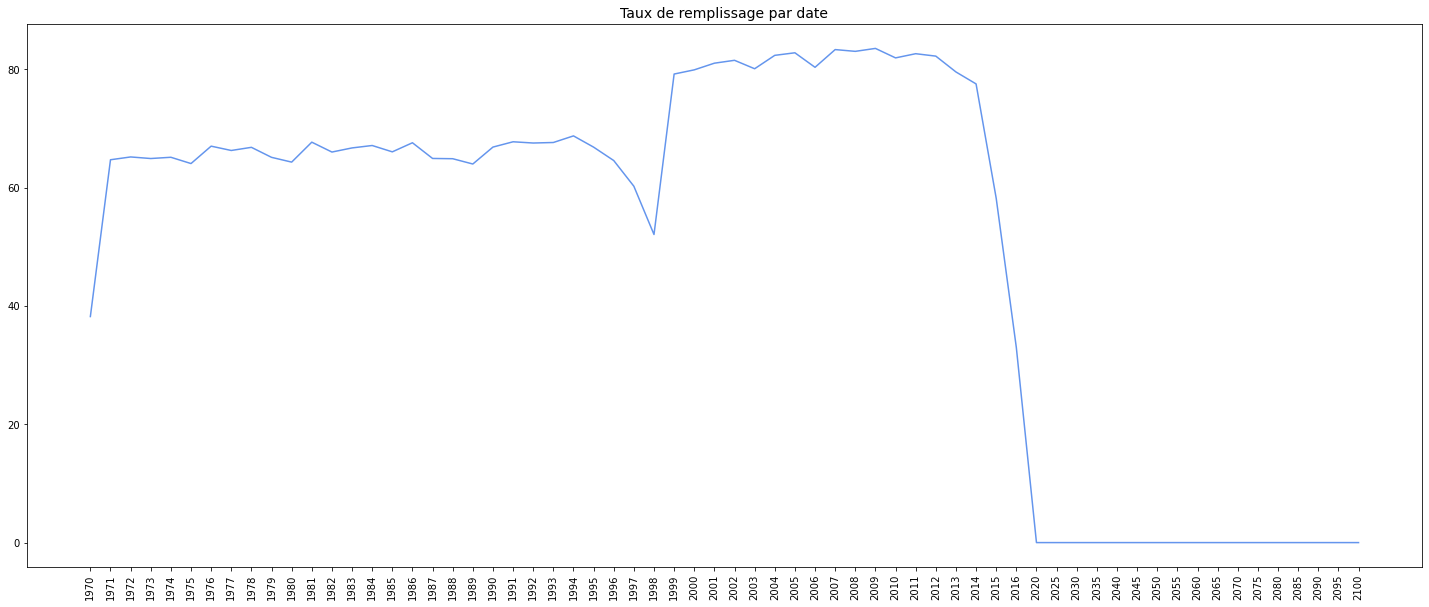

In [40]:
x = date_graph.index
plt.figure(figsize=(25, 10))
plt.plot(x , date_graph[9049], color = 'cornflowerblue')
plt.xticks(rotation=90)
plt.title('Taux de remplissage par date',fontsize=14)

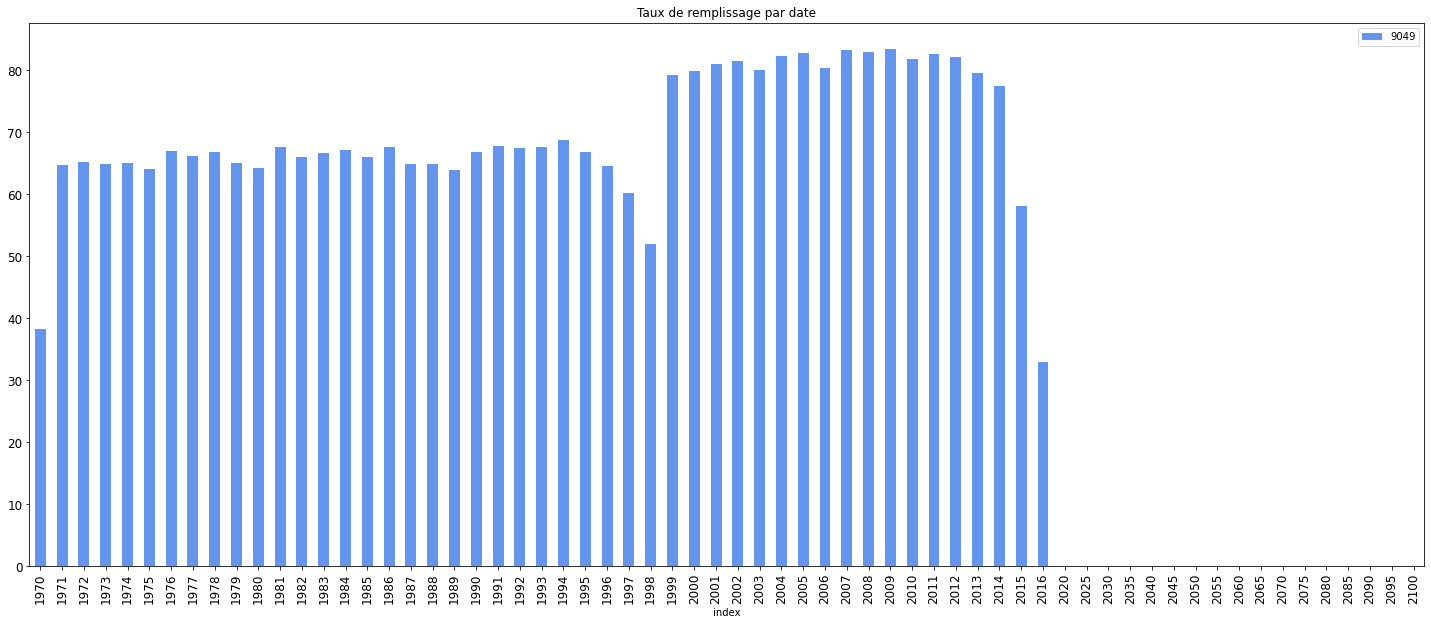

In [41]:
date_graph = date_graph.reset_index()
date_graph.plot(x = 'index', y=[9049],figsize=(25, 10),kind = 'bar', color='cornflowerblue', title = 'Taux de remplissage par date', fontsize=12)
plt.show()

2000 - 2015

# Réduction du Dataframe

In [42]:
StatsData_unique['Indicator Name'].unique().tolist()

['Enrolment in Grade 1 of lower secondary general education, both sexes (number)',
 'Enrolment in Grade 1 of lower secondary general education, female (number)',
 'Enrolment in Grade 1 of primary education, both sexes (number)',
 'Enrolment in Grade 1 of primary education, female (number)',
 'Enrolment in Grade 2 of lower secondary general education, both sexes (number)',
 'Enrolment in Grade 2 of lower secondary general education, female (number)',
 'Enrolment in Grade 2 of primary education, both sexes (number)',
 'Enrolment in Grade 2 of primary education, female (number)',
 'Enrolment in Grade 3 of primary education, both sexes (number)',
 'Enrolment in Grade 3 of primary education, female (number)',
 'Enrolment in Grade 4 of primary education, both sexes (number)',
 'Enrolment in Grade 4 of primary education, female (number)',
 'Enrolment in pre-primary education, both sexes (number)',
 'Enrolment in pre-primary education, female (number)',
 'Enrolment in primary education, both s

Quels sont les pays avec un fort potentiel de clients pour nos services ?  

2 'Enrolment in tertiary education, all programmes, both sexes (number)'  
1 'Population, total'  
3 'Internet users (per 100 people)'  

Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?  

1 'Population growth (annual %)'  
5 'GDP per capita (current US$)'    
('GDP at market prices')

Dans quels pays l'entreprise doit-elle opérer en priorité ?   

4 'Enrolment in secondary general, both sexes (number)'  
('Enrolment in secondary vocational, both sexes (number)' )  
('Official entrance age to upper secondary education (years)' )

In [143]:
StatsData_filtre = StatsData_unique.loc[StatsData_unique["Indicator Name"].isin(['Enrolment in tertiary education, all programmes, both sexes (number)',  
                                                                                'Population, total',
                                                                                'Internet users (per 100 people)',
                                                                                'Population growth (annual %)',  
                                                                                'GDP per capita (current US$)',  
                                                                                'Enrolment in secondary general, both sexes (number)'])]
StatsData_filtre

Country Name Country Code                                     Indicator Name  Indicator Code          1970          1971          1972          1973          1974          1975          1976          1977          1978          1979          1980          1981          1982          1983          1984          1985          1986          1987          1988          1989          1990          1991          1992          1993          1994          1995          1996          1997  \
92822   Afghanistan          AFG  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC  1.076090e+05  1.271620e+05  1.469880e+05  1.594640e+05  1.673970e+05  1.797630e+05  1.969910e+05  2.111870e+05  2.245310e+05           NaN  2.808980e+05  3.184030e+05  1.784230e+05           NaN  1.983370e+05  2.063810e+05  1.877450e+05           NaN  2.053920e+05  2.025720e+05  1.823400e+05  2.819280e+05           NaN  3.321700e+05  4.977620e+05  5.128510e+05           NaN           NaN   
92829   Afghanistan          AFG  Enrolment in tertiary education, all programme...     SE.TER.ENRL  7.732000e+03  9.409000e+03  9.817000e+03  1.148700e+04  1.095600e+04  1.225600e+04  1.421400e+04  1.614700e+04  2.111800e+04  2.297400e+04           NaN           NaN  1.965200e+04           NaN           NaN           NaN  2.230600e+04  1.750900e+04           NaN           NaN  2.433300e+04           NaN           NaN           NaN           NaN           NaN           NaN           NaN   
92870   Afghanistan          AFG                       GDP per capita (current US$)  NY.GDP.PCAP.CD  1.571874e+02  1.603728e+02  1.361170e+02  1.441103e+02  1.749420e+02  1.879756e+02  1.990262e+02  2.260053e+02  2.492874e+02  2.779007e+02  2.748809e+02  2.664930e+02           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN   
93000   Afghanistan          AFG                    Internet users (per 100 people)  IT.NET.USER.P2           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  0.000000e+00           NaN           NaN           NaN           NaN           NaN           NaN           NaN   
93932   Afghanistan          AFG                       Population growth (annual %)     SP.POP.GROW  2.472266e+00  2.587996e+00  2.628657e+00  2.576017e+00  2.412657e+00  2.157653e+00  1.966302e+00  1.754255e+00  1.294025e+00  5.195904e-01 -4.392766e-01 -1.478345e+00 -2.358765e+00 -2.867273e+00 -2.800548e+00 -2.216315e+00 -1.556722e+00 -8.507742e-01  3.309114e-01  2.030398e+00  3.925342e+00  5.900771e+00  7.325447e+00  7.665433e+00  6.895569e+00  5.572581e+00  4.143163e+00  3.086719e+00   
...             ...          ...                                                ...             ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...   
884469     Zimbabwe          ZWE  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN  6.878000e+03  7.210000e+03  7.850000e+03  7.819000e+03  8.479000e+03  8.994000e+03  8.618000e+03  8.607000e+03  8.397000e+03  8.339000e+03  1.222600e+04  1.492600e+04  1.010100e+04  1.186500e+04  1.424600e+04  1.791500e+04           NaN           NaN  5.504700e+04  4.936100e+04  5.205100e+04  6.155300e+04           NaN           NaN           NaN           NaN           NaN   
884510     Zimbabwe          ZWE               

In [144]:
len_pays_def = StatsData_filtre['Country Name'].unique().tolist()
len(len_pays_def)

217

In [44]:
taux_remp_new = StatsData_filtre.copy()
taux_remp_new = (taux_remp_new.count()/len(StatsData_filtre))*100
date_remp = StatsData_filtre.copy()
date_remp = date_remp.append(taux_remp_new, ignore_index=True)
date_remp.loc[[1254],'Indicator Code'] = 'Total'
date_remp

Country Name Country Code                                     Indicator Name  Indicator Code          1970          1971          1972          1973          1974          1975          1976          1977          1978          1979          1980          1981          1982          1983          1984          1985          1986          1987          1988          1989          1990          1991          1992          1993          1994          1995          1996          1997  \
0     Afghanistan          AFG  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC  1.076090e+05  1.271620e+05  1.469880e+05  1.594640e+05  1.673970e+05  1.797630e+05  1.969910e+05  2.111870e+05  2.245310e+05           NaN  2.808980e+05  3.184030e+05  1.784230e+05           NaN  1.983370e+05  2.063810e+05  1.877450e+05           NaN  2.053920e+05  2.025720e+05  1.823400e+05  2.819280e+05           NaN  3.321700e+05  4.977620e+05  5.128510e+05           NaN           NaN   
1     Afghanistan          AFG  Enrolment in tertiary education, all programme...     SE.TER.ENRL  7.732000e+03  9.409000e+03  9.817000e+03  1.148700e+04  1.095600e+04  1.225600e+04  1.421400e+04  1.614700e+04  2.111800e+04  2.297400e+04           NaN           NaN  1.965200e+04           NaN           NaN           NaN  2.230600e+04  1.750900e+04           NaN           NaN  2.433300e+04           NaN           NaN           NaN           NaN           NaN           NaN           NaN   
2     Afghanistan          AFG                       GDP per capita (current US$)  NY.GDP.PCAP.CD  1.571874e+02  1.603728e+02  1.361170e+02  1.441103e+02  1.749420e+02  1.879756e+02  1.990262e+02  2.260053e+02  2.492874e+02  2.779007e+02  2.748809e+02  2.664930e+02           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN   
3     Afghanistan          AFG                    Internet users (per 100 people)  IT.NET.USER.P2           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  0.000000e+00           NaN           NaN           NaN           NaN           NaN           NaN           NaN   
4     Afghanistan          AFG                       Population growth (annual %)     SP.POP.GROW  2.472266e+00  2.587996e+00  2.628657e+00  2.576017e+00  2.412657e+00  2.157653e+00  1.966302e+00  1.754255e+00  1.294025e+00  5.195904e-01 -4.392766e-01 -1.478345e+00 -2.358765e+00 -2.867273e+00 -2.800548e+00 -2.216315e+00 -1.556722e+00 -8.507742e-01  3.309114e-01  2.030398e+00  3.925342e+00  5.900771e+00  7.325447e+00  7.665433e+00  6.895569e+00  5.572581e+00  4.143163e+00  3.086719e+00   
...           ...          ...                                                ...             ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...   
1250     Zimbabwe          ZWE                       GDP per capita (current US$)  NY.GDP.PCAP.CD  3.640544e+02  4.071457e+02  4.837049e+02  5.778467e+02  6.725553e+02  7.148056e+02  6.845540e+02  6.712479e+02  6.491843e+02  7.479943e+02  9.322596e+02  1.077965e+03  1.105959e+03  9.671758e+02  7.614454e+02  6.510397e+02  6.926673e+02  7.253858e+02  8.136754e+02  8.367876e+02  8.625866e+02  8.274869e+02  6.319906e+02  6.018669e+02  6.198351e+02  6.281849e+02  7.425727e+02  7.284008e+02   
1251     Zimbabwe          ZWE                    Internet us

In [45]:
date_graph_new = date_remp.copy()
date_graph_new = date_graph_new.loc [[1254],'1970':'2100']
date_graph_new = date_graph_new.transpose()
date_graph_new

1254
1970  50.956938
1971  65.789474
1972  65.390750
1973  65.311005
1974  64.752791
1975  64.992026
1976  66.188198
1977  66.267943
1978  66.028708
1979  66.427432
1980  67.464115
1981  69.936204
1982  67.623604
1983  67.623604
1984  68.181818
1985  67.783094
1986  69.377990
1987  67.464115
1988  67.384370
1989  68.181818
1990  85.645933
1991  73.365231
1992  73.604466
1993  73.923445
1994  75.518341
1995  79.744817
1996  81.020734
1997  78.708134
1998  79.984051
1999  88.277512
2000  88.516746
2001  88.755981
2002  90.111643
2003  89.234450
2004  90.111643
2005  89.952153
2006  89.234450
2007  90.350877
2008  90.510367
2009  90.669856
2010  90.271132
2011  90.988836
2012  90.350877
2013  88.835726
2014  87.480064
2015  85.087719
2016  66.108453
2020   0.000000
2025   0.000000
2030   0.000000
2035   0.000000
2040   0.000000
2045   0.000000
2050   0.000000
2055   0.000000
2060   0.000000
2065   0.000000
2070   0.000000
2075   0.000000
2080   0.000000
2085   0.000000
2090   0.000000
2095   0.000000
2100   0.000000

Text(0.5, 1.0, 'Taux de remplissage par date')

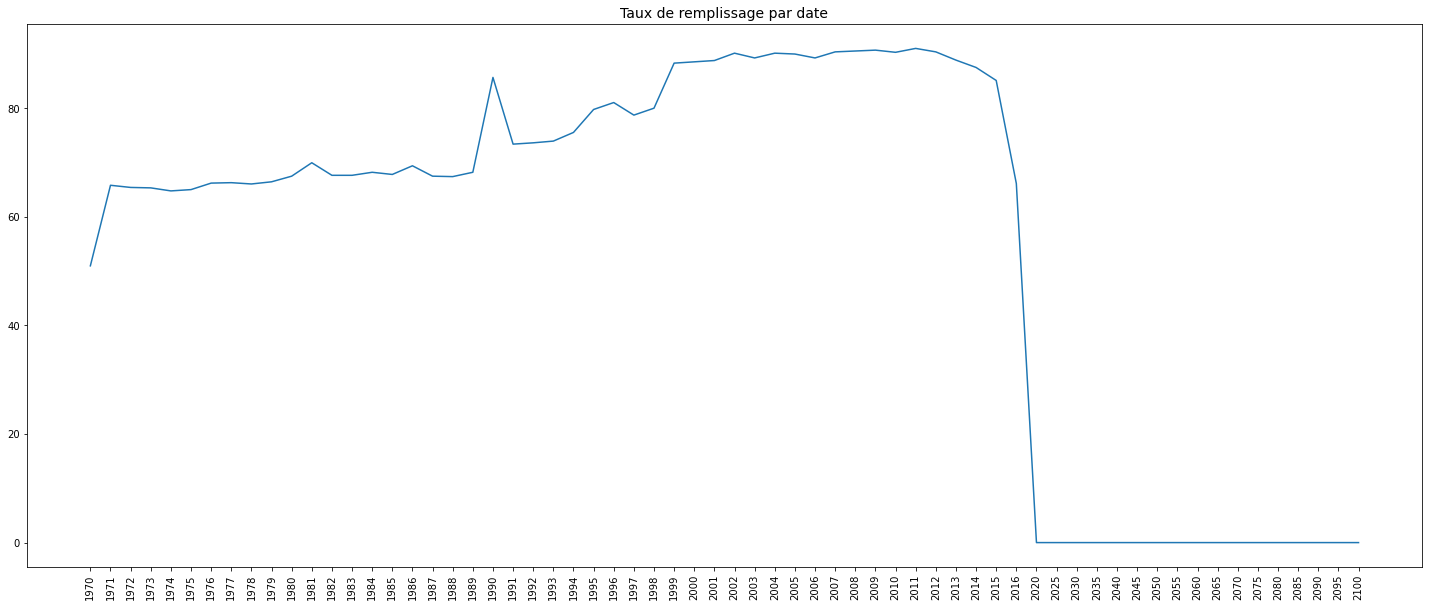

In [46]:
x2 = date_graph_new.index
plt.figure(figsize=(25, 10))
plt.plot(x2 , date_graph_new[1254])
plt.xticks(rotation=90)
plt.title('Taux de remplissage par date',fontsize=14)

In [47]:
clean_date = StatsData_filtre.copy()
clean_date.drop(clean_date.loc[:,'1970':'1999'],inplace = True, axis = 1)
clean_date.drop(clean_date.loc[:,'2020':'2100'],inplace = True, axis = 1)
clean_date

Country Name Country Code                                     Indicator Name  Indicator Code          2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2011          2012          2013          2014          2015          2016
92822   Afghanistan          AFG  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC           NaN  3.624150e+05  3.952230e+05  4.050020e+05  5.915410e+05  6.424420e+05           NaN  1.028382e+06  1.415293e+06  1.693479e+06  2.032719e+06  2.190878e+06  2.392465e+06  2.508900e+06  2.577715e+06  2.671830e+06           NaN
92829   Afghanistan          AFG  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN  2.621100e+04  2.764800e+04           NaN           NaN           NaN           NaN  9.518500e+04           NaN  9.750400e+04           NaN           NaN  2.628740e+05           NaN           NaN
92870   Afghanistan          AFG                       GDP per capita (current US$)  NY.GDP.PCAP.CD           NaN  1.174097e+02  1.878451e+02  1.987285e+02  2.191414e+02  2.502941e+02  2.725631e+02  3.698358e+02  3.733611e+02  4.458933e+02  5.533003e+02  6.035370e+02  6.690091e+02  6.317450e+02  6.120697e+02  5.695779e+02  5.617787e+02
93000   Afghanistan          AFG                    Internet users (per 100 people)  IT.NET.USER.P2           NaN  4.722568e-03  4.561395e-03  8.789125e-02  1.058090e-01  1.224148e+00  2.107124e+00  1.900000e+00  1.840000e+00  3.550000e+00  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00  8.260000e+00  1.059573e+01
93932   Afghanistan          AFG                       Population growth (annual %)     SP.POP.GROW  3.494659e+00  4.251504e+00  4.720528e+00  4.818041e+00  4.468918e+00  3.870470e+00  3.228630e+00  2.755225e+00  2.512574e+00  2.569114e+00  2.812617e+00  3.095119e+00  3.272703e+00  3.315224e+00  3.183201e+00  2.943234e+00  2.689163e+00
...             ...          ...                                                ...             ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...
884469     Zimbabwe          ZWE  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  9.461100e+04  9.328500e+04  9.401200e+04  9.411500e+04           NaN  1.355750e+05           NaN
884510     Zimbabwe          ZWE                       GDP per capita (current US$)  NY.GDP.PCAP.CD  5.473589e+02  5.480587e+02  5.073480e+02  4.533512e+02  4.543607e+02  4.447605e+02  4.147962e+02  3.969982e+02  3.256786e+02  6.242722e+02  7.199795e+02  8.409499e+02  9.681639e+02  1.026388e+03  1.031105e+03  1.033416e+03  1.029077e+03
884640     Zimbabwe          ZWE                    Internet users (per 100 people)  IT.NET.USER.P2  4.014335e-01  7.998460e-01  1.100000e+00  1.800000e+00  2.100000e+00  2.400000e+00  2.400000e+00  3.000000e+00  3.500000e+00  4.000000e+00  6.400000e+00  8.400000e+00  1.200000e+01  1.550000e+01  1.636474e+01  2.274282e+01  2.311999e+01
885572     Zimbabwe          ZWE                       Population growth (annual %)     SP.POP.GROW  1.298782e+00  1.170597e+00  1.080653e+00  1.061280e+00  1.130323e+00  1.263909e+00  1.413720e+00  1.554735e+00  1.700106e+00  1.842497e+00  1.976756e+00  2.109672e+00  2.228306e+00  2.309366e+00  2.344799e+00  2.345643e+00  2.336070e+00
885798     Zimbabwe          ZWE                                  Population, total     SP.POP.TOTL  1.222225e+07  1.236616e+07  1.250052e+07  1.263390e+07  1.277751e+07  1.294003e+07  1.312427e+07  1.332991e+07  1.355847e+07  1.381060e+07  1.408632e+07  1.438665e+07  1.471083e+07  1.5054

In [48]:
clean_date_ok = clean_date.copy()

lb = '2000'
ub = '2016'
clean_date_ok['Moyenne'] = clean_date_ok.loc[:,lb:ub].mean(axis = 1)
clean_date_ok

Country Name Country Code                                     Indicator Name  Indicator Code          2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2011          2012          2013          2014          2015          2016       Moyenne
92822   Afghanistan          AFG  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC           NaN  3.624150e+05  3.952230e+05  4.050020e+05  5.915410e+05  6.424420e+05           NaN  1.028382e+06  1.415293e+06  1.693479e+06  2.032719e+06  2.190878e+06  2.392465e+06  2.508900e+06  2.577715e+06  2.671830e+06           NaN  1.493449e+06
92829   Afghanistan          AFG  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN  2.621100e+04  2.764800e+04           NaN           NaN           NaN           NaN  9.518500e+04           NaN  9.750400e+04           NaN           NaN  2.628740e+05           NaN           NaN  1.018844e+05
92870   Afghanistan          AFG                       GDP per capita (current US$)  NY.GDP.PCAP.CD           NaN  1.174097e+02  1.878451e+02  1.987285e+02  2.191414e+02  2.502941e+02  2.725631e+02  3.698358e+02  3.733611e+02  4.458933e+02  5.533003e+02  6.035370e+02  6.690091e+02  6.317450e+02  6.120697e+02  5.695779e+02  5.617787e+02  4.147556e+02
93000   Afghanistan          AFG                    Internet users (per 100 people)  IT.NET.USER.P2           NaN  4.722568e-03  4.561395e-03  8.789125e-02  1.058090e-01  1.224148e+00  2.107124e+00  1.900000e+00  1.840000e+00  3.550000e+00  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00  8.260000e+00  1.059573e+01  3.564658e+00
93932   Afghanistan          AFG                       Population growth (annual %)     SP.POP.GROW  3.494659e+00  4.251504e+00  4.720528e+00  4.818041e+00  4.468918e+00  3.870470e+00  3.228630e+00  2.755225e+00  2.512574e+00  2.569114e+00  2.812617e+00  3.095119e+00  3.272703e+00  3.315224e+00  3.183201e+00  2.943234e+00  2.689163e+00  3.411819e+00
...             ...          ...                                                ...             ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...
884469     Zimbabwe          ZWE  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  9.461100e+04  9.328500e+04  9.401200e+04  9.411500e+04           NaN  1.355750e+05           NaN  1.023196e+05
884510     Zimbabwe          ZWE                       GDP per capita (current US$)  NY.GDP.PCAP.CD  5.473589e+02  5.480587e+02  5.073480e+02  4.533512e+02  4.543607e+02  4.447605e+02  4.147962e+02  3.969982e+02  3.256786e+02  6.242722e+02  7.199795e+02  8.409499e+02  9.681639e+02  1.026388e+03  1.031105e+03  1.033416e+03  1.029077e+03  6.685919e+02
884640     Zimbabwe          ZWE                    Internet users (per 100 people)  IT.NET.USER.P2  4.014335e-01  7.998460e-01  1.100000e+00  1.800000e+00  2.100000e+00  2.400000e+00  2.400000e+00  3.000000e+00  3.500000e+00  4.000000e+00  6.400000e+00  8.400000e+00  1.200000e+01  1.550000e+01  1.636474e+01  2.274282e+01  2.311999e+01  7.413460e+00
885572     Zimbabwe          ZWE                       Population growth (annual %)     SP.POP.GROW  1.298782e+00  1.170597e+00  1.080653e+00  1.061280e+00  1.130323e+00  1.263909e+00  1.413720e+00  1.554735e+00  1.700106e+00  1.842497e+00  1.976756e+00  2.109672e+00  2.228306e+00  2.309366e+00  2.344799e+00  2.345643e+00  2.336070e+00  1.715718e+00
885798     Zimbabwe          ZWE                                  Population, total     SP.POP.TOTL  1.222225e+07  1.236616e+07  1.2500

In [49]:
def func(x):
    if x.values[0] is None:
        return None
    else:
        return clean_date.loc[x.name, x.values[0]]
    
last_v = pd.DataFrame(clean_date.apply(lambda x: x.last_valid_index(), axis=1)).apply(func,axis=1)
last_v

92822       2671830.0
92829        262874.0
92870      561.778746
93000       10.595726
93932        2.689163
             ...     
884469       135575.0
884510    1029.076649
884640      23.119989
885572        2.33607
885798     16150362.0
Length: 1254, dtype: object

In [50]:
clean_date_ok['Last value'] = last_v
clean_date_ok['Last value'] = pd.to_numeric(clean_date_ok['Last value'],errors = 'coerce')
clean_date_ok

Country Name Country Code                                     Indicator Name  Indicator Code          2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2011          2012          2013          2014          2015          2016       Moyenne    Last value
92822   Afghanistan          AFG  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC           NaN  3.624150e+05  3.952230e+05  4.050020e+05  5.915410e+05  6.424420e+05           NaN  1.028382e+06  1.415293e+06  1.693479e+06  2.032719e+06  2.190878e+06  2.392465e+06  2.508900e+06  2.577715e+06  2.671830e+06           NaN  1.493449e+06  2.671830e+06
92829   Afghanistan          AFG  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN  2.621100e+04  2.764800e+04           NaN           NaN           NaN           NaN  9.518500e+04           NaN  9.750400e+04           NaN           NaN  2.628740e+05           NaN           NaN  1.018844e+05  2.628740e+05
92870   Afghanistan          AFG                       GDP per capita (current US$)  NY.GDP.PCAP.CD           NaN  1.174097e+02  1.878451e+02  1.987285e+02  2.191414e+02  2.502941e+02  2.725631e+02  3.698358e+02  3.733611e+02  4.458933e+02  5.533003e+02  6.035370e+02  6.690091e+02  6.317450e+02  6.120697e+02  5.695779e+02  5.617787e+02  4.147556e+02  5.617787e+02
93000   Afghanistan          AFG                    Internet users (per 100 people)  IT.NET.USER.P2           NaN  4.722568e-03  4.561395e-03  8.789125e-02  1.058090e-01  1.224148e+00  2.107124e+00  1.900000e+00  1.840000e+00  3.550000e+00  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00  8.260000e+00  1.059573e+01  3.564658e+00  1.059573e+01
93932   Afghanistan          AFG                       Population growth (annual %)     SP.POP.GROW  3.494659e+00  4.251504e+00  4.720528e+00  4.818041e+00  4.468918e+00  3.870470e+00  3.228630e+00  2.755225e+00  2.512574e+00  2.569114e+00  2.812617e+00  3.095119e+00  3.272703e+00  3.315224e+00  3.183201e+00  2.943234e+00  2.689163e+00  3.411819e+00  2.689163e+00
...             ...          ...                                                ...             ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...
884469     Zimbabwe          ZWE  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  9.461100e+04  9.328500e+04  9.401200e+04  9.411500e+04           NaN  1.355750e+05           NaN  1.023196e+05  1.355750e+05
884510     Zimbabwe          ZWE                       GDP per capita (current US$)  NY.GDP.PCAP.CD  5.473589e+02  5.480587e+02  5.073480e+02  4.533512e+02  4.543607e+02  4.447605e+02  4.147962e+02  3.969982e+02  3.256786e+02  6.242722e+02  7.199795e+02  8.409499e+02  9.681639e+02  1.026388e+03  1.031105e+03  1.033416e+03  1.029077e+03  6.685919e+02  1.029077e+03
884640     Zimbabwe          ZWE                    Internet users (per 100 people)  IT.NET.USER.P2  4.014335e-01  7.998460e-01  1.100000e+00  1.800000e+00  2.100000e+00  2.400000e+00  2.400000e+00  3.000000e+00  3.500000e+00  4.000000e+00  6.400000e+00  8.400000e+00  1.200000e+01  1.550000e+01  1.636474e+01  2.274282e+01  2.311999e+01  7.413460e+00  2.311999e+01
885572     Zimbabwe          ZWE                       Population growth (annual %)     SP.POP.GROW  1.298782e+00  1.170597e+00  1.080653e+00  1.061280e+00  1.130323e+00  1.263909e+00  1.413720e+00  1.554735e+00  1.700106e+00  1.842497e+00  1.976756e+00  2.109672e+00  2.228306e+00  2.309366e+00  2.344799e+00  2.345643e+00  2.336070e+00  1.715718

In [51]:
StatsData_pays_ok = clean_date_ok.copy()
StatsData_pays_ok = StatsData_pays_ok.groupby('Country Name').count().sort_values(by = 'Indicator Name', ascending = False)
StatsData_pays_ok

Country Code  Indicator Name  Indicator Code  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  Moyenne  Last value
Country Name                                                                                                                                                                                           
Afghanistan                                6               6               6     2     5     5     6     6     5     4     5     5     6     5     6     5     5     6     5     4        6           6
Nigeria                                    6               6               6     4     4     4     5     5     5     4     4     4     4     5     6     4     5     4     4     4        6           6
Morocco                                    6               6               6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     4        6           6
Mozambique                                 6               6               6     5     5     5     4     6     6     6     6     6     6     6     6     6     6     6     6     4        6           6
Myanmar                                    6               6               6     4     6     5     5     5     5     5     6     5     5     5     5     5     4     5     4     4        6           6
Namibia                                    6               6               6     5     6     6     6     5     6     6     5     6     5     5     4     5     5     4     4     4        6           6
Nepal                                      6               6               6     6     6     6     6     6     6     6     6     6     6     6     6     5     6     6     6     5        6           6
Netherlands                                6               6               6     6     6     6     6     6     6     6     6     6     6     6     6     6     4     4     6     4        6           6
New Caledonia                              6               6               6     4     3     3     3     3     3     3     3     3     3     3     3     3     3     3     3     2        4           4
New Zealand                                6               6               6     5     5     6     5     5     5     5     5     5     6     6     6     6     6     6     6     4        6           6
Nicaragua                                  6               6               6     5     5     6     4     5     5     5     5     5     4     5     4     4     4     4     4     4        6           6
Niger                                      6               6               6     5     5     5     6     6     6     6     6     6     6     6     6     6     5     5     5     4        6           6
Norway                                     6               6               6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     4        6           6
Mongolia                                   6               6               6     6     6     6     5     5     5     5     6     6     6     6     5     5     5     5     6     4        6           6
Oman                                       6               6               6     5     5     5     6     5     6     6     6     6     6     5     6     5     6     5     6     4        6           6
Pakistan                                   6               6               6     3     4     5     6     6     6     6     6     6     6     5     6     6     6     6     6     4        6           6
Palau                                      6               6               6     5     4     5     5     5     4     4     4     3     3     3     3     3     5     4     3     4        6           6
Panama                                     6               6               6     6     6     6     5     6     6     6     6     6     6     6     6     6     5     4     4     4        6           6
Papua New Guinea                

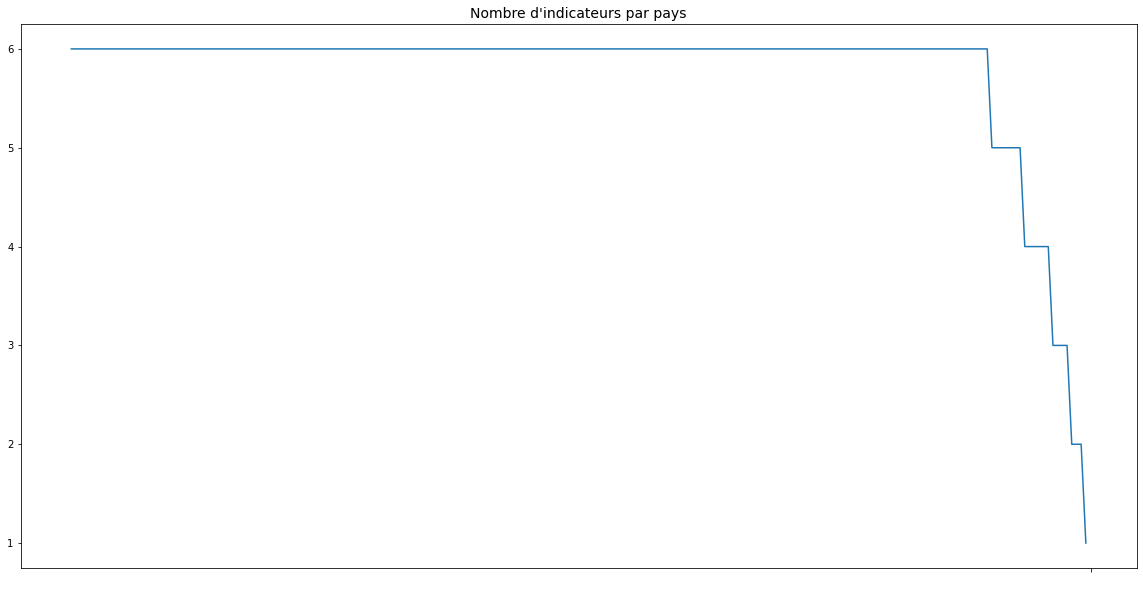

In [52]:
xp = StatsData_pays_ok["Indicator Code"]
plt.figure(figsize=(20, 10))
plt.title('Nombre d\'indicateurs par pays',fontsize=14)
plt.plot(xp ,label='Value count')
plt.xticks(" ")
plt.show()

In [53]:
StatsData_pays_ok = StatsData_pays_ok.loc[StatsData_pays_ok["Indicator Name"].isin([6])]
StatsData_pays_ok

Country Code  Indicator Name  Indicator Code  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  Moyenne  Last value
Country Name                                                                                                                                                                                           
Afghanistan                                6               6               6     2     5     5     6     6     5     4     5     5     6     5     6     5     5     6     5     4        6           6
Nigeria                                    6               6               6     4     4     4     5     5     5     4     4     4     4     5     6     4     5     4     4     4        6           6
Morocco                                    6               6               6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     4        6           6
Mozambique                                 6               6               6     5     5     5     4     6     6     6     6     6     6     6     6     6     6     6     6     4        6           6
Myanmar                                    6               6               6     4     6     5     5     5     5     5     6     5     5     5     5     5     4     5     4     4        6           6
Namibia                                    6               6               6     5     6     6     6     5     6     6     5     6     5     5     4     5     5     4     4     4        6           6
Nepal                                      6               6               6     6     6     6     6     6     6     6     6     6     6     6     6     5     6     6     6     5        6           6
Netherlands                                6               6               6     6     6     6     6     6     6     6     6     6     6     6     6     6     4     4     6     4        6           6
New Caledonia                              6               6               6     4     3     3     3     3     3     3     3     3     3     3     3     3     3     3     3     2        4           4
New Zealand                                6               6               6     5     5     6     5     5     5     5     5     5     6     6     6     6     6     6     6     4        6           6
Nicaragua                                  6               6               6     5     5     6     4     5     5     5     5     5     4     5     4     4     4     4     4     4        6           6
Niger                                      6               6               6     5     5     5     6     6     6     6     6     6     6     6     6     6     5     5     5     4        6           6
Norway                                     6               6               6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     6     4        6           6
Mongolia                                   6               6               6     6     6     6     5     5     5     5     6     6     6     6     5     5     5     5     6     4        6           6
Oman                                       6               6               6     5     5     5     6     5     6     6     6     6     6     5     6     5     6     5     6     4        6           6
Pakistan                                   6               6               6     3     4     5     6     6     6     6     6     6     6     5     6     6     6     6     6     4        6           6
Palau                                      6               6               6     5     4     5     5     5     4     4     4     3     3     3     3     3     5     4     3     4        6           6
Panama                                     6               6               6     6     6     6     5     6     6     6     6     6     6     6     6     6     5     4     4     4        6           6
Papua New Guinea                

In [54]:
StatsData_pays_index = StatsData_pays_ok.index.tolist()
StatsData_pays_index

['Afghanistan',
 'Nigeria',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Caledonia',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Norway',
 'Mongolia',
 'Oman',
 'Pakistan',
 'Palau',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Montenegro',
 'Moldova',
 'Qatar',
 'Macao SAR, China',
 'Kyrgyz Republic',
 'Lao PDR',
 'Albania',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Micronesia, Fed. Sts.',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Puerto Rico',
 'Romania',
 'Korea, Rep.',
 'United Arab Emirates',
 'Tanzania',
 'Thailand',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'Uganda',
 'Ukraine',
 'United Kingdom',
 'Syrian Arab Republic',
 'United States',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela, R

In [55]:
# Dataframe avec Pays = 6 indicateurs 

StatsData_1_selec = clean_date_ok.copy()
StatsData_1_selec = StatsData_1_selec.loc[StatsData_1_selec["Country Name"].isin(StatsData_pays_index)]
StatsData_1_selec

Country Name Country Code                                     Indicator Name  Indicator Code          2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2011          2012          2013          2014          2015          2016       Moyenne    Last value
92822   Afghanistan          AFG  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC           NaN  3.624150e+05  3.952230e+05  4.050020e+05  5.915410e+05  6.424420e+05           NaN  1.028382e+06  1.415293e+06  1.693479e+06  2.032719e+06  2.190878e+06  2.392465e+06  2.508900e+06  2.577715e+06  2.671830e+06           NaN  1.493449e+06  2.671830e+06
92829   Afghanistan          AFG  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN  2.621100e+04  2.764800e+04           NaN           NaN           NaN           NaN  9.518500e+04           NaN  9.750400e+04           NaN           NaN  2.628740e+05           NaN           NaN  1.018844e+05  2.628740e+05
92870   Afghanistan          AFG                       GDP per capita (current US$)  NY.GDP.PCAP.CD           NaN  1.174097e+02  1.878451e+02  1.987285e+02  2.191414e+02  2.502941e+02  2.725631e+02  3.698358e+02  3.733611e+02  4.458933e+02  5.533003e+02  6.035370e+02  6.690091e+02  6.317450e+02  6.120697e+02  5.695779e+02  5.617787e+02  4.147556e+02  5.617787e+02
93000   Afghanistan          AFG                    Internet users (per 100 people)  IT.NET.USER.P2           NaN  4.722568e-03  4.561395e-03  8.789125e-02  1.058090e-01  1.224148e+00  2.107124e+00  1.900000e+00  1.840000e+00  3.550000e+00  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00  8.260000e+00  1.059573e+01  3.564658e+00  1.059573e+01
93932   Afghanistan          AFG                       Population growth (annual %)     SP.POP.GROW  3.494659e+00  4.251504e+00  4.720528e+00  4.818041e+00  4.468918e+00  3.870470e+00  3.228630e+00  2.755225e+00  2.512574e+00  2.569114e+00  2.812617e+00  3.095119e+00  3.272703e+00  3.315224e+00  3.183201e+00  2.943234e+00  2.689163e+00  3.411819e+00  2.689163e+00
...             ...          ...                                                ...             ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...
884469     Zimbabwe          ZWE  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  9.461100e+04  9.328500e+04  9.401200e+04  9.411500e+04           NaN  1.355750e+05           NaN  1.023196e+05  1.355750e+05
884510     Zimbabwe          ZWE                       GDP per capita (current US$)  NY.GDP.PCAP.CD  5.473589e+02  5.480587e+02  5.073480e+02  4.533512e+02  4.543607e+02  4.447605e+02  4.147962e+02  3.969982e+02  3.256786e+02  6.242722e+02  7.199795e+02  8.409499e+02  9.681639e+02  1.026388e+03  1.031105e+03  1.033416e+03  1.029077e+03  6.685919e+02  1.029077e+03
884640     Zimbabwe          ZWE                    Internet users (per 100 people)  IT.NET.USER.P2  4.014335e-01  7.998460e-01  1.100000e+00  1.800000e+00  2.100000e+00  2.400000e+00  2.400000e+00  3.000000e+00  3.500000e+00  4.000000e+00  6.400000e+00  8.400000e+00  1.200000e+01  1.550000e+01  1.636474e+01  2.274282e+01  2.311999e+01  7.413460e+00  2.311999e+01
885572     Zimbabwe          ZWE                       Population growth (annual %)     SP.POP.GROW  1.298782e+00  1.170597e+00  1.080653e+00  1.061280e+00  1.130323e+00  1.263909e+00  1.413720e+00  1.554735e+00  1.700106e+00  1.842497e+00  1.976756e+00  2.109672e+00  2.228306e+00  2.309366e+00  2.344799e+00  2.345643e+00  2.336070e+00  1.715718

In [56]:
StatsData_1_selec['Evolution 2014-2015'] = ((StatsData_1_selec['2015'] - StatsData_1_selec['2014']) / StatsData_1_selec['2014'])*100
StatsData_1_selec['Evolution 2015-2016'] = ((StatsData_1_selec['2016'] - StatsData_1_selec['2015']) / StatsData_1_selec['2015'])*100
StatsData_1_selec['Evolution Totale'] = ((StatsData_1_selec['2016'] - StatsData_1_selec['2014']) / StatsData_1_selec['2014'])*100
StatsData_1_selec


Country Name Country Code                                     Indicator Name  Indicator Code          2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2011          2012          2013          2014          2015          2016       Moyenne    Last value  Evolution 2014-2015  Evolution 2015-2016  Evolution Totale
92822   Afghanistan          AFG  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC           NaN  3.624150e+05  3.952230e+05  4.050020e+05  5.915410e+05  6.424420e+05           NaN  1.028382e+06  1.415293e+06  1.693479e+06  2.032719e+06  2.190878e+06  2.392465e+06  2.508900e+06  2.577715e+06  2.671830e+06           NaN  1.493449e+06  2.671830e+06             3.651102                  NaN               NaN
92829   Afghanistan          AFG  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN  2.621100e+04  2.764800e+04           NaN           NaN           NaN           NaN  9.518500e+04           NaN  9.750400e+04           NaN           NaN  2.628740e+05           NaN           NaN  1.018844e+05  2.628740e+05                  NaN                  NaN               NaN
92870   Afghanistan          AFG                       GDP per capita (current US$)  NY.GDP.PCAP.CD           NaN  1.174097e+02  1.878451e+02  1.987285e+02  2.191414e+02  2.502941e+02  2.725631e+02  3.698358e+02  3.733611e+02  4.458933e+02  5.533003e+02  6.035370e+02  6.690091e+02  6.317450e+02  6.120697e+02  5.695779e+02  5.617787e+02  4.147556e+02  5.617787e+02            -6.942303            -1.369291         -8.216533
93000   Afghanistan          AFG                    Internet users (per 100 people)  IT.NET.USER.P2           NaN  4.722568e-03  4.561395e-03  8.789125e-02  1.058090e-01  1.224148e+00  2.107124e+00  1.900000e+00  1.840000e+00  3.550000e+00  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00  8.260000e+00  1.059573e+01  3.564658e+00  1.059573e+01            18.000000            28.277560         51.367520
93932   Afghanistan          AFG                       Population growth (annual %)     SP.POP.GROW  3.494659e+00  4.251504e+00  4.720528e+00  4.818041e+00  4.468918e+00  3.870470e+00  3.228630e+00  2.755225e+00  2.512574e+00  2.569114e+00  2.812617e+00  3.095119e+00  3.272703e+00  3.315224e+00  3.183201e+00  2.943234e+00  2.689163e+00  3.411819e+00  2.689163e+00            -7.538551            -8.632365        -15.520161
...             ...          ...                                                ...             ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...                  ...                  ...               ...
884469     Zimbabwe          ZWE  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  9.461100e+04  9.328500e+04  9.401200e+04  9.411500e+04           NaN  1.355750e+05           NaN  1.023196e+05  1.355750e+05                  NaN                  NaN               NaN
884510     Zimbabwe          ZWE                       GDP per capita (current US$)  NY.GDP.PCAP.CD  5.473589e+02  5.480587e+02  5.073480e+02  4.533512e+02  4.543607e+02  4.447605e+02  4.147962e+02  3.969982e+02  3.256786e+02  6.242722e+02  7.199795e+02  8.409499e+02  9.681639e+02  1.026388e+03  1.031105e+03  1.033416e+03  1.029077e+03  6.685919e+02  1.029077e+03             0.224150            -0.419888         -0.196679
884640     Zimbabwe          ZWE                    Internet users (per 100 people)  IT.NET.USER.P2  4.014335e-01  7.998460e-01  1.100000e+00  1.800000e+00  2.100000e+00  2.

In [57]:
StatsData_1_selec_growth = StatsData_1_selec.loc[:,['Country Name','Evolution 2014-2015','Evolution 2015-2016','Evolution Totale']]
StatsData_1_selec_growth

Country Name  Evolution 2014-2015  Evolution 2015-2016  Evolution Totale
92822   Afghanistan             3.651102                  NaN               NaN
92829   Afghanistan                  NaN                  NaN               NaN
92870   Afghanistan            -6.942303            -1.369291         -8.216533
93000   Afghanistan            18.000000            28.277560         51.367520
93932   Afghanistan            -7.538551            -8.632365        -15.520161
...             ...                  ...                  ...               ...
884469     Zimbabwe                  NaN                  NaN               NaN
884510     Zimbabwe             0.224150            -0.419888         -0.196679
884640     Zimbabwe            38.974516             1.658418         41.279294
885572     Zimbabwe             0.035990            -0.408136         -0.372293
885798     Zimbabwe             2.373370             2.363569          4.793035

[1176 rows x 4 columns]

In [58]:
def func(x):
    if x.values[0] is None:
        return None
    else:
        return StatsData_1_selec_growth.loc[x.name, x.values[0]]
    
last_v_growth = pd.DataFrame(StatsData_1_selec_growth.apply(lambda x: x.last_valid_index(), axis=1)).apply(func,axis=1)
last_v_growth


92822        3.651102
92829     Afghanistan
92870       -8.216533
93000        51.36752
93932      -15.520161
             ...     
884469       Zimbabwe
884510      -0.196679
884640      41.279294
885572      -0.372293
885798       4.793035
Length: 1176, dtype: object

In [59]:
StatsData_1_selec['Last value growth'] = last_v_growth
StatsData_1_selec['Last value growth'] = pd.to_numeric(StatsData_1_selec['Last value growth'],errors = 'coerce')
StatsData_1_selec

Country Name Country Code                                     Indicator Name  Indicator Code          2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2011          2012          2013          2014          2015          2016       Moyenne    Last value  Evolution 2014-2015  Evolution 2015-2016  Evolution Totale  Last value growth
92822   Afghanistan          AFG  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC           NaN  3.624150e+05  3.952230e+05  4.050020e+05  5.915410e+05  6.424420e+05           NaN  1.028382e+06  1.415293e+06  1.693479e+06  2.032719e+06  2.190878e+06  2.392465e+06  2.508900e+06  2.577715e+06  2.671830e+06           NaN  1.493449e+06  2.671830e+06             3.651102                  NaN               NaN           3.651102
92829   Afghanistan          AFG  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN  2.621100e+04  2.764800e+04           NaN           NaN           NaN           NaN  9.518500e+04           NaN  9.750400e+04           NaN           NaN  2.628740e+05           NaN           NaN  1.018844e+05  2.628740e+05                  NaN                  NaN               NaN                NaN
92870   Afghanistan          AFG                       GDP per capita (current US$)  NY.GDP.PCAP.CD           NaN  1.174097e+02  1.878451e+02  1.987285e+02  2.191414e+02  2.502941e+02  2.725631e+02  3.698358e+02  3.733611e+02  4.458933e+02  5.533003e+02  6.035370e+02  6.690091e+02  6.317450e+02  6.120697e+02  5.695779e+02  5.617787e+02  4.147556e+02  5.617787e+02            -6.942303            -1.369291         -8.216533          -8.216533
93000   Afghanistan          AFG                    Internet users (per 100 people)  IT.NET.USER.P2           NaN  4.722568e-03  4.561395e-03  8.789125e-02  1.058090e-01  1.224148e+00  2.107124e+00  1.900000e+00  1.840000e+00  3.550000e+00  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00  8.260000e+00  1.059573e+01  3.564658e+00  1.059573e+01            18.000000            28.277560         51.367520          51.367520
93932   Afghanistan          AFG                       Population growth (annual %)     SP.POP.GROW  3.494659e+00  4.251504e+00  4.720528e+00  4.818041e+00  4.468918e+00  3.870470e+00  3.228630e+00  2.755225e+00  2.512574e+00  2.569114e+00  2.812617e+00  3.095119e+00  3.272703e+00  3.315224e+00  3.183201e+00  2.943234e+00  2.689163e+00  3.411819e+00  2.689163e+00            -7.538551            -8.632365        -15.520161         -15.520161
...             ...          ...                                                ...             ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...                  ...                  ...               ...                ...
884469     Zimbabwe          ZWE  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  9.461100e+04  9.328500e+04  9.401200e+04  9.411500e+04           NaN  1.355750e+05           NaN  1.023196e+05  1.355750e+05                  NaN                  NaN               NaN                NaN
884510     Zimbabwe          ZWE                       GDP per capita (current US$)  NY.GDP.PCAP.CD  5.473589e+02  5.480587e+02  5.073480e+02  4.533512e+02  4.543607e+02  4.447605e+02  4.147962e+02  3.969982e+02  3.256786e+02  6.242722e+02  7.199795e+02  8.409499e+02  9.681639e+02  1.026388e+03  1.031105e+03  1.033416e+03  1.029077e+03  6.685919e+02  1.029077e+03             0.224150            -0.419888         -0.196679          -0.196679
88

In [60]:
StatsData_1_selec.describe()

2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2011          2012          2013          2014          2015          2016       Moyenne    Last value  Evolution 2014-2015  Evolution 2015-2016  Evolution Totale  Last value growth
count  1.045000e+03  1.049000e+03  1.066000e+03  1.057000e+03  1.066000e+03  1.065000e+03  1.057000e+03  1.069000e+03  1.072000e+03  1.071000e+03  1.069000e+03  1.077000e+03  1.069000e+03  1.055000e+03  1.040000e+03  1.008000e+03  7.840000e+02  1.161000e+03  1.161000e+03           988.000000           780.000000        782.000000         992.000000
mean   6.227612e+06  6.244942e+06  6.244537e+06  6.461504e+06  6.419953e+06  6.507799e+06  6.694286e+06  6.735406e+06  6.809344e+06  6.811332e+06  6.878086e+06  6.944250e+06  7.077187e+06  7.365498e+06  7.550223e+06  7.801449e+06  9.417924e+06  6.317190e+06  6.983416e+06             2.299446             2.435071          6.467603           5.312876
std    5.375168e+07  5.423497e+07  5.440961e+07  5.528411e+07  5.558549e+07  5.619670e+07  5.703367e+07  5.728322e+07  5.776467e+07  5.826551e+07  5.885862e+07  5.916754e+07  5.991280e+07  6.092821e+07  6.191415e+07  6.342385e+07  7.226118e+07  5.542541e+07  5.966151e+07            22.067762            14.215211         40.928917          36.699303
min   -2.850973e+00 -1.990632e+00 -2.170699e+00 -1.474533e+00 -1.302692e+00 -1.628401e+00 -1.596378e+00 -1.477223e+00 -1.666383e+00 -1.651025e+00 -2.096943e+00 -2.628656e+00 -2.147571e+00 -3.040564e+00 -3.107229e+00 -2.467847e+00 -1.797539e+00 -1.203246e+00 -1.797539e+00          -124.995610          -122.245220       -131.120114        -131.120114
25%    2.708628e+00  2.854200e+00  3.387378e+00  3.965037e+00  4.850584e+00  6.043891e+00  7.200000e+00  8.260000e+00  1.015500e+01  1.282471e+01  1.600000e+01  2.016120e+01  2.360000e+01  2.390465e+01  2.572943e+01  2.558403e+01  3.841937e+00  2.425496e+01  5.248181e+01            -2.769815            -0.879592         -4.702732          -3.919970
50%    4.316554e+03  4.924923e+03  4.920692e+03  5.134906e+03  6.148089e+03  7.218000e+03  6.311000e+03  7.532000e+03  9.007836e+03  9.187450e+03  9.071357e+03  1.074158e+04  1.077951e+04  1.089924e+04  9.392367e+03  6.491372e+03  3.821413e+02  1.123917e+04  1.321600e+04             0.781043             1.504007          2.241317           1.684820
75%    4.268840e+05  4.579450e+05  4.660032e+05  4.883320e+05  4.962125e+05  5.164620e+05  5.043070e+05  5.257790e+05  5.321752e+05  5.299685e+05  5.261030e+05  5.833070e+05  6.206010e+05  6.559265e+05  6.804190e+05  5.585128e+05  9.618928e+04  5.066313e+05  5.861050e+05             4.257665             4.598926          8.274855           6.860570
max    1.262645e+09  1.271850e+09  1.280400e+09  1.288400e+09  1.296075e+09  1.303720e+09  1.311020e+09  1.317885e+09  1.324655e+09  1.331260e+09  1.337705e+09  1.344130e+09  1.350695e+09  1.357380e+09  1.364270e+09  1.371220e+09  1.378665e+09  1.323057e+09  1.378665e+09           277.861658           122.333496        609.046152         609.046152

In [61]:
data_date_ok = StatsData_1_selec.copy()
data_date_ok.set_index('Country Name', inplace = True)
data_date_ok

Country Code                                     Indicator Name  Indicator Code          2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2011          2012          2013          2014          2015          2016       Moyenne    Last value  Evolution 2014-2015  Evolution 2015-2016  Evolution Totale  Last value growth
Country Name                                                                                                                                                                                                                                                                                                                                                                                                                                         
Afghanistan           AFG  Enrolment in secondary general, both sexes (nu...  SE.SEC.ENRL.GC           NaN  3.624150e+05  3.952230e+05  4.050020e+05  5.915410e+05  6.424420e+05           NaN  1.028382e+06  1.415293e+06  1.693479e+06  2.032719e+06  2.190878e+06  2.392465e+06  2.508900e+06  2.577715e+06  2.671830e+06           NaN  1.493449e+06  2.671830e+06             3.651102                  NaN               NaN           3.651102
Afghanistan           AFG  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN  2.621100e+04  2.764800e+04           NaN           NaN           NaN           NaN  9.518500e+04           NaN  9.750400e+04           NaN           NaN  2.628740e+05           NaN           NaN  1.018844e+05  2.628740e+05                  NaN                  NaN               NaN                NaN
Afghanistan           AFG                       GDP per capita (current US$)  NY.GDP.PCAP.CD           NaN  1.174097e+02  1.878451e+02  1.987285e+02  2.191414e+02  2.502941e+02  2.725631e+02  3.698358e+02  3.733611e+02  4.458933e+02  5.533003e+02  6.035370e+02  6.690091e+02  6.317450e+02  6.120697e+02  5.695779e+02  5.617787e+02  4.147556e+02  5.617787e+02            -6.942303            -1.369291         -8.216533          -8.216533
Afghanistan           AFG                    Internet users (per 100 people)  IT.NET.USER.P2           NaN  4.722568e-03  4.561395e-03  8.789125e-02  1.058090e-01  1.224148e+00  2.107124e+00  1.900000e+00  1.840000e+00  3.550000e+00  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00  8.260000e+00  1.059573e+01  3.564658e+00  1.059573e+01            18.000000            28.277560         51.367520          51.367520
Afghanistan           AFG                       Population growth (annual %)     SP.POP.GROW  3.494659e+00  4.251504e+00  4.720528e+00  4.818041e+00  4.468918e+00  3.870470e+00  3.228630e+00  2.755225e+00  2.512574e+00  2.569114e+00  2.812617e+00  3.095119e+00  3.272703e+00  3.315224e+00  3.183201e+00  2.943234e+00  2.689163e+00  3.411819e+00  2.689163e+00            -7.538551            -8.632365        -15.520161         -15.520161
...                   ...                                                ...             ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...           ...                  ...                  ...               ...                ...
Zimbabwe              ZWE  Enrolment in tertiary education, all programme...     SE.TER.ENRL           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN  9.461100e+04  9.328500e+04  9.401200e+04  9.411500e+04           NaN  1.355750e+05           NaN  1.023196e+05  1.355750e+05                  NaN                  NaN               NaN                NaN
Zimbabwe              ZWE                       GDP per capita (current

In [62]:
# 1e indicateur : Population, total 

Population_totale = data_date_ok.loc[data_date_ok["Indicator Name"].isin(['Population, total'])]
Population_totale = Population_totale.loc[:,[ 'Last value']].sort_values(by = 'Last value', ascending = False)
Population_totale                                
                                       

Last value
Country Name                                
China                           1.378665e+09
India                           1.324171e+09
United States                   3.231275e+08
Indonesia                       2.611155e+08
Brazil                          2.076529e+08
Pakistan                        1.932035e+08
Nigeria                         1.859896e+08
Bangladesh                      1.629516e+08
Russian Federation              1.443424e+08
Mexico                          1.275404e+08
Japan                           1.269945e+08
Philippines                     1.033202e+08
Ethiopia                        1.024032e+08
Egypt, Arab Rep.                9.568868e+07
Vietnam                         9.270110e+07
Germany                         8.266768e+07
Iran, Islamic Rep.              8.027743e+07
Turkey                          7.951243e+07
Congo, Dem. Rep.                7.873615e+07
Thailand                        6.886351e+07
France                          6.689611e+07
United Kingdom                  6.563724e+07
Italy                           6.060059e+07
South Africa                    5.590886e+07
Tanzania                        5.557220e+07
Myanmar                         5.288522e+07
Korea, Rep.                     5.124571e+07
Colombia                        4.865342e+07
Kenya                           4.846157e+07
Spain                           4.644396e+07
Ukraine                         4.500464e+07
Argentina                       4.384743e+07
Uganda                          4.148796e+07
Algeria                         4.060605e+07
Sudan                           3.957883e+07
Poland                          3.794802e+07
Iraq                            3.720257e+07
Canada                          3.628642e+07
Morocco                         3.527679e+07
Afghanistan                     3.465603e+07
Saudi Arabia                    3.227569e+07
Uzbekistan                      3.184820e+07
Peru                            3.177384e+07
Venezuela, RB                   3.156818e+07
Malaysia                        3.118726e+07
Nepal                           2.898277e+07
Mozambique                      2.882948e+07
Angola                          2.881346e+07
Ghana                           2.820673e+07
Yemen, Rep.                     2.758421e+07
Madagascar                      2.489455e+07
Australia                       2.412716e+07
Cote d'Ivoire                   2.369592e+07
Cameroon                        2.343919e+07
Sri Lanka                       2.120300e+07
Niger                           2.067299e+07
Romania                         1.970530e+07
Burkina Faso                    1.864643e+07
Syrian Arab Republic            1.843045e+07
Malawi                          1.809158e+07
Mali                            1.799484e+07
Chile                           1.790975e+07
Kazakhstan                      1.779703e+07
Netherlands                     1.701841e+07
Zambia                          1.659139e+07
Guatemala                       1.658247e+07
Ecuador                         1.638507e+07
Zimbabwe                        1.615036e+07
Cambodia                        1.576237e+07
Senegal                         1.541161e+07
Chad                            1.445254e+07
Somalia                         1.431800e+07
Guinea                          1.239592e+07
Rwanda                          1.191751e+07
Cuba                            1.147598e+07
Tunisia                         1.140325e+07
Belgium                         1.134816e+07
Bolivia                         1.088788e+07
Benin                           1.087230e+07
Haiti                           1.084733e+07
Greece                          1.074674e+07
Dominican Republic              1.064879e+07
Czech Republic                  1.056163e+07
Burundi                         1.052412e+07
Portugal                        1.032461e+07
Sweden                          9.903122e+06
Hungary                         9.817958e+06
Azerbaijan                   

Text(0.5, 1.0, 'Population totale')

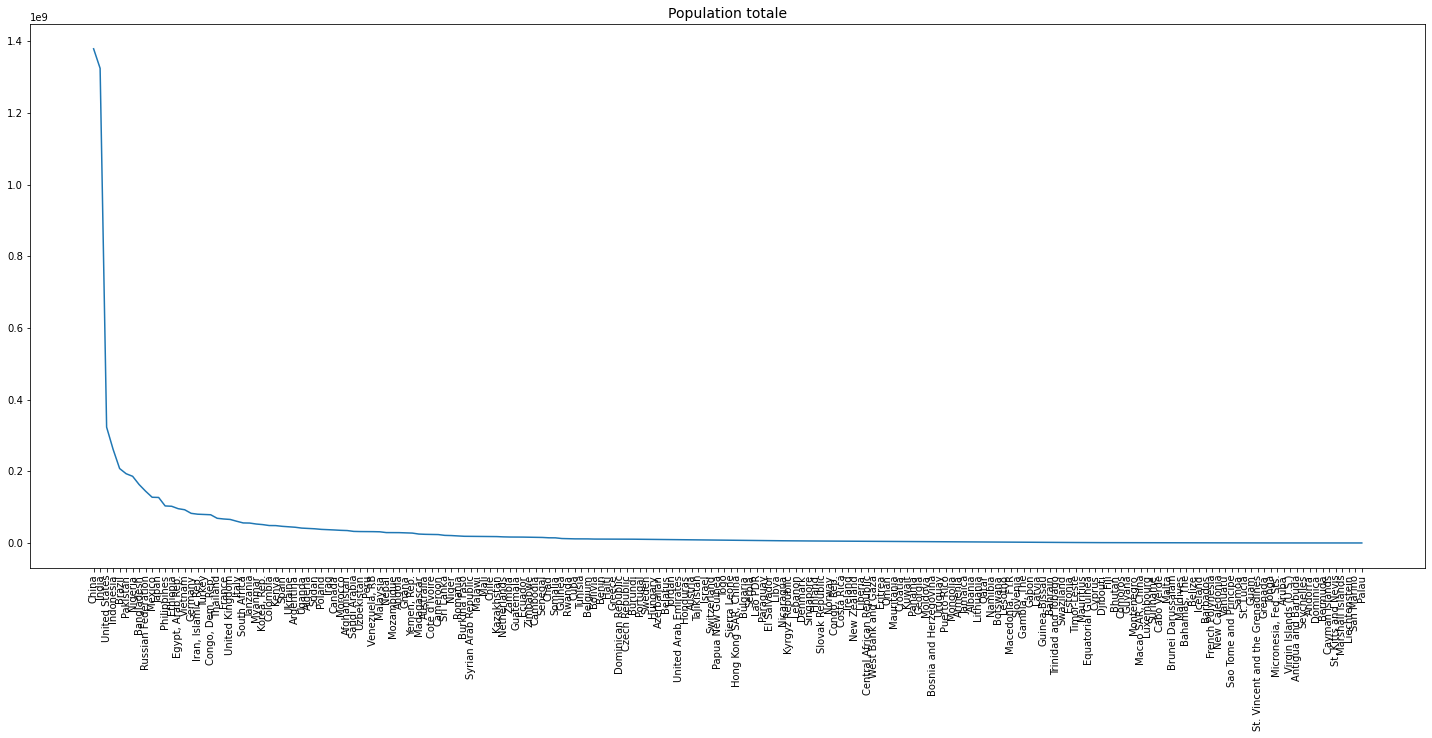

In [63]:
plt.figure(figsize=(25, 10))
plt.plot(Population_totale)
plt.xticks(rotation=90)
plt.title('Population totale',fontsize=14)

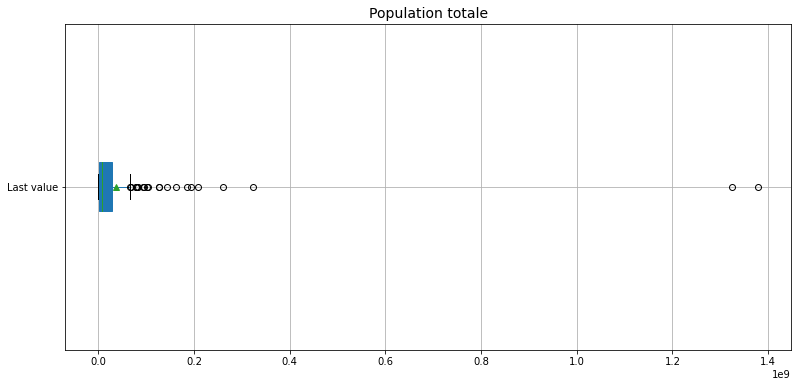

In [64]:
plt.figure(figsize=(13,6))
plt.title('Population totale',fontsize=14) 
Population_totale.boxplot(column="Last value", showfliers=True, 
            vert=False, patch_artist=True, showmeans=True)
plt.show()

In [65]:
Population_totale.describe()

Last value
count  1.960000e+02
mean   3.760968e+07
std    1.410740e+08
min    2.150300e+04
25%    1.718066e+06
50%    7.501282e+06
75%    2.773984e+07
max    1.378665e+09

In [66]:
Pop_tot = Population_totale[Population_totale['Last value'] > Population_totale['Last value'].quantile(.75)] 
Pop_tot

Last value
Country Name                    
China               1.378665e+09
India               1.324171e+09
United States       3.231275e+08
Indonesia           2.611155e+08
Brazil              2.076529e+08
Pakistan            1.932035e+08
Nigeria             1.859896e+08
Bangladesh          1.629516e+08
Russian Federation  1.443424e+08
Mexico              1.275404e+08
Japan               1.269945e+08
Philippines         1.033202e+08
Ethiopia            1.024032e+08
Egypt, Arab Rep.    9.568868e+07
Vietnam             9.270110e+07
Germany             8.266768e+07
Iran, Islamic Rep.  8.027743e+07
Turkey              7.951243e+07
Congo, Dem. Rep.    7.873615e+07
Thailand            6.886351e+07
France              6.689611e+07
United Kingdom      6.563724e+07
Italy               6.060059e+07
South Africa        5.590886e+07
Tanzania            5.557220e+07
Myanmar             5.288522e+07
Korea, Rep.         5.124571e+07
Colombia            4.865342e+07
Kenya               4.846157e+07
Spain               4.644396e+07
Ukraine             4.500464e+07
Argentina           4.384743e+07
Uganda              4.148796e+07
Algeria             4.060605e+07
Sudan               3.957883e+07
Poland              3.794802e+07
Iraq                3.720257e+07
Canada              3.628642e+07
Morocco             3.527679e+07
Afghanistan         3.465603e+07
Saudi Arabia        3.227569e+07
Uzbekistan          3.184820e+07
Peru                3.177384e+07
Venezuela, RB       3.156818e+07
Malaysia            3.118726e+07
Nepal               2.898277e+07
Mozambique          2.882948e+07
Angola              2.881346e+07
Ghana               2.820673e+07

In [67]:
rows = len(Pop_tot.axes[0])
rows 

49

In [68]:
pop_bonus = Pop_tot.copy()
pop_bonus['score_pop_out'] = 1
pop_bonus

Last value  score_pop_out
Country Name                                   
China               1.378665e+09              1
India               1.324171e+09              1
United States       3.231275e+08              1
Indonesia           2.611155e+08              1
Brazil              2.076529e+08              1
Pakistan            1.932035e+08              1
Nigeria             1.859896e+08              1
Bangladesh          1.629516e+08              1
Russian Federation  1.443424e+08              1
Mexico              1.275404e+08              1
Japan               1.269945e+08              1
Philippines         1.033202e+08              1
Ethiopia            1.024032e+08              1
Egypt, Arab Rep.    9.568868e+07              1
Vietnam             9.270110e+07              1
Germany             8.266768e+07              1
Iran, Islamic Rep.  8.027743e+07              1
Turkey              7.951243e+07              1
Congo, Dem. Rep.    7.873615e+07              1
Thailand            6.886351e+07              1
France              6.689611e+07              1
United Kingdom      6.563724e+07              1
Italy               6.060059e+07              1
South Africa        5.590886e+07              1
Tanzania            5.557220e+07              1
Myanmar             5.288522e+07              1
Korea, Rep.         5.124571e+07              1
Colombia            4.865342e+07              1
Kenya               4.846157e+07              1
Spain               4.644396e+07              1
Ukraine             4.500464e+07              1
Argentina           4.384743e+07              1
Uganda              4.148796e+07              1
Algeria             4.060605e+07              1
Sudan               3.957883e+07              1
Poland              3.794802e+07              1
Iraq                3.720257e+07              1
Canada              3.628642e+07              1
Morocco             3.527679e+07              1
Afghanistan         3.465603e+07              1
Saudi Arabia        3.227569e+07              1
Uzbekistan          3.184820e+07              1
Peru                3.177384e+07              1
Venezuela, RB       3.156818e+07              1
Malaysia            3.118726e+07              1
Nepal               2.898277e+07              1
Mozambique          2.882948e+07              1
Angola              2.881346e+07              1
Ghana               2.820673e+07              1

In [69]:
# 15 pays pop tot la plus élevée

Population_totale_15 = Population_totale.copy()
Population_totale_15 = Population_totale_15.iloc[0:15,:]
Population_totale_15['score_population'] = Population_totale_15['Last value'].rank(ascending=True)
Population_totale_15

Last value  score_population
Country Name                                      
China               1.378665e+09              15.0
India               1.324171e+09              14.0
United States       3.231275e+08              13.0
Indonesia           2.611155e+08              12.0
Brazil              2.076529e+08              11.0
Pakistan            1.932035e+08              10.0
Nigeria             1.859896e+08               9.0
Bangladesh          1.629516e+08               8.0
Russian Federation  1.443424e+08               7.0
Mexico              1.275404e+08               6.0
Japan               1.269945e+08               5.0
Philippines         1.033202e+08               4.0
Ethiopia            1.024032e+08               3.0
Egypt, Arab Rep.    9.568868e+07               2.0
Vietnam             9.270110e+07               1.0

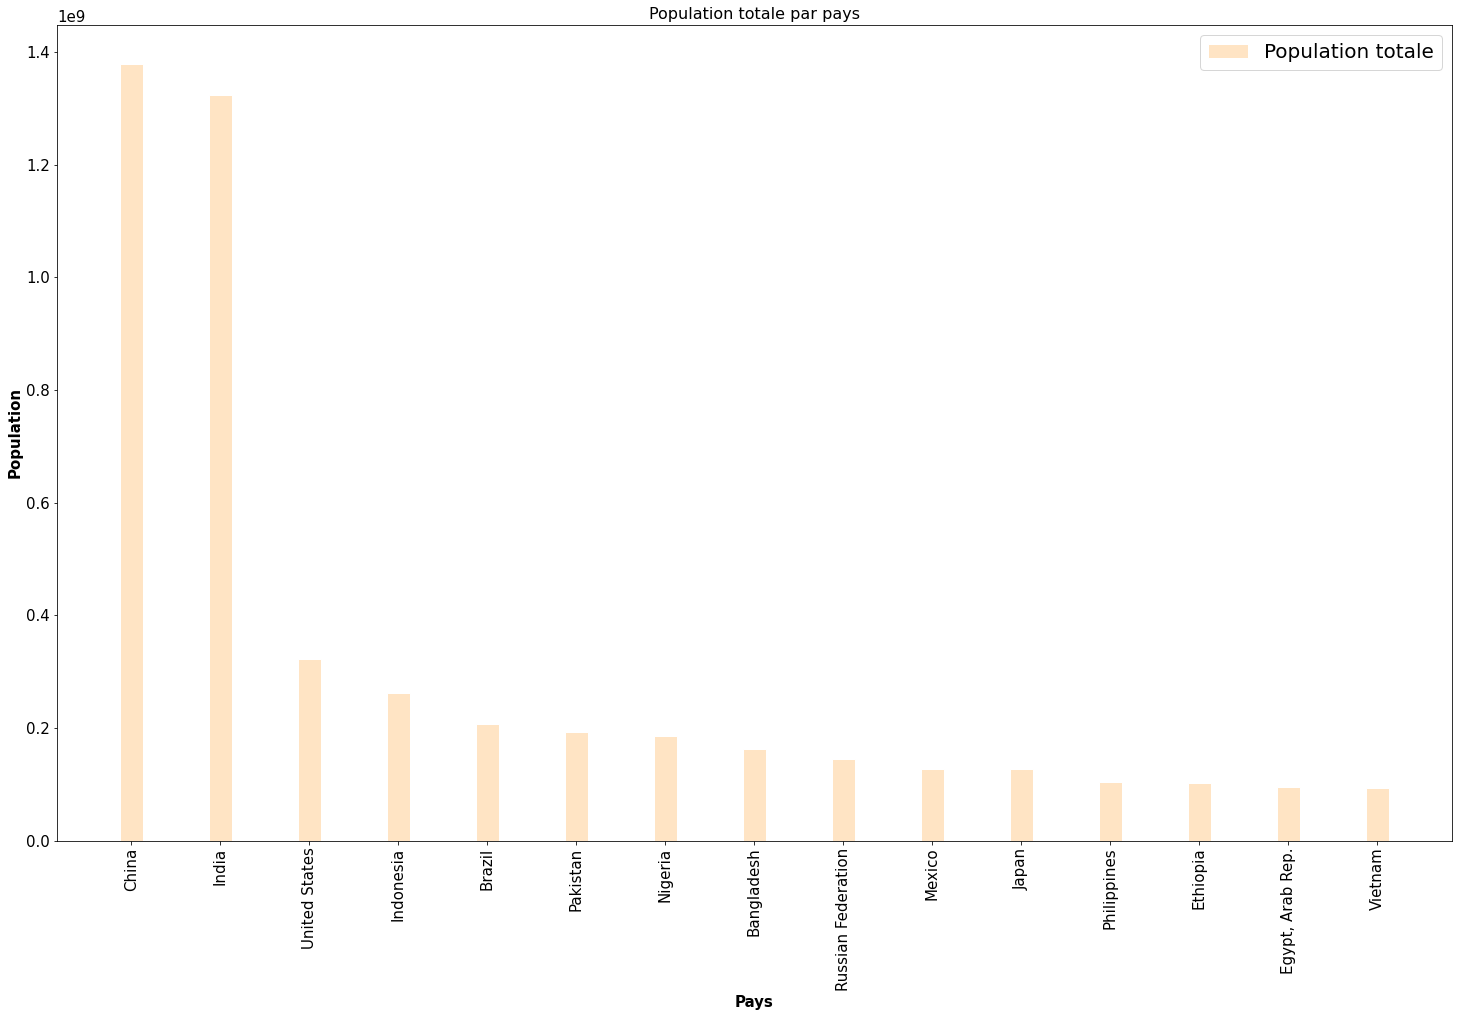

In [70]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = Population_totale_15['Last value']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r2, bars1, color='bisque', width=barWidth, edgecolor='white', label='Population totale')
 
# Add xticks on the middle of the group bars
plt.xlabel('Pays', fontweight='bold')
plt.ylabel('Population', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], Population_totale_15.index, rotation=90)

# Add a tilte
plt.title('Population totale par pays',fontsize=16)

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()  

In [71]:
Population_growth = data_date_ok.loc[data_date_ok["Indicator Name"].isin(['Population growth (annual %)'])]
Population_growth = Population_growth.loc[:,['2014','2015','2016']].sort_values(by = '2016', ascending = False)
Population_growth  

2014      2015      2016
Country Name                                                
Oman                            6.504660  5.856170  5.217721
Equatorial Guinea               4.128421  3.989139  3.847227
Niger                           3.842681  3.835750  3.826066
Bahrain                         1.582802  2.618665  3.812797
Qatar                           5.361236  4.412616  3.495070
Angola                          3.485413  3.428021  3.367572
Uganda                          3.350650  3.321556  3.290872
Congo, Dem. Rep.                3.319176  3.300416  3.278534
Jordan                          4.597538  3.896131  3.185855
Burundi                         2.992265  3.061103  3.135333
Chad                            3.264706  3.190940  3.114092
Tanzania                        3.107572  3.100829  3.092454
Gambia, The                     3.099283  3.067312  3.033580
Zambia                          3.040211  3.024123  3.002816
Mali                            2.901031  2.933977  2.971969
Iraq                            3.260407  3.120450  2.965164
Kuwait                          4.988681  3.974069  2.924206
Burkina Faso                    2.961978  2.939690  2.915614
Malawi                          2.922940  2.914371  2.904819
Somalia                         2.858286  2.881205  2.904372
West Bank and Gaza              2.957995  2.924691  2.884693
Mozambique                      2.900696  2.891417  2.881208
Senegal                         2.970878  2.919162  2.860609
Mauritania                      2.940254  2.872311  2.798060
Benin                           2.782287  2.772978  2.763534
Afghanistan                     3.183201  2.943234  2.689163
Madagascar                      2.701097  2.694578  2.688871
Nigeria                         2.659551  2.640357  2.619034
Lebanon                         6.016439  4.334249  2.617574
Cameroon                        2.661876  2.638536  2.613585
Congo, Rep.                     2.488215  2.524714  2.572357
Kenya                           2.636116  2.599337  2.560925
Gabon                           3.165293  2.862182  2.537809
Togo                            2.606212  2.565901  2.523861
Guinea-Bissau                   2.597498  2.561842  2.519329
Cote d'Ivoire                   2.539767  2.529163  2.510354
Liberia                         2.407530  2.449608  2.506363
Ethiopia                        2.579068  2.541469  2.501821
Guinea                          2.304040  2.393917  2.486225
Yemen, Rep.                     2.585905  2.520254  2.451502
Rwanda                          2.500797  2.474095  2.445905
Sudan                           2.381185  2.382469  2.380440
Zimbabwe                        2.344799  2.345643  2.336070
Luxembourg                      2.356979  2.359951  2.319778
Comoros                         2.383373  2.347699  2.311191
Saudi Arabia                    2.741376  2.504137  2.251422
Ghana                           2.312336  2.274380  2.236738
Namibia                         2.324237  2.275440  2.207999
Timor-Leste                     2.373567  2.295569  2.207092
Sao Tome and Principe           2.231590  2.216631  2.203582
Sierra Leone                    2.243938  2.205467  2.175479
Vanuatu                         2.229815  2.198185  2.167915
Tajikistan                      2.236246  2.198677  2.155884
Belize                          2.159380  2.136282  2.111220
Kyrgyz Republic                 2.006108  2.059026  2.089846
New Zealand                     1.510339  1.889045  2.088703
Papua New Guinea                2.123003  2.093009  2.064027
Ireland                         0.410851  1.282772  2.037334
Egypt, Arab Rep.                2.208143  2.118295  2.016789
Maldives                        2.015182  2.015218  2.015177
Guatemala                       2.077152  2.044266  2.010368
Pakistan                        2.087792  2.045407  1.998563
Israel                          1.919544  1.981289  1.973220
Macao SAR, China                2.222272  2.044413  1.850670
Botswana  

In [72]:
# 1eBIS indicateur : Population growth (annual %)

Population_growth = data_date_ok.loc[data_date_ok["Indicator Name"].isin(['Population growth (annual %)'])]
Population_growth = Population_growth.loc[:,['2014','2015','2016']].sort_values(by = '2016', ascending = False)
Population_growth['2014-2016'] = (((1 + Population_growth['2016']/100) * (1+ Population_growth['2016']/100)) - 1)*100
Population_growth

2014      2015      2016  2014-2016
Country Name                                                           
Oman                            6.504660  5.856170  5.217721  10.707687
Equatorial Guinea               4.128421  3.989139  3.847227   7.842465
Niger                           3.842681  3.835750  3.826066   7.798521
Bahrain                         1.582802  2.618665  3.812797   7.770968
Qatar                           5.361236  4.412616  3.495070   7.112295
Angola                          3.485413  3.428021  3.367572   6.848550
Uganda                          3.350650  3.321556  3.290872   6.690043
Congo, Dem. Rep.                3.319176  3.300416  3.278534   6.664555
Jordan                          4.597538  3.896131  3.185855   6.473206
Burundi                         2.992265  3.061103  3.135333   6.368969
Chad                            3.264706  3.190940  3.114092   6.325161
Tanzania                        3.107572  3.100829  3.092454   6.280541
Gambia, The                     3.099283  3.067312  3.033580   6.159187
Zambia                          3.040211  3.024123  3.002816   6.095800
Mali                            2.901031  2.933977  2.971969   6.032263
Iraq                            3.260407  3.120450  2.965164   6.018249
Kuwait                          4.988681  3.974069  2.924206   5.933922
Burkina Faso                    2.961978  2.939690  2.915614   5.916236
Malawi                          2.922940  2.914371  2.904819   5.894017
Somalia                         2.858286  2.881205  2.904372   5.893097
West Bank and Gaza              2.957995  2.924691  2.884693   5.852600
Mozambique                      2.900696  2.891417  2.881208   5.845429
Senegal                         2.970878  2.919162  2.860609   5.803049
Mauritania                      2.940254  2.872311  2.798060   5.674412
Benin                           2.782287  2.772978  2.763534   5.603440
Afghanistan                     3.183201  2.943234  2.689163   5.450643
Madagascar                      2.701097  2.694578  2.688871   5.450042
Nigeria                         2.659551  2.640357  2.619034   5.306660
Lebanon                         6.016439  4.334249  2.617574   5.303664
Cameroon                        2.661876  2.638536  2.613585   5.295479
Congo, Rep.                     2.488215  2.524714  2.572357   5.210885
Kenya                           2.636116  2.599337  2.560925   5.187434
Gabon                           3.165293  2.862182  2.537809   5.140022
Togo                            2.606212  2.565901  2.523861   5.111421
Guinea-Bissau                   2.597498  2.561842  2.519329   5.102128
Cote d'Ivoire                   2.539767  2.529163  2.510354   5.083726
Liberia                         2.407530  2.449608  2.506363   5.075544
Ethiopia                        2.579068  2.541469  2.501821   5.066234
Guinea                          2.304040  2.393917  2.486225   5.034264
Yemen, Rep.                     2.585905  2.520254  2.451502   4.963103
Rwanda                          2.500797  2.474095  2.445905   4.951634
Sudan                           2.381185  2.382469  2.380440   4.817545
Zimbabwe                        2.344799  2.345643  2.336070   4.726711
Luxembourg                      2.356979  2.359951  2.319778   4.693369
Comoros                         2.383373  2.347699  2.311191   4.675799
Saudi Arabia                    2.741376  2.504137  2.251422   4.553534
Ghana                           2.312336  2.274380  2.236738   4.523506
Namibia                         2.324237  2.275440  2.207999   4.464751
Timor-Leste                     2.373567  2.295569  2.207092   4.462897
Sao Tome and Principe           2.231590  2.216631  2.203582   4.455722
Sierra Leone                    2.243938  2.205467  2.175479   4.398286
Vanuatu                         2.229815  2.198185  2.167915   4.382829
Tajikistan                      2.236246  2.198677  2.155884   4.358247
Belize                          2.159380  2.136282  2.111220   4.267013
Kyrg

Text(0.5, 1.0, 'Evolution')

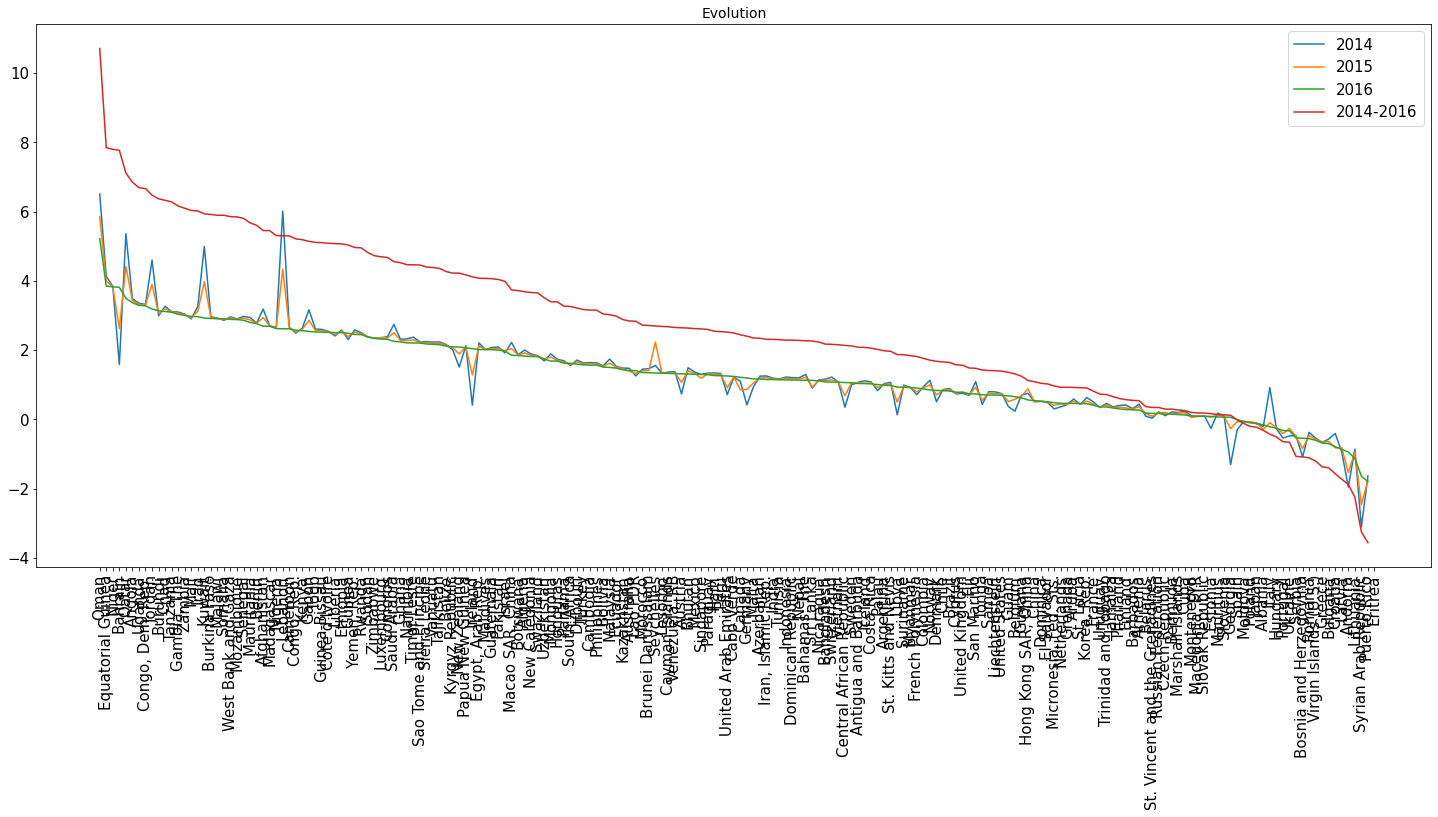

In [73]:
xg1 = Population_growth['2014']
xg2 = Population_growth['2015']
xg3 = Population_growth['2016']
xg4 = Population_growth['2014-2016']
plt.figure(figsize=(25, 10))
plt.plot(xg1)
plt.plot(xg2)
plt.plot(xg3)
plt.plot(xg4)
plt.xticks(rotation=90)
plt.legend(["2014", "2015",'2016','2014-2016'])
plt.title('Evolution',fontsize=14)

In [74]:
Population_growth.count()

2014         195
2015         195
2016         195
2014-2016    195
dtype: int64

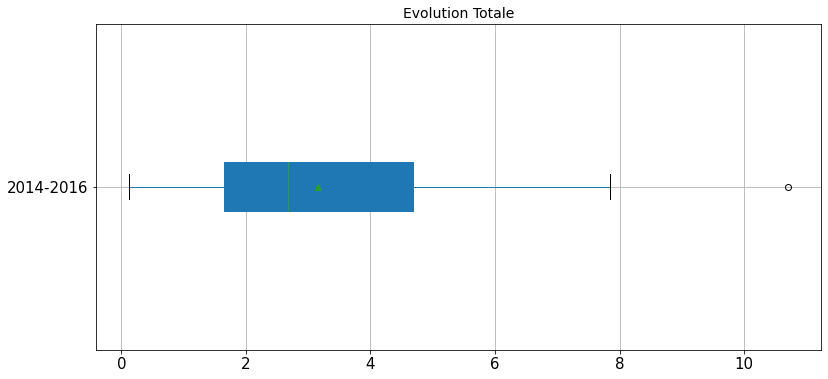

In [75]:
Evo_tot = Population_growth[Population_growth['2014-2016'] > 0] 

plt.figure(figsize=(13,6))
plt.title('Evolution Totale',fontsize=14) 
Evo_tot.boxplot(column="2014-2016", showfliers=True, 
            vert=False, patch_artist=True, showmeans=True)
plt.show()

In [76]:
rows_evo = Evo_tot[Evo_tot['2014-2016'] > Evo_tot['2014-2016'].quantile(.75)] 
rows_tot = len(rows_evo.axes[0])
rows_tot                 

44

In [77]:
Evolution_totale_15 = Population_growth.copy()
Evolution_totale_15 = Evolution_totale_15.iloc[0:15,:]
Evolution_totale_15['score_évolution'] = Evolution_totale_15['2014-2016'].rank(ascending=True)
Evolution_totale_15['score_Evolution_totale_15'] = 1
Evolution_totale_15

2014      2015      2016  2014-2016  score_évolution  score_Evolution_totale_15
Country Name                                                                                          
Oman               6.504660  5.856170  5.217721  10.707687             15.0                          1
Equatorial Guinea  4.128421  3.989139  3.847227   7.842465             14.0                          1
Niger              3.842681  3.835750  3.826066   7.798521             13.0                          1
Bahrain            1.582802  2.618665  3.812797   7.770968             12.0                          1
Qatar              5.361236  4.412616  3.495070   7.112295             11.0                          1
Angola             3.485413  3.428021  3.367572   6.848550             10.0                          1
Uganda             3.350650  3.321556  3.290872   6.690043              9.0                          1
Congo, Dem. Rep.   3.319176  3.300416  3.278534   6.664555              8.0                          1
Jordan             4.597538  3.896131  3.185855   6.473206              7.0                          1
Burundi            2.992265  3.061103  3.135333   6.368969              6.0                          1
Chad               3.264706  3.190940  3.114092   6.325161              5.0                          1
Tanzania           3.107572  3.100829  3.092454   6.280541              4.0                          1
Gambia, The        3.099283  3.067312  3.033580   6.159187              3.0                          1
Zambia             3.040211  3.024123  3.002816   6.095800              2.0                          1
Mali               2.901031  2.933977  2.971969   6.032263              1.0                          1

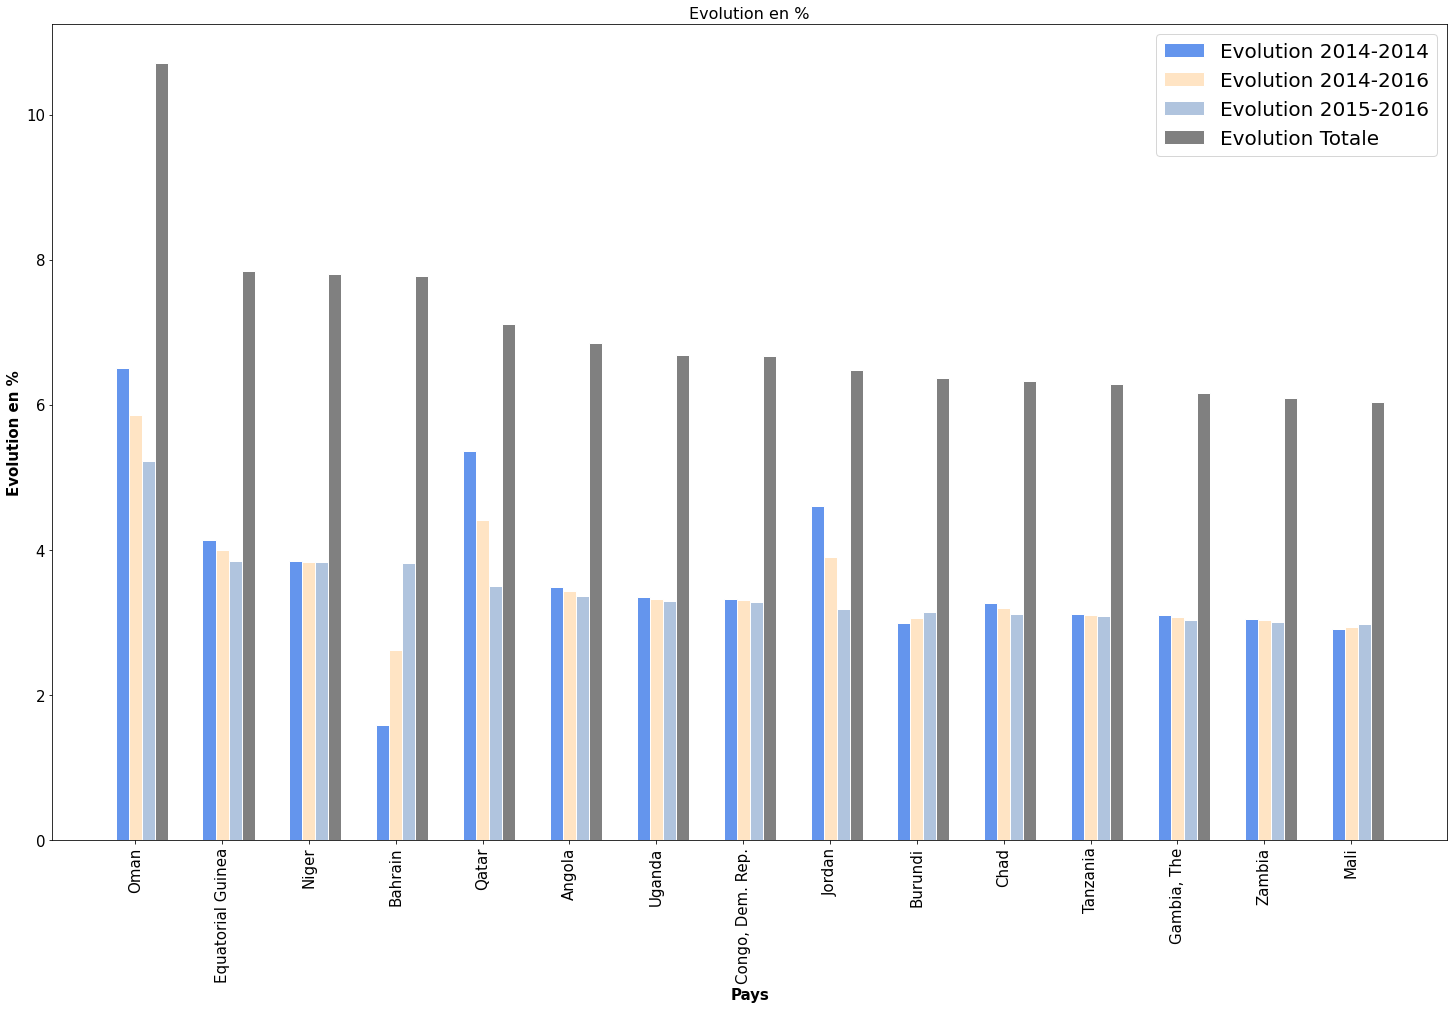

In [78]:
# set width of bars
barWidth = 0.15
 
# set heights of bars
bars1 = Evolution_totale_15['2014']
bars2 = Evolution_totale_15['2015']
bars3 = Evolution_totale_15['2016']
bars4 = Evolution_totale_15['2014-2016']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r1, bars1, color='cornflowerblue', width=barWidth, edgecolor='white', label='Evolution 2014-2014')
plt.bar(r2, bars2, color='bisque', width=barWidth, edgecolor='white', label='Evolution 2014-2016')
plt.bar(r3, bars3, color='lightsteelblue', width=barWidth, edgecolor='white', label='Evolution 2015-2016')
plt.bar(r4, bars4, color='grey', width=barWidth, edgecolor='white', label='Evolution Totale')

 
# Add xticks on the middle of the group bars and labels
plt.xlabel('Pays', fontweight='bold')
plt.ylabel('Evolution en %', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], Evolution_totale_15.index, rotation=90)

# Add a tilte
plt.title('Evolution en %',fontsize=16)
 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()  

In [79]:
# Score total population 

croissance_tot = pd.merge(Evolution_totale_15, Population_totale_15, how='outer', left_index=True, right_index=True)
croissance_tot = pd.merge(croissance_tot, pop_bonus, how='outer', left_index=True, right_index=True)
croissance_tot = croissance_tot.fillna(0)
croissance_tot['Total score population'] = croissance_tot['score_évolution'] + croissance_tot['score_population'] + croissance_tot['score_pop_out']
croissance_tot = croissance_tot[['Total score population']]
croissance_tot = croissance_tot.sort_values(by = 'Total score population', ascending = False)
croissance_tot = croissance_tot.iloc[0:15,:]
croissance_tot


Total score population
Country Name                             
China                                16.0
India                                15.0
Oman                                 15.0
United States                        14.0
Equatorial Guinea                    14.0
Niger                                13.0
Indonesia                            13.0
Bahrain                              12.0
Brazil                               12.0
Qatar                                11.0
Pakistan                             11.0
Angola                               11.0
Nigeria                              10.0
Uganda                               10.0
Congo, Dem. Rep.                      9.0

In [80]:
# 2e indicateur : Enrolment in tertiary education, all programmes, both sexes (number) 

tertiary_education_tot = data_date_ok.loc[data_date_ok["Indicator Name"].isin(['Enrolment in tertiary education, all programmes, both sexes (number)'])]
tertiary_education = tertiary_education_tot.copy()
tertiary_education = tertiary_education.loc[:,[ 'Last value']].sort_values(by = 'Last value', ascending = False)
tertiary_education 


Last value
Country Name                                
China                           4.336739e+07
India                           3.210742e+07
United States                   1.953173e+07
Brazil                          8.285475e+06
Russian Federation              6.592416e+06
Turkey                          6.062886e+06
Indonesia                       5.107999e+06
Iran, Islamic Rep.              4.802721e+06
Japan                           3.862460e+06
Philippines                     3.563396e+06
Mexico                          3.419391e+06
Korea, Rep.                     3.268099e+06
Germany                         2.977781e+06
Argentina                       2.869450e+06
Egypt, Arab Rep.                2.868912e+06
Vietnam                         2.466643e+06
France                          2.388880e+06
United Kingdom                  2.352933e+06
Colombia                        2.293550e+06
Thailand                        2.235450e+06
Venezuela, RB                   2.123041e+06
Bangladesh                      2.068355e+06
Spain                           1.963924e+06
Pakistan                        1.871575e+06
Italy                           1.826477e+06
Ukraine                         1.776190e+06
Poland                          1.762666e+06
Saudi Arabia                    1.527769e+06
Nigeria                         1.513371e+06
Australia                       1.453521e+06
Algeria                         1.289474e+06
Chile                           1.221774e+06
Canada                          1.212161e+06
Peru                            1.150620e+06
South Africa                    1.018543e+06
Morocco                         8.774040e+05
Netherlands                     8.426010e+05
Malaysia                        8.175870e+05
Syrian Arab Republic            7.728770e+05
Ethiopia                        7.571750e+05
Greece                          6.774290e+05
Myanmar                         6.343060e+05
Sudan                           6.323770e+05
Kazakhstan                      6.235340e+05
Ecuador                         5.861050e+05
Romania                         5.416530e+05
Belgium                         5.047450e+05
Dominican Republic              4.801030e+05
Belarus                         4.772210e+05
Nepal                           4.453240e+05
Congo, Dem. Rep.                4.429790e+05
Sweden                          4.285570e+05
Austria                         4.259717e+05
Iraq                            4.249080e+05
Ghana                           4.175340e+05
Czech Republic                  3.955290e+05
Cameroon                        3.899740e+05
Libya                           3.750280e+05
Israel                          3.740480e+05
Guatemala                       3.666740e+05
Bolivia                         3.525540e+05
Portugal                        3.375070e+05
Tunisia                         3.226250e+05
Denmark                         3.137560e+05
Jordan                          3.127500e+05
Sri Lanka                       3.080000e+05
Hungary                         3.077290e+05
Finland                         3.024780e+05
Hong Kong SAR, China            2.986427e+05
Switzerland                     2.944500e+05
Bulgaria                        2.789530e+05
New Zealand                     2.700742e+05
Norway                          2.682310e+05
Yemen, Rep.                     2.674980e+05
Uzbekistan                      2.656790e+05
Kyrgyz Republic                 2.653820e+05
Afghanistan                     2.628740e+05
Cuba                            2.614130e+05
Singapore                       2.553480e+05
Tajikistan                      2.470920e+05
Puerto Rico                     2.411680e+05
Serbia                          2.410540e+05
Paraguay                        2.252110e+05
Angola                          2.210370e+05
West Bank and Gaza              2.210180e+05
Costa Rica                      2.178410e+05
Cambodia                        2.173640e+05
Lebanon                      

Text(0.5, 1.0, 'Tertiary_education')

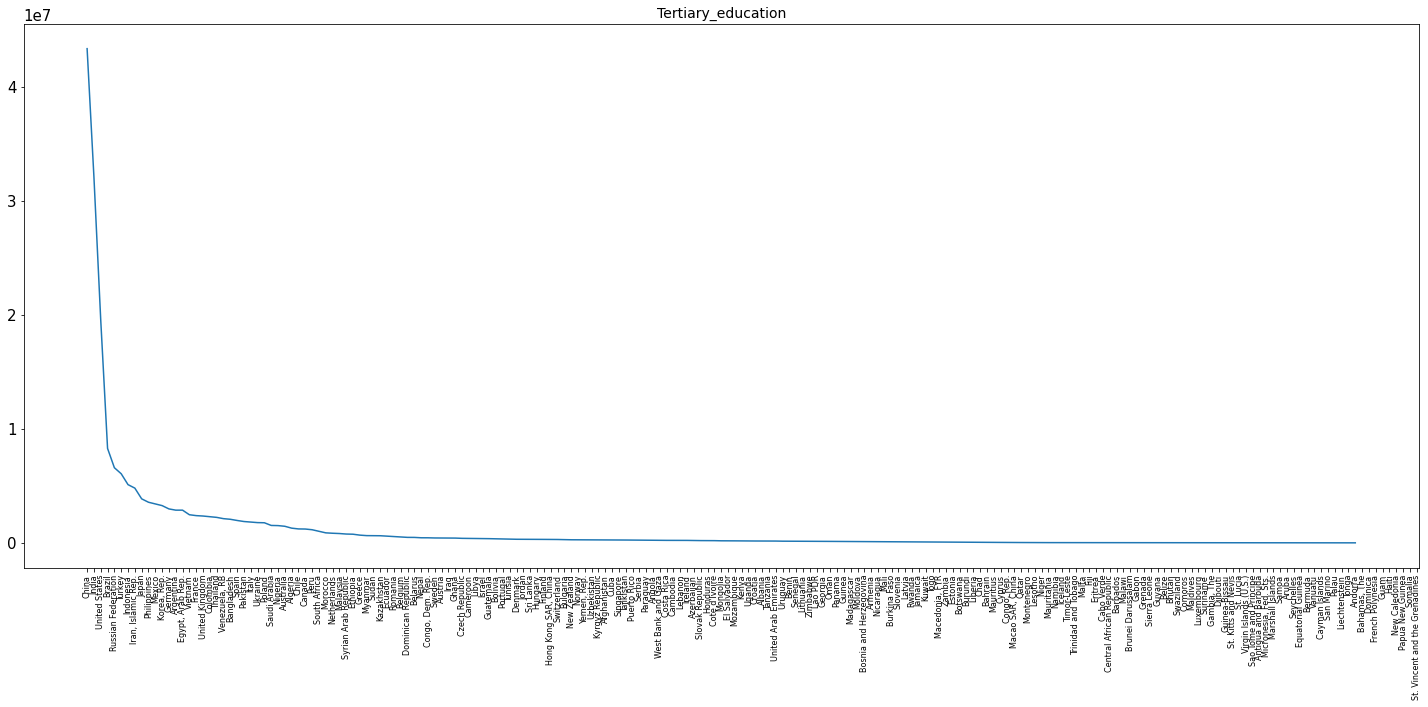

In [81]:
plt.figure(figsize=(25, 10))
plt.plot(tertiary_education)
plt.xticks(fontsize=8, rotation=90)
plt.title('Tertiary_education',fontsize=14)

In [82]:
tertiary_education_15 = tertiary_education.copy()
tertiary_education_15 = tertiary_education_15.iloc[0:15,:]
tertiary_education_15['score_tertiary'] = tertiary_education_15['Last value'].rank(ascending=True)
tertiary_education_15['tertiary_education_15'] = 2
tertiary_education_15['tertiary_education_15xscore'] = tertiary_education_15['score_tertiary']*2
tertiary_education_15

Last value  score_tertiary  tertiary_education_15  tertiary_education_15xscore
Country Name                                                                                      
China               43367392.0            15.0                      2                         30.0
India               32107420.0            14.0                      2                         28.0
United States       19531728.0            13.0                      2                         26.0
Brazil               8285475.0            12.0                      2                         24.0
Russian Federation   6592416.0            11.0                      2                         22.0
Turkey               6062886.0            10.0                      2                         20.0
Indonesia            5107999.0             9.0                      2                         18.0
Iran, Islamic Rep.   4802721.0             8.0                      2                         16.0
Japan                3862460.0             7.0                      2                         14.0
Philippines          3563396.0             6.0                      2                         12.0
Mexico               3419391.0             5.0                      2                         10.0
Korea, Rep.          3268099.0             4.0                      2                          8.0
Germany              2977781.0             3.0                      2                          6.0
Argentina            2869450.0             2.0                      2                          4.0
Egypt, Arab Rep.     2868912.0             1.0                      2                          2.0

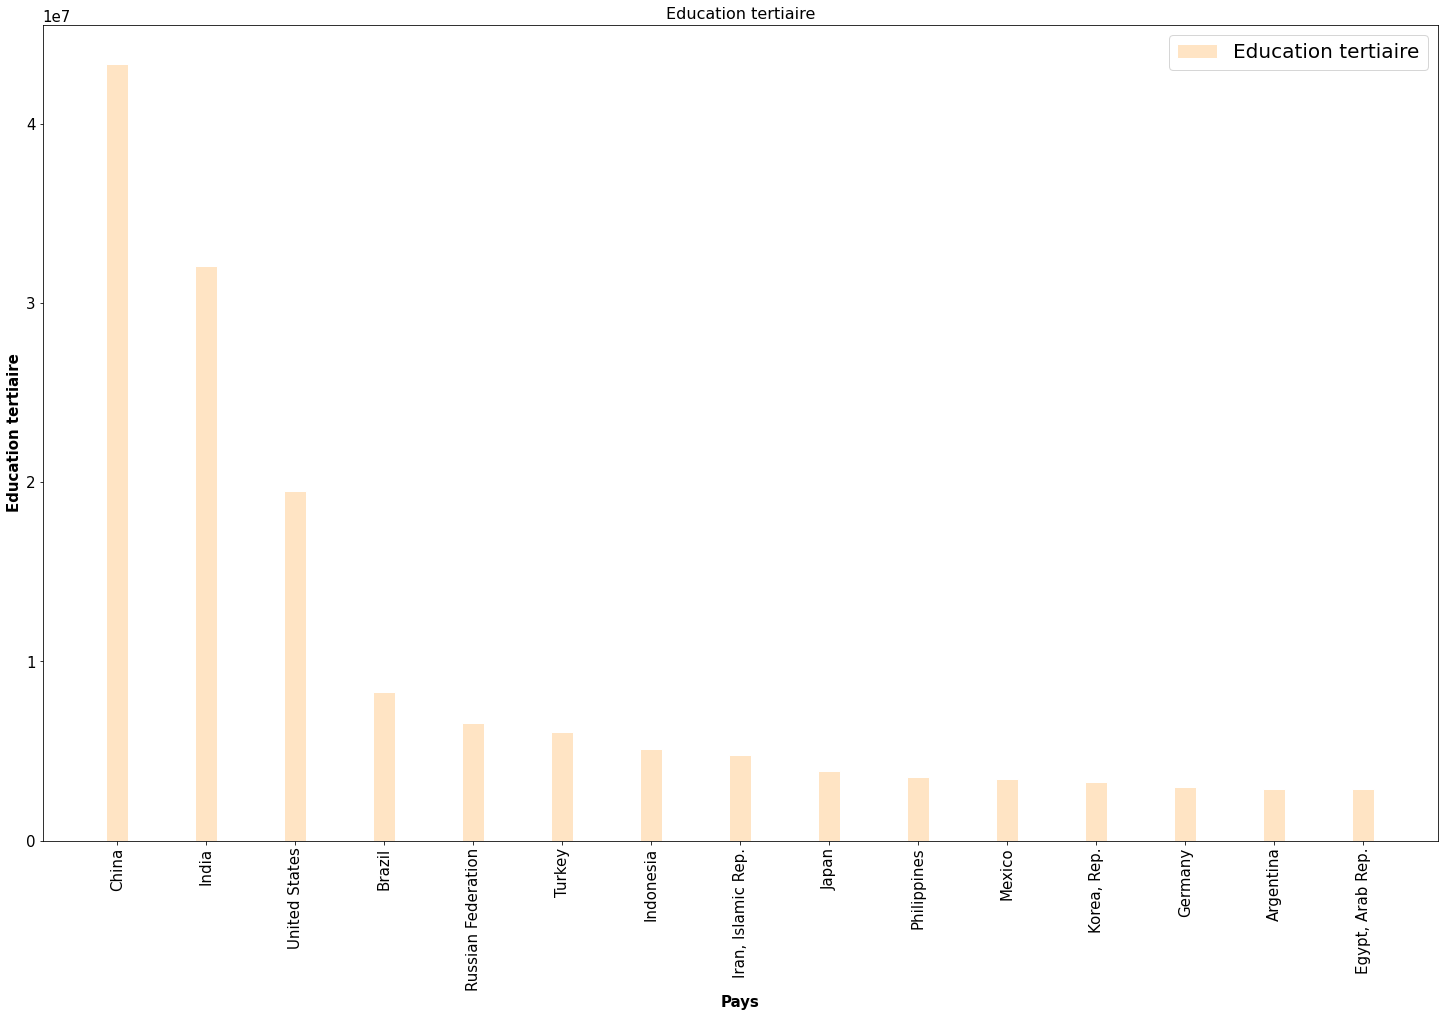

In [83]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = tertiary_education_15['Last value']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r2, bars1, color='bisque', width=barWidth, edgecolor='white', label='Education tertiaire')
 
# Add xticks on the middle of the group bars
plt.xlabel('Pays', fontweight='bold')
plt.ylabel('Education tertiaire', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], tertiary_education_15.index, rotation=90)

# Add a tilte
plt.title('Education tertiaire',fontsize=16)

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()  

In [84]:
# Evolution 

tertiary_education_evol = tertiary_education_tot.loc[:,['Evolution 2014-2015','Evolution 2015-2016','Evolution Totale']].sort_values(by = 'Evolution Totale', ascending = False)
tertiary_education_evol


Evolution 2014-2015  Evolution 2015-2016  Evolution Totale
Country Name                                                                              
Tajikistan                                 7.455180             9.933975         18.129751
Rwanda                                     3.642017             2.051410          5.768139
Uzbekistan                                 0.735257             1.261968          2.006504
Botswana                                   9.895153           -14.872159         -6.448629
Kazakhstan                                -9.484177            -5.297435        -14.279194
Afghanistan                                     NaN                  NaN               NaN
Albania                                   -7.647035                  NaN               NaN
Algeria                                    3.532459                  NaN               NaN
Andorra                                    0.602410                  NaN               NaN
Angola                                          NaN                  NaN               NaN
Antigua and Barbuda                             NaN                  NaN               NaN
Argentina                                       NaN                  NaN               NaN
Armenia                                   -4.797064                  NaN               NaN
Aruba                                     -5.587045                  NaN               NaN
Australia                                       NaN                  NaN               NaN
Austria                                    1.126922                  NaN               NaN
Azerbaijan                                 4.478483                  NaN               NaN
Bahamas, The                                    NaN                  NaN               NaN
Bahrain                                    2.067536                  NaN               NaN
Bangladesh                                      NaN                  NaN               NaN
Barbados                                        NaN                  NaN               NaN
Belarus                                   -7.797279                  NaN               NaN
Belgium                                    1.781573                  NaN               NaN
Belize                                          NaN                  NaN               NaN
Benin                                           NaN                  NaN               NaN
Bermuda                                  -12.184116                  NaN               NaN
Bhutan                                          NaN                  NaN               NaN
Bolivia                                         NaN                  NaN               NaN
Bosnia and Herzegovina                    -3.121372                  NaN               NaN
Brazil                                     2.642779                  NaN               NaN
Brunei Darussalam                         -3.772582                  NaN               NaN
Bulgaria                                  -1.532330                  NaN               NaN
Burkina Faso                                    NaN                  NaN               NaN
Burundi                                         NaN                  NaN               NaN
Cabo Verde                                -6.411883                  NaN               NaN
Cambodia                                        NaN                  NaN               NaN
Cameroon                                  11.498874                  NaN               NaN
Canada                                          NaN                  NaN               NaN
Cayman Islands                                  NaN                  NaN               NaN
Central African Republic                        NaN                  NaN               NaN
Chad                                            NaN                  NaN               NaN
Chile                                      1.376722                  NaN               NaN
China                       

In [85]:
tertiary_education_evol.count()

Evolution 2014-2015    96
Evolution 2015-2016     6
Evolution Totale        5
dtype: int64

In [86]:
tertiary_education_evol = tertiary_education_evol.loc[:,[ 'Evolution 2014-2015']].sort_values(by = 'Evolution 2014-2015', ascending = False)
tertiary_education_evol = tertiary_education_evol.iloc[0:15,:]
tertiary_education_evol['Evolution 2014-2015_15'] = tertiary_education_evol['Evolution 2014-2015'].rank(ascending=True)
tertiary_education_evol


Evolution 2014-2015  Evolution 2014-2015_15
Country Name                                                      
Seychelles                      116.527197                    15.0
Sao Tome and Principe            39.047619                    14.0
Egypt, Arab Rep.                 12.766955                    13.0
Cameroon                         11.498874                    12.0
Morocco                          11.147228                    11.0
Mozambique                       11.034040                    10.0
Turkey                           10.787807                     9.0
Cyprus                           10.370018                     8.0
Qatar                            10.338547                     7.0
Botswana                          9.895153                     6.0
United Arab Emirates              9.473647                     5.0
Cote d'Ivoire                     9.169764                     4.0
Tajikistan                        7.455180                     3.0
Oman                              7.310290                     2.0
Togo                              6.958286                     1.0

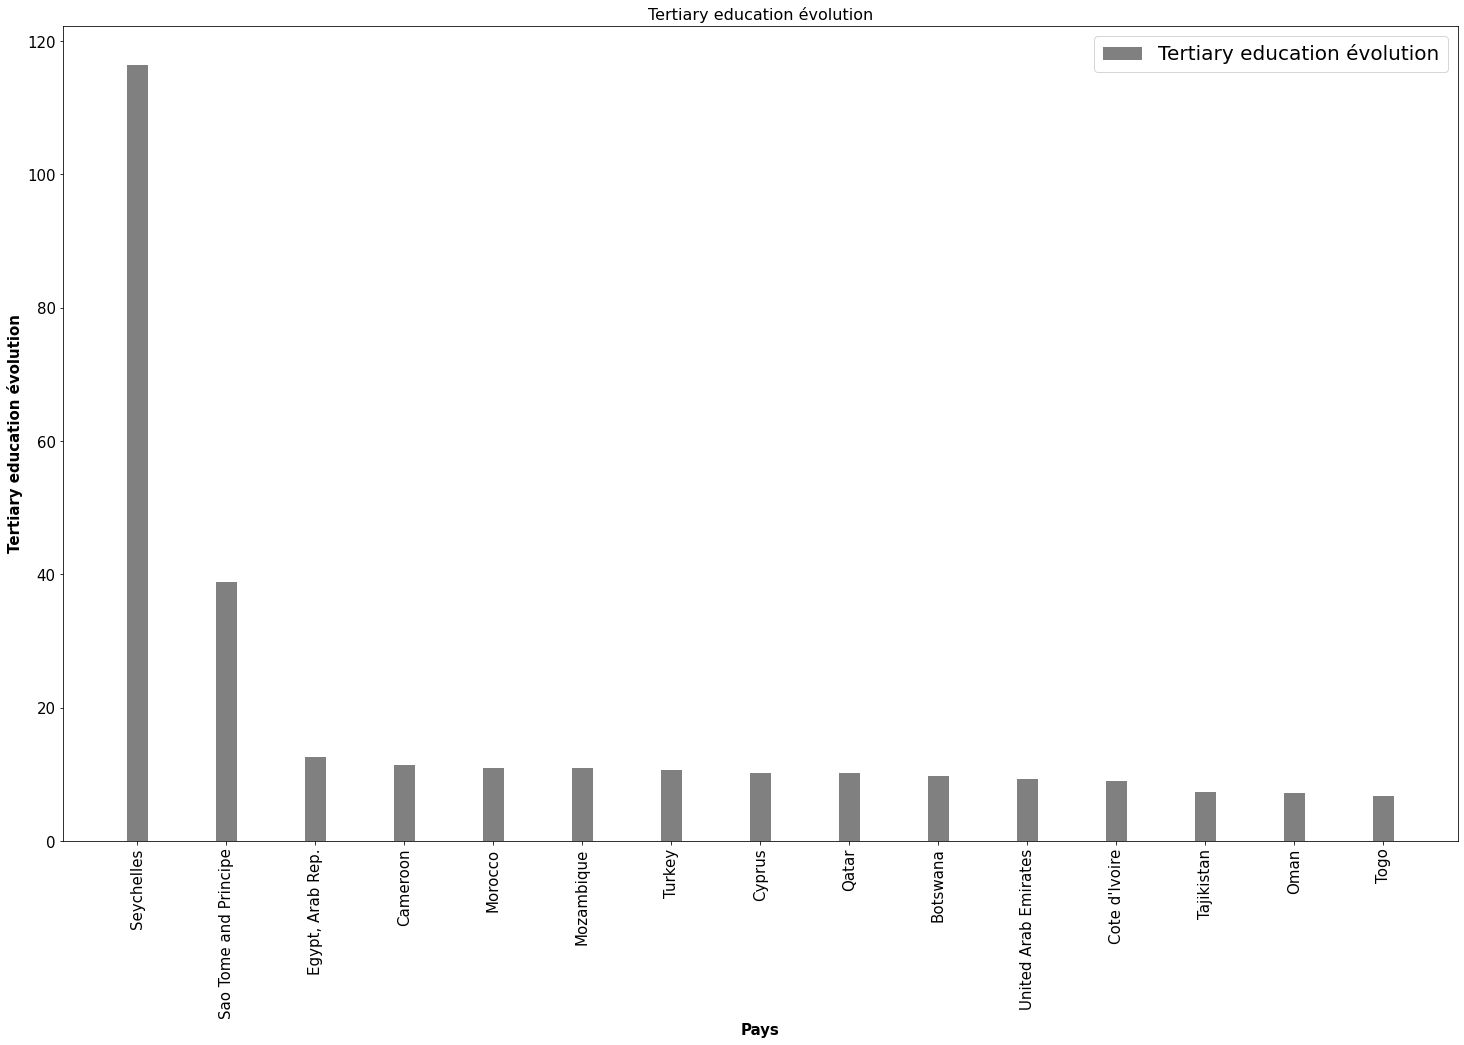

In [87]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = tertiary_education_evol['Evolution 2014-2015']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r2, bars1, color='grey', width=barWidth, edgecolor='white', label='Tertiary education évolution')
 
# Add xticks on the middle of the group bars
plt.xlabel('Pays', fontweight='bold')
plt.ylabel('Tertiary education évolution', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], tertiary_education_evol.index, rotation=90)

# Add a tilte
plt.title('Tertiary education évolution',fontsize=16)

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()

In [88]:
# 3e indicateur : Internet users (per 100 people)

Internet_users_tot = data_date_ok.loc[data_date_ok["Indicator Name"].isin(['Internet users (per 100 people)'])]
Internet_users = Internet_users_tot.copy()
Internet_users = Internet_users.loc[:,[ 'Last value']].sort_values(by = 'Last value', ascending = False)
Internet_users 

Last value
Country Name                              
Iceland                          98.240016
Liechtenstein                    98.093904
Bermuda                          98.000000
Bahrain                          97.999981
Andorra                          97.930637
Luxembourg                       97.493930
Norway                           97.298204
Denmark                          96.967785
United Kingdom                   94.775801
Qatar                            94.291118
Aruba                            93.542454
Korea, Rep.                      92.716545
Japan                            92.000000
Sweden                           91.506828
United Arab Emirates             90.600007
Netherlands                      90.410959
Canada                           89.840000
Germany                          89.647101
Switzerland                      89.405568
New Zealand                      88.470186
Australia                        88.238658
Finland                          87.703650
Hong Kong SAR, China             87.300343
Estonia                          87.237332
Belgium                          86.516500
France                           85.622200
Austria                          84.323331
Ireland                          82.169700
Macao SAR, China                 81.642985
Singapore                        81.000000
Spain                            80.561333
Slovak Republic                  80.475900
Puerto Rico                      80.320000
Bahamas, The                     80.000000
Latvia                           79.889371
Israel                           79.778791
Barbados                         79.549398
Hungary                          79.259401
Cayman Islands                   79.000000
Malaysia                         78.788310
Kuwait                           78.367384
Azerbaijan                       78.200000
Malta                            77.289395
Guam                             77.010000
St. Kitts and Nevis              76.817675
Kazakhstan                       76.800000
Czech Republic                   76.481201
Russian Federation               76.409085
United States                    76.176737
Lebanon                          76.110000
Cyprus                           75.900360
Slovenia                         75.498504
Brunei Darussalam                75.000000
Lithuania                        74.376646
New Caledonia                    74.001753
Saudi Arabia                     73.750904
Poland                           73.300700
Trinidad and Tobago              73.296941
Antigua and Barbuda              73.000000
Croatia                          72.697306
Macedonia, FYR                   72.156814
Belarus                          71.113046
Moldova                          70.999999
Portugal                         70.423567
Argentina                        70.150764
Montenegro                       69.881647
Oman                             69.815213
Bosnia and Herzegovina           69.331006
Greece                           69.087915
French Polynesia                 68.440419
Serbia                           67.056841
Dominica                         67.030000
Uruguay                          66.400000
Albania                          66.363445
Costa Rica                       66.028713
Chile                            66.010000
Jordan                           62.302193
Armenia                          62.000000
Dominican Republic               61.328190
Italy                            61.324253
West Bank and Gaza               61.178385
Venezuela, RB                    60.000000
Bulgaria                         59.825548
Brazil                           59.682747
Virgin Islands (U.S.)            59.608316
Mexico                           59.540446
Romania                          59.503951
Maldives                         59.092590
Turkey                           58.347734
Morocco                          58.271236
Colombia                         58.136494
Seychelles                       

Text(0.5, 1.0, 'Internet users')

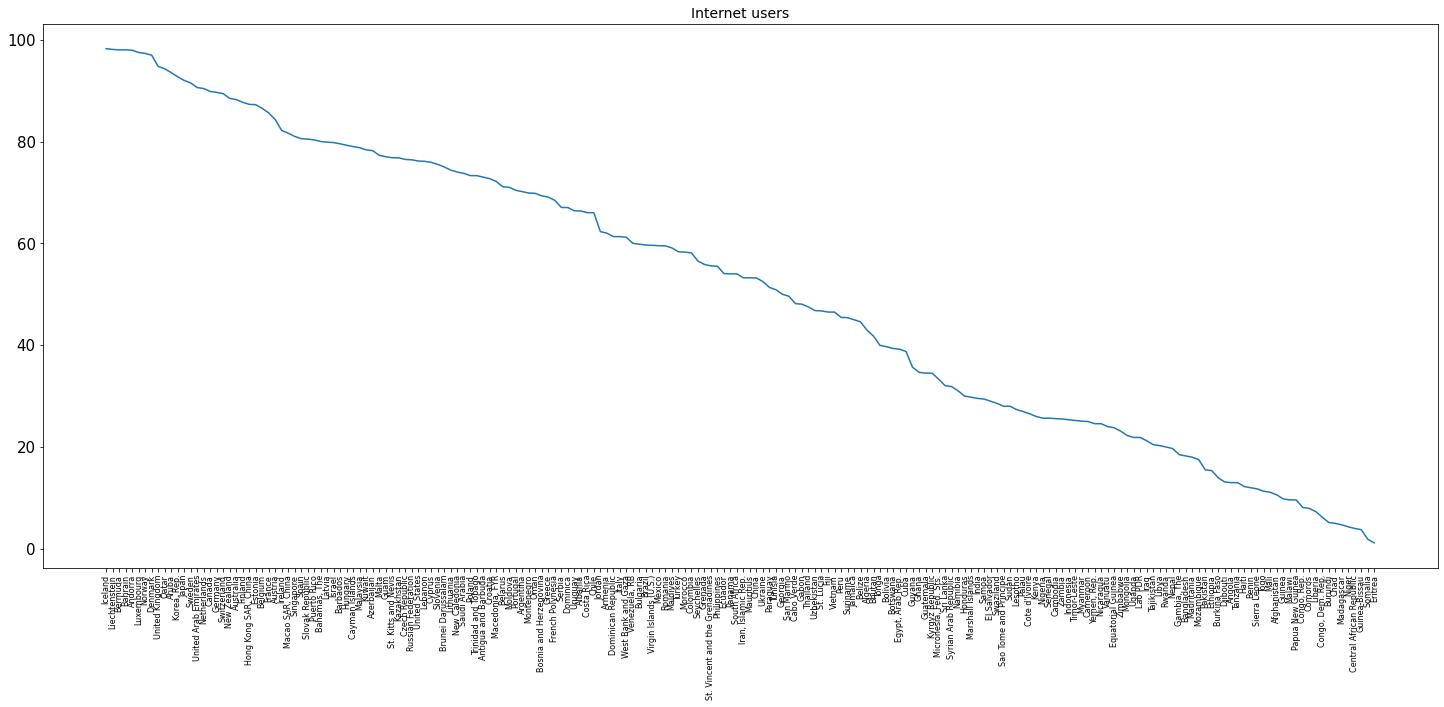

In [89]:
plt.figure(figsize=(25, 10))
plt.plot(Internet_users)
plt.xticks(fontsize=8, rotation=90)
plt.title('Internet users',fontsize=14)

In [90]:
Internet_users_15 = Internet_users.copy()
Internet_users_15 = Internet_users_15.iloc[0:15,:]
Internet_users_15['score_internet'] = Internet_users_15['Last value'].rank(ascending=True)
Internet_users_15['Internet_users_15'] = 3
Internet_users_15['Internet_users_15xscore'] = Internet_users_15['Internet_users_15']*Internet_users_15['score_internet']
Internet_users_15


Last value  score_internet  Internet_users_15  Internet_users_15xscore
Country Name                                                                                
Iceland                98.240016            15.0                  3                     45.0
Liechtenstein          98.093904            14.0                  3                     42.0
Bermuda                98.000000            13.0                  3                     39.0
Bahrain                97.999981            12.0                  3                     36.0
Andorra                97.930637            11.0                  3                     33.0
Luxembourg             97.493930            10.0                  3                     30.0
Norway                 97.298204             9.0                  3                     27.0
Denmark                96.967785             8.0                  3                     24.0
United Kingdom         94.775801             7.0                  3                     21.0
Qatar                  94.291118             6.0                  3                     18.0
Aruba                  93.542454             5.0                  3                     15.0
Korea, Rep.            92.716545             4.0                  3                     12.0
Japan                  92.000000             3.0                  3                      9.0
Sweden                 91.506828             2.0                  3                      6.0
United Arab Emirates   90.600007             1.0                  3                      3.0

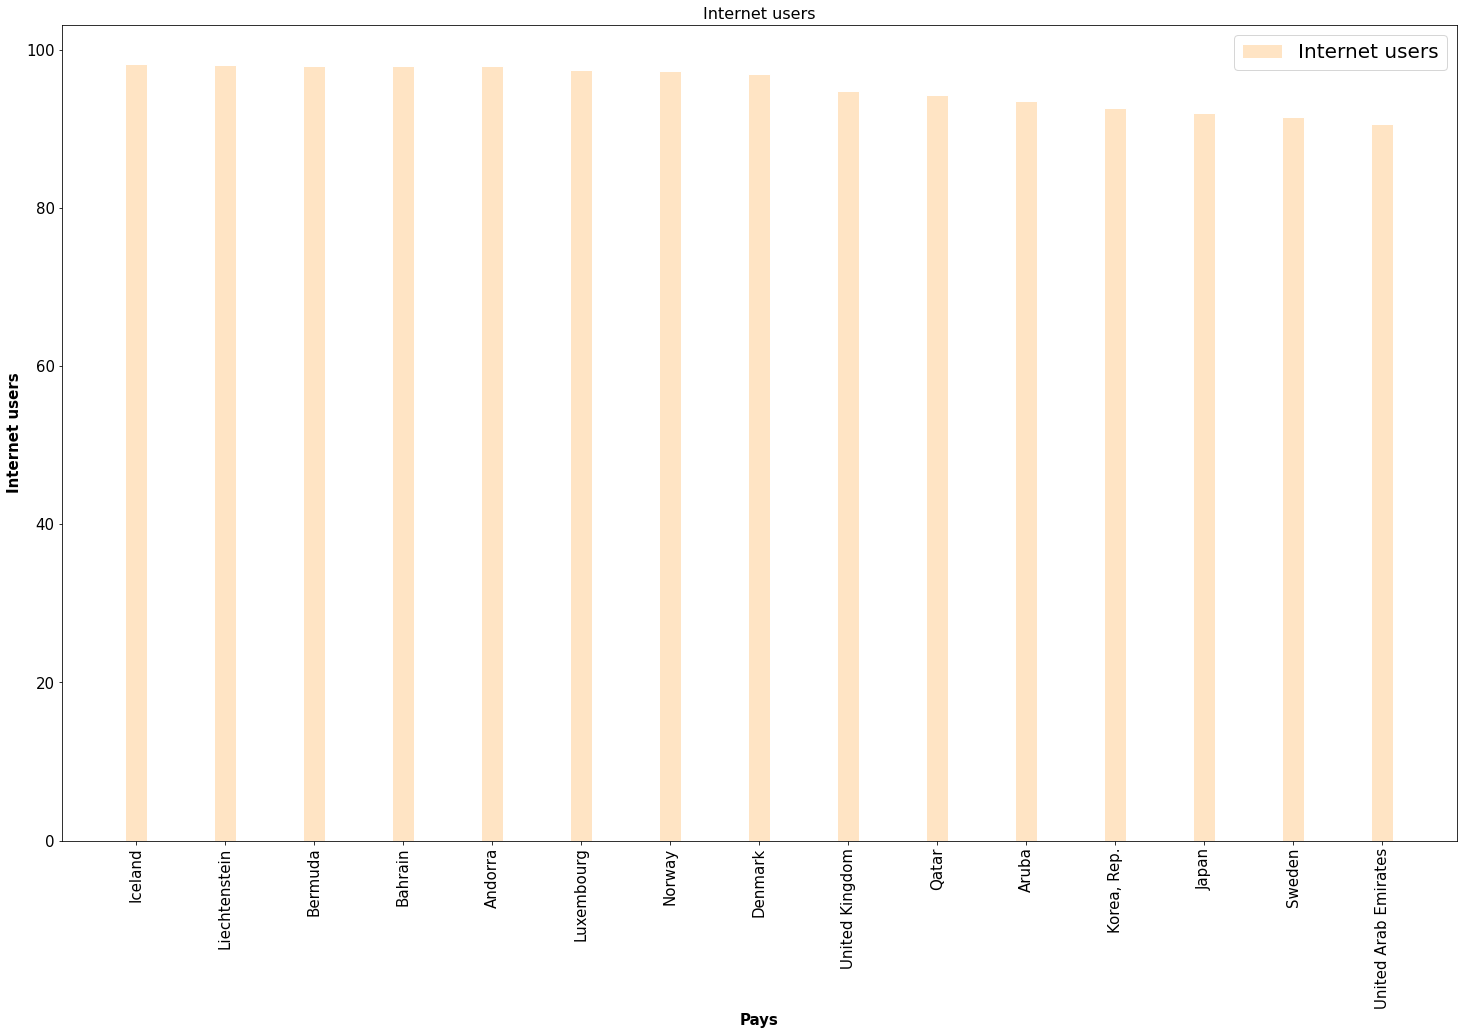

In [91]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = Internet_users_15['Last value']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r2, bars1, color='bisque', width=barWidth, edgecolor='white', label='Internet users')
 
# Add xticks on the middle of the group bars
plt.xlabel('Pays', fontweight='bold')
plt.ylabel('Internet users', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], Internet_users_15.index, rotation=90)

# Add a tilte
plt.title('Internet users',fontsize=16)

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()  

In [92]:
# Evolution 

Internet_users_evol = Internet_users_tot.loc[:,['Evolution 2014-2015','Evolution 2015-2016','Evolution Totale']].sort_values(by = 'Evolution Totale', ascending = False)
Internet_users_evol


Evolution 2014-2015  Evolution 2015-2016  Evolution Totale
Country Name                                                                              
Burundi                                  252.624961             6.317060        274.900491
Niger                                     26.985640            74.570841        121.679899
Myanmar                                   88.592309            15.407787        117.650210
Namibia                                   73.098732            20.809424        109.119582
Congo, Dem. Rep.                          26.666650            63.420391        106.999135
Benin                                     87.583132             6.566511         99.900799
Ethiopia                                  50.649351            32.473482         99.570440
Togo                                      24.912281            58.848315         98.421053
Sierra Leone                               4.740110            85.567497         94.363600
Mozambique                                83.336462             3.470664         89.699456
Rwanda                                    69.811321            11.111111         88.679245
Tanzania                                  42.857143            30.000000         85.714286
Cambodia                                  35.714286            34.582562         82.647763
Marshall Islands                          14.776439            54.481365         77.308210
Chad                                      20.689655            42.857143         72.413793
Mauritania                                42.047913            18.427857         68.224299
Malawi                                    59.487965             3.397977         64.907329
Iraq                                      30.355791            23.286876         60.711582
Mali                                      47.571429             7.571989         58.745521
Kenya                                     27.272727            23.809524         57.575758
Honduras                                  44.757934             8.617676         57.232704
Cameroon                                  27.538147            20.888885         54.179445
Lao PDR                                   27.629734            20.164835         53.366059
Guinea                                    28.125000            19.512195         53.125000
Moldova                                   35.851127            12.152557         52.360513
Afghanistan                               18.000000            28.277560         51.367520
Burkina Faso                              21.145172            22.588986         48.510638
Indonesia                                 28.215097            15.426931         47.994753
Papua New Guinea                          21.538462            21.538462         47.715976
Guatemala                                 23.102314            19.799334         47.475753
Algeria                                   29.491525            12.422845         45.578057
Senegal                                   22.543865            18.323907         44.998689
Timor-Leste                               31.428571             9.766303         44.264283
Zimbabwe                                  38.974516             1.658418         41.279294
India                                     23.809524            13.642934         40.700776
Nicaragua                                 11.956202            24.702956         39.612693
Samoa                                     19.844386            15.762266         38.734576
Bhutan                                    31.353135             4.956393         37.863513
Cote d'Ivoire                             13.546474            21.210752         37.630535
Thailand                                  12.685947            20.828193         36.156393
Ghana                                     23.239188            10.233285         35.850605
Liberia                                    9.128791            23.971385         35.288473
Iran, Islamic Rep.          

In [93]:
Internet_users_evol.count()

Evolution 2014-2015    194
Evolution 2015-2016    193
Evolution Totale       193
dtype: int64

In [94]:
Internet_users_evol = Internet_users_evol.loc[:,[ 'Evolution Totale']].sort_values(by = 'Evolution Totale', ascending = False)
Internet_users_evol = Internet_users_evol.iloc[0:15,:]
Internet_users_evol['Evolution Totale_15'] = Internet_users_evol['Evolution Totale'].rank(ascending=True)
Internet_users_evol


Evolution Totale  Evolution Totale_15
Country Name                                           
Burundi                 274.900491                 15.0
Niger                   121.679899                 14.0
Myanmar                 117.650210                 13.0
Namibia                 109.119582                 12.0
Congo, Dem. Rep.        106.999135                 11.0
Benin                    99.900799                 10.0
Ethiopia                 99.570440                  9.0
Togo                     98.421053                  8.0
Sierra Leone             94.363600                  7.0
Mozambique               89.699456                  6.0
Rwanda                   88.679245                  5.0
Tanzania                 85.714286                  4.0
Cambodia                 82.647763                  3.0
Marshall Islands         77.308210                  2.0
Chad                     72.413793                  1.0

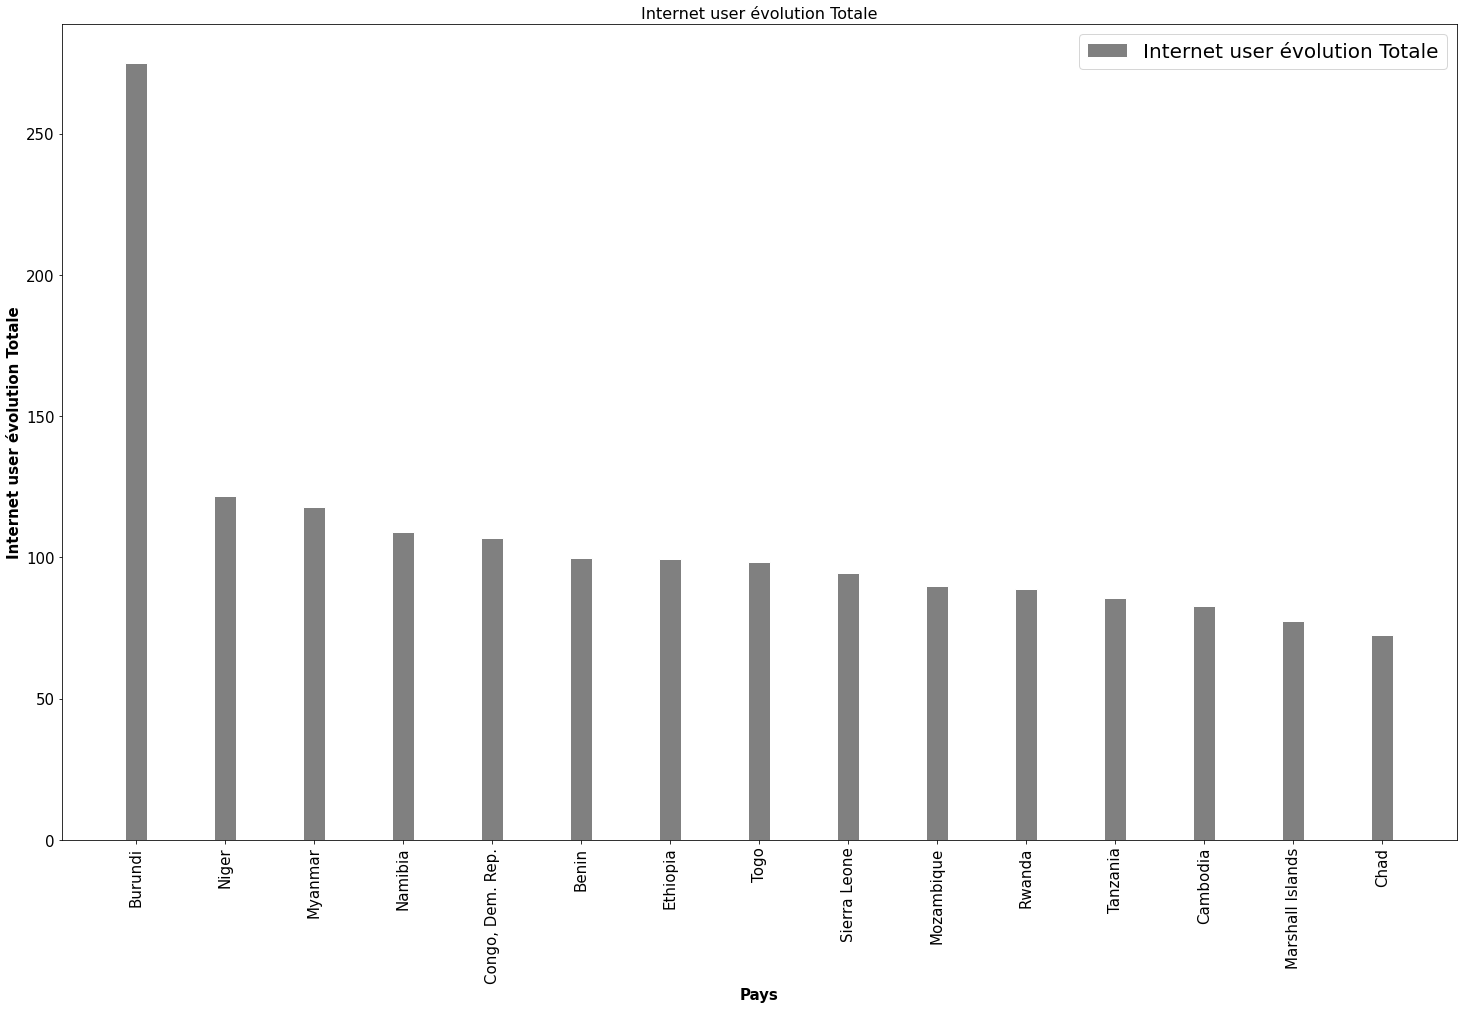

In [95]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = Internet_users_evol['Evolution Totale']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r2, bars1, color='grey', width=barWidth, edgecolor='white', label='Internet user évolution Totale')
 
# Add xticks on the middle of the group bars
plt.xlabel('Pays', fontweight='bold')
plt.ylabel('Internet user évolution Totale', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], Internet_users_evol.index, rotation=90)

# Add a tilte
plt.title('Internet user évolution Totale',fontsize=16)

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()

In [96]:
# 4e indicateur : Enrolment in secondary general, both sexes (number)

secondary_education_tot = data_date_ok.loc[data_date_ok["Indicator Name"].isin(['Enrolment in secondary general, both sexes (number)'])]
secondary_education = secondary_education_tot.copy()
secondary_education = secondary_education.loc[:,[ 'Last value']].sort_values(by = 'Last value', ascending = False)
secondary_education 


Last value
Country Name                                
India                           1.277872e+08
China                           6.857188e+07
United States                   2.422978e+07
Brazil                          2.260792e+07
Indonesia                       1.954507e+07
Bangladesh                      1.396469e+07
Nigeria                         1.253275e+07
Pakistan                        1.174836e+07
Mexico                          1.012012e+07
Turkey                          8.181061e+06
Russian Federation              7.866270e+06
Vietnam                         7.537413e+06
Philippines                     7.220389e+06
Egypt, Arab Rep.                6.481368e+06
Japan                           6.390880e+06
Thailand                        6.072263e+06
Germany                         5.791964e+06
Iran, Islamic Rep.              4.880395e+06
South Africa                    4.858085e+06
France                          4.838587e+06
Kenya                           4.727245e+06
Ethiopia                        4.676544e+06
United Kingdom                  4.471248e+06
Argentina                       4.450741e+06
Colombia                        4.439132e+06
Algeria                         4.131265e+06
Saudi Arabia                    3.605803e+06
Congo, Dem. Rep.                3.566871e+06
Nepal                           3.252523e+06
Myanmar                         3.191268e+06
Korea, Rep.                     3.076303e+06
Italy                           3.025324e+06
Spain                           2.703584e+06
Afghanistan                     2.671830e+06
Malaysia                        2.657307e+06
Peru                            2.644115e+06
Canada                          2.578028e+06
Morocco                         2.547399e+06
Uzbekistan                      2.513841e+06
Sri Lanka                       2.480226e+06
Ghana                           2.458694e+06
Venezuela, RB                   2.400654e+06
Ukraine                         2.177134e+06
Iraq                            1.966640e+06
Poland                          1.896769e+06
Sudan                           1.844641e+06
Tanzania                        1.774383e+06
Syrian Arab Republic            1.768571e+06
Yemen, Rep.                     1.756444e+06
Australia                       1.653634e+06
Cameroon                        1.648060e+06
Ecuador                         1.637495e+06
Kazakhstan                      1.525811e+06
Madagascar                      1.507452e+06
Cote d'Ivoire                   1.478964e+06
Uganda                          1.284008e+06
Chile                           1.234791e+06
Romania                         1.125240e+06
Senegal                         1.082127e+06
Tajikistan                      1.062292e+06
Malawi                          1.037871e+06
Mozambique                      1.020695e+06
Netherlands                     1.016251e+06
Zimbabwe                        9.574610e+05
Tunisia                         9.459460e+05
Benin                           9.416890e+05
Burkina Faso                    9.355610e+05
Guatemala                       9.234410e+05
Dominican Republic              8.832700e+05
Cambodia                        8.394910e+05
Mali                            8.226790e+05
Azerbaijan                      7.605260e+05
Zambia                          7.431750e+05
Jordan                          7.208770e+05
Hungary                         7.208580e+05
West Bank and Gaza              7.185630e+05
Guinea                          6.893890e+05
Belgium                         6.681790e+05
Sweden                          6.460230e+05
Lao PDR                         6.306760e+05
Cuba                            6.305150e+05
Israel                          6.294280e+05
Libya                           6.199400e+05
Burundi                         6.159460e+05
Kyrgyz Republic                 5.835530e+05
Togo                            5.789290e+05
Belarus                         5.590670e+05
Portugal                     

Text(0.5, 1.0, 'secondary education')

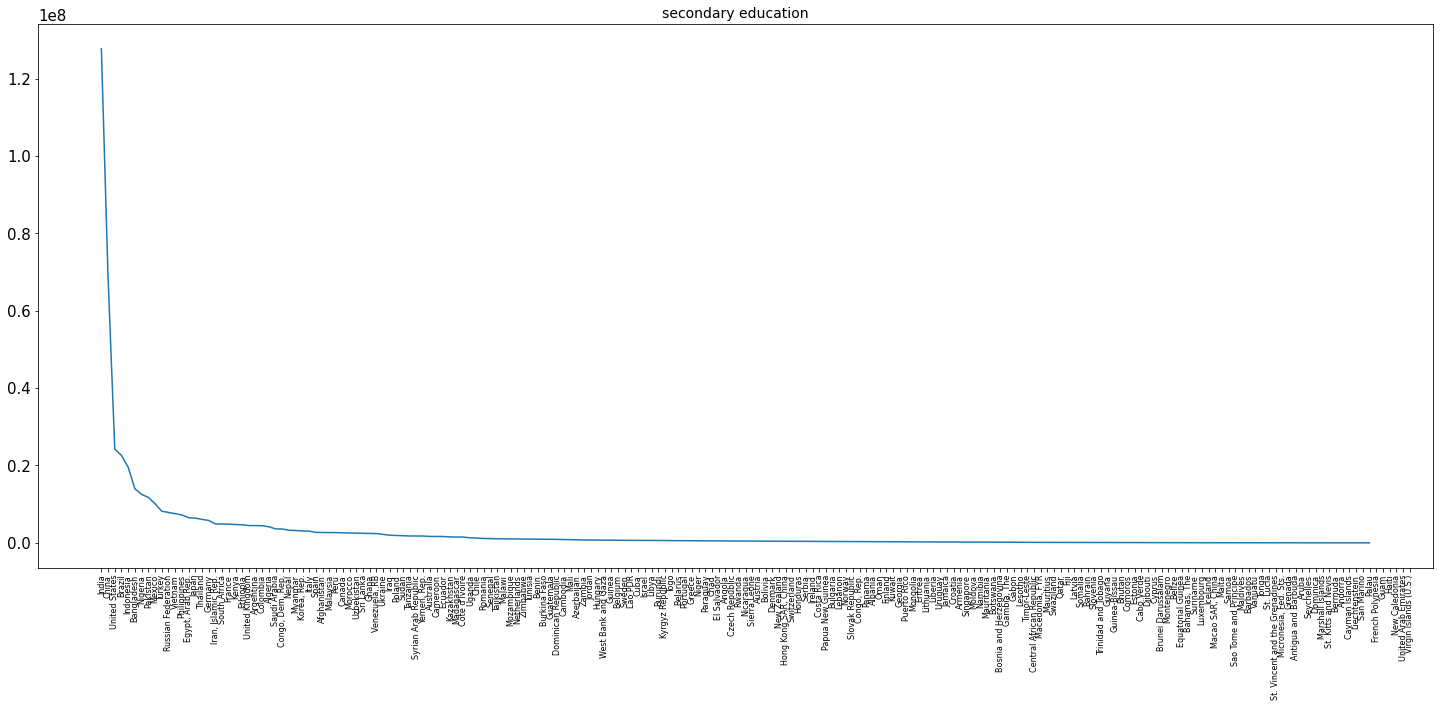

In [97]:
plt.figure(figsize=(25, 10))
plt.plot(secondary_education)
plt.xticks(fontsize=8, rotation=90)
plt.title('secondary education',fontsize=14)

In [98]:
secondary_education_15 = secondary_education.copy()
secondary_education_15 = secondary_education_15.iloc[0:15,:]
secondary_education_15['score_secondary'] = secondary_education_15['Last value'].rank(ascending=True)
secondary_education_15['secondary_education_15'] = 4
secondary_education_15['secondary_education_15xscore'] = secondary_education_15['secondary_education_15'] * secondary_education_15['score_secondary']
secondary_education_15


Last value  score_secondary  secondary_education_15  secondary_education_15xscore
Country Name                                                                                          
India               127787176.0             15.0                       4                          60.0
China                68571880.0             14.0                       4                          56.0
United States        24229776.0             13.0                       4                          52.0
Brazil               22607924.0             12.0                       4                          48.0
Indonesia            19545072.0             11.0                       4                          44.0
Bangladesh           13964691.0             10.0                       4                          40.0
Nigeria              12532753.0              9.0                       4                          36.0
Pakistan             11748355.0              8.0                       4                          32.0
Mexico               10120115.0              7.0                       4                          28.0
Turkey                8181061.0              6.0                       4                          24.0
Russian Federation    7866270.0              5.0                       4                          20.0
Vietnam               7537413.0              4.0                       4                          16.0
Philippines           7220389.0              3.0                       4                          12.0
Egypt, Arab Rep.      6481368.0              2.0                       4                           8.0
Japan                 6390880.0              1.0                       4                           4.0

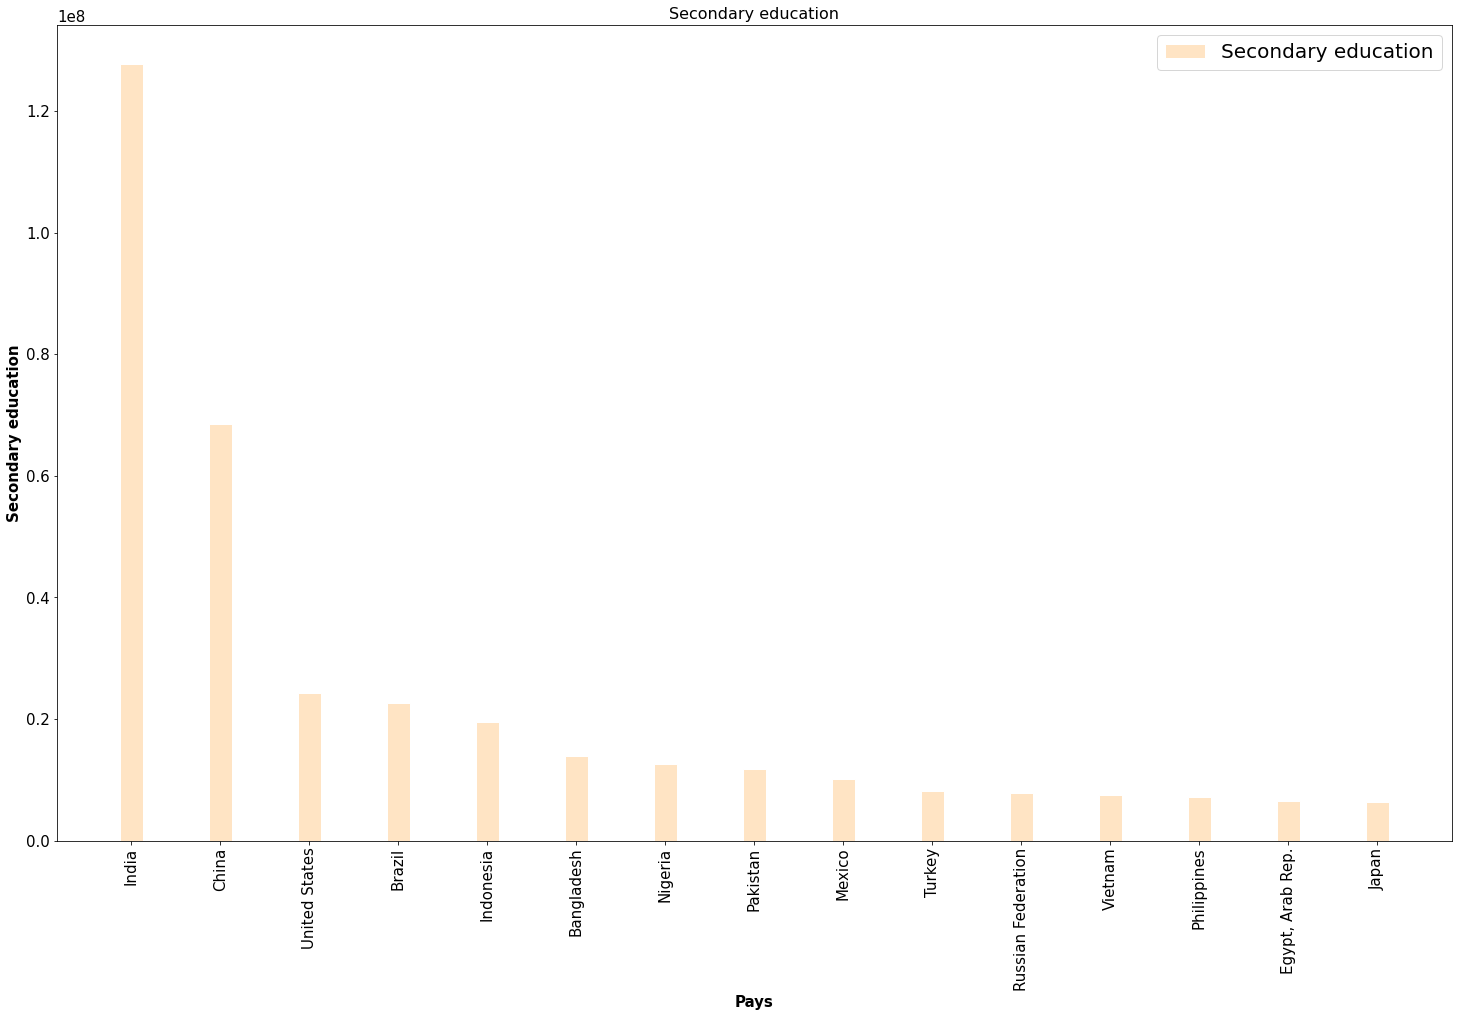

In [99]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = secondary_education_15['Last value']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r2, bars1, color='bisque', width=barWidth, edgecolor='white', label='Secondary education')
 
# Add xticks on the middle of the group bars
plt.xlabel('Pays', fontweight='bold')
plt.ylabel('Secondary education', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], secondary_education_15.index, rotation=90)

# Add a tilte
plt.title('Secondary education',fontsize=16)

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()

In [100]:
# Evolution 

secondary_education_evol = secondary_education_tot.loc[:,['Evolution 2014-2015','Evolution 2015-2016','Evolution Totale']].sort_values(by = 'Evolution Totale', ascending = False)
secondary_education_evol


Evolution 2014-2015  Evolution 2015-2016  Evolution Totale
Country Name                                                                              
Sao Tome and Principe                     11.580782            10.569225         23.374006
Ghana                                      7.714821             2.605777         10.521629
Gambia, The                                3.587441             3.845800          7.571207
Nepal                                      0.391006             3.159955          3.563317
Kazakhstan                                 0.883471             2.469719          3.375009
Ecuador                                    3.934372            -0.991299          2.904072
Tajikistan                                 0.481011             0.638814          1.122898
Bhutan                                          NaN                  NaN          0.115350
Djibouti                                  -1.325571             0.580920         -0.752351
Uzbekistan                                -2.105680             0.007479         -2.098359
Maldives                                        NaN                  NaN         -7.663067
Palau                                           NaN                  NaN        -35.349127
Afghanistan                                3.651102                  NaN               NaN
Albania                                   -6.130915                  NaN               NaN
Algeria                                   -0.020788                  NaN               NaN
Andorra                                    1.213347                  NaN               NaN
Angola                                          NaN                  NaN               NaN
Antigua and Barbuda                        0.580495                  NaN               NaN
Argentina                                       NaN                  NaN               NaN
Armenia                                   -1.339427                  NaN               NaN
Aruba                                           NaN                  NaN               NaN
Australia                                  4.809634                  NaN               NaN
Austria                                   -0.331520                  NaN               NaN
Azerbaijan                                -0.193962                  NaN               NaN
Bahamas, The                                    NaN                  NaN               NaN
Bahrain                                    3.359036                  NaN               NaN
Bangladesh                                      NaN                  NaN               NaN
Barbados                                        NaN                  NaN               NaN
Belarus                                   -0.613315                  NaN               NaN
Belgium                                    1.746278                  NaN               NaN
Belize                                     0.468267                  NaN               NaN
Benin                                      7.857037                  NaN               NaN
Bermuda                                   -1.294894                  NaN               NaN
Bolivia                                   -2.942039                  NaN               NaN
Bosnia and Herzegovina                    -5.438388                  NaN               NaN
Botswana                                        NaN                  NaN               NaN
Brazil                                    -3.079599                  NaN               NaN
Brunei Darussalam                         -3.807592                  NaN               NaN
Bulgaria                                  -1.427071                  NaN               NaN
Burkina Faso                              14.982658                  NaN               NaN
Burundi                                   12.752388                  NaN               NaN
Cabo Verde                                -1.865363                  NaN               NaN
Cambodia                    

In [101]:
secondary_education_evol.count()

Evolution 2014-2015    122
Evolution 2015-2016      9
Evolution Totale        12
dtype: int64

In [102]:
secondary_education_evol = secondary_education_evol.loc[:,[ 'Evolution 2014-2015']].sort_values(by = 'Evolution 2014-2015', ascending = False)
secondary_education_evol = secondary_education_evol.iloc[0:15,:]
secondary_education_evol['secondary_education_evol_15'] = secondary_education_evol['Evolution 2014-2015'].rank(ascending=True)
secondary_education_evol


Evolution 2014-2015  secondary_education_evol_15
Country Name                                                           
Niger                            15.674288                         15.0
Burkina Faso                     14.982658                         14.0
Malawi                           12.786443                         13.0
Burundi                          12.752388                         12.0
Cote d'Ivoire                    11.910808                         11.0
Sao Tome and Principe            11.580782                         10.0
Saudi Arabia                     11.461916                          9.0
Timor-Leste                       8.615829                          8.0
Guatemala                         8.231639                          7.0
Qatar                             7.992899                          6.0
Benin                             7.857037                          5.0
Ghana                             7.714821                          4.0
Pakistan                          7.589127                          3.0
Togo                              7.269662                          2.0
Sweden                            6.934435                          1.0

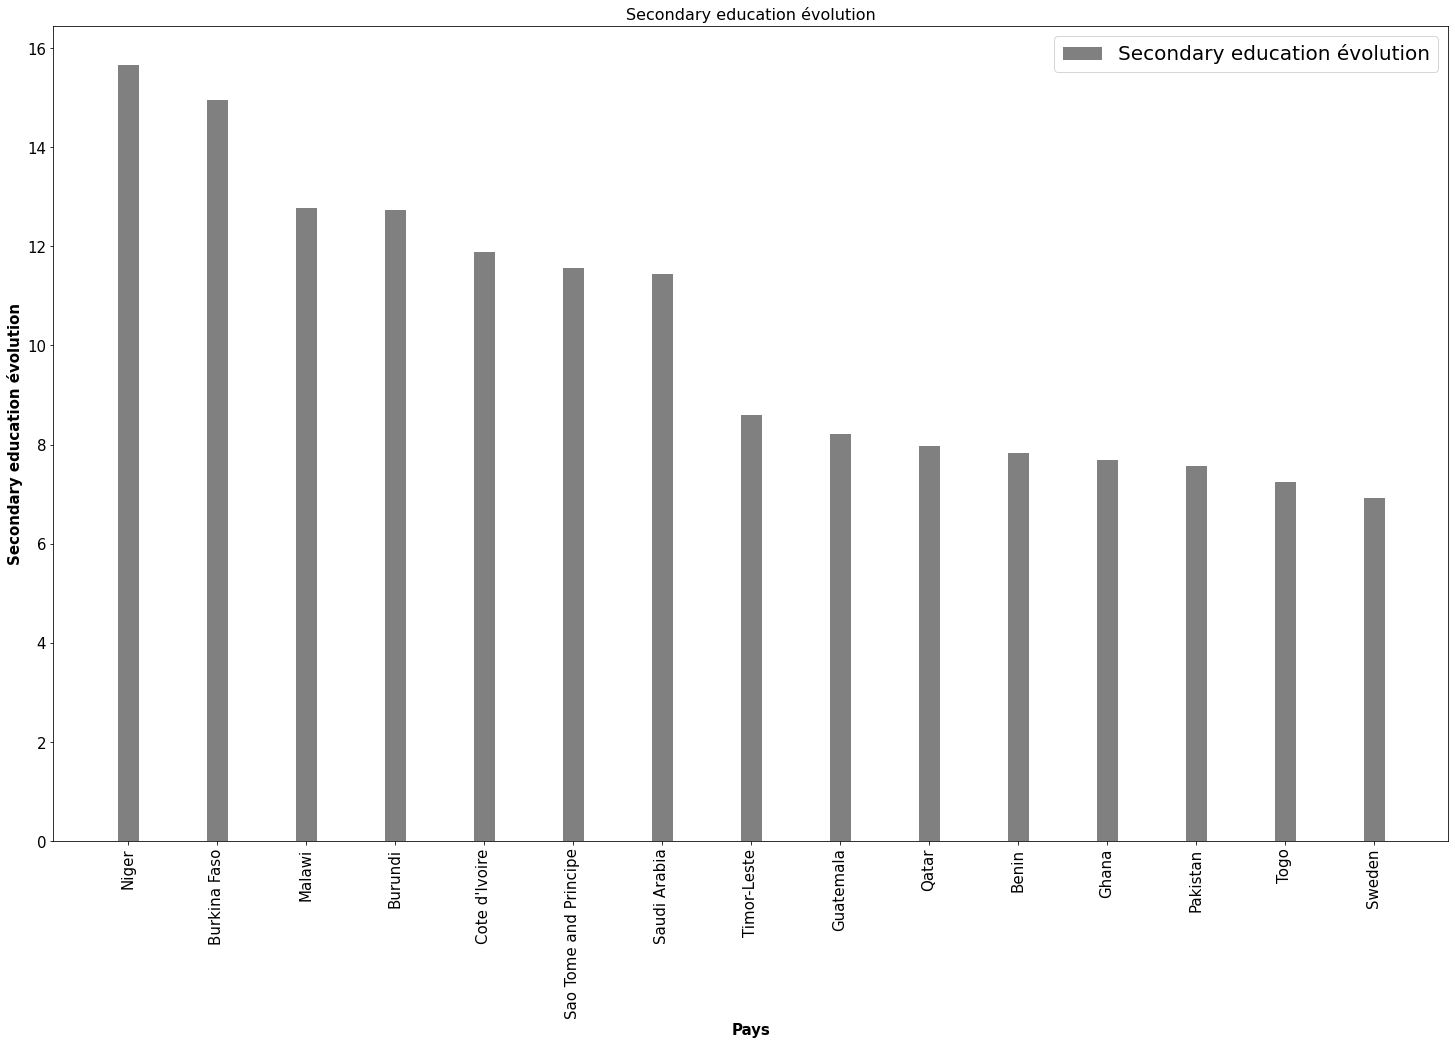

In [103]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = secondary_education_evol['Evolution 2014-2015']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r2, bars1, color='grey', width=barWidth, edgecolor='white', label='Secondary education évolution')
 
# Add xticks on the middle of the group bars
plt.xlabel('Pays', fontweight='bold')
plt.ylabel('Secondary education évolution', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], secondary_education_evol.index, rotation=90)

# Add a tilte
plt.title('Secondary education évolution',fontsize=16)

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()

In [104]:
# 5e indicateur : GDP per capita (current US$)

GDP_per_capita_tot = data_date_ok.loc[data_date_ok["Indicator Name"].isin(['GDP per capita (current US$)'  ])]
GDP_per_capita = GDP_per_capita_tot.copy()
GDP_per_capita = GDP_per_capita.loc[:,[ 'Last value']].sort_values(by = 'Last value', ascending = False)
GDP_per_capita 

Last value
Country Name                                 
Liechtenstein                   168146.015281
Luxembourg                      100573.139978
Bermuda                          85748.065414
Switzerland                      79890.524005
Macao SAR, China                 73186.960143
Norway                           70911.757159
Cayman Islands                   64100.907696
Ireland                          63861.921982
Iceland                          59976.942565
Qatar                            59324.338773
United States                    57638.159088
Denmark                          53549.700671
Singapore                        52962.491569
Sweden                           51949.271432
Australia                        49927.819509
San Marino                       47908.561413
Netherlands                      45669.814802
Austria                          44676.345835
Hong Kong SAR, China             43681.421951
Finland                          43402.863264
Canada                           42157.927991
Germany                          42069.597987
Belgium                          41236.266589
United Kingdom                   40341.408246
New Zealand                      39416.358733
Japan                            38900.569306
United Arab Emirates             37622.207456
Israel                           37175.742029
Andorra                          36988.622030
France                           36854.968280
Virgin Islands (U.S.)            36350.821635
Guam                             35562.567528
Italy                            30674.836069
Bahamas, The                     28785.477671
Puerto Rico                      28703.748347
Korea, Rep.                      27538.806128
Kuwait                           27359.230330
Brunei Darussalam                26939.417509
Spain                            26639.740588
Aruba                            25324.720362
Malta                            25172.498221
Cyprus                           23324.201735
Bahrain                          22579.093420
Slovenia                         21652.278330
Saudi Arabia                     20028.648207
Portugal                         19839.643151
Czech Republic                   18491.940112
Greece                           17930.164229
Estonia                          17727.492929
St. Kitts and Nevis              16596.826390
Slovak Republic                  16535.916864
Trinidad and Tobago              16040.524235
Barbados                         15891.626549
Venezuela, RB                    15692.412878
Uruguay                          15220.566025
Seychelles                       15075.719437
Oman                             14982.357924
Lithuania                        14879.680299
French Polynesia                 14530.777204
Antigua and Barbuda              14462.176279
Palau                            14428.140259
Latvia                           14064.660748
Chile                            13792.926054
Panama                           13680.236007
Hungary                          12814.949954
New Caledonia                    12579.595106
Argentina                        12440.320982
Poland                           12421.318909
Croatia                          12160.110629
Costa Rica                       11824.638102
Turkey                           10862.600399
Maldives                         10118.061183
Grenada                           9841.764050
Mauritius                         9630.944028
Romania                           9519.876801
Malaysia                          9508.237750
St. Lucia                         9364.821525
Russian Federation                8748.364504
Equatorial Guinea                 8747.353473
Brazil                            8649.948492
Lebanon                           8257.294391
Mexico                            8208.555984
China                             8123.180873
Dominica                          7906.721671
Kazakhstan                        7713.551343
Cuba                             

Text(0.5, 1.0, 'GDP per capita')

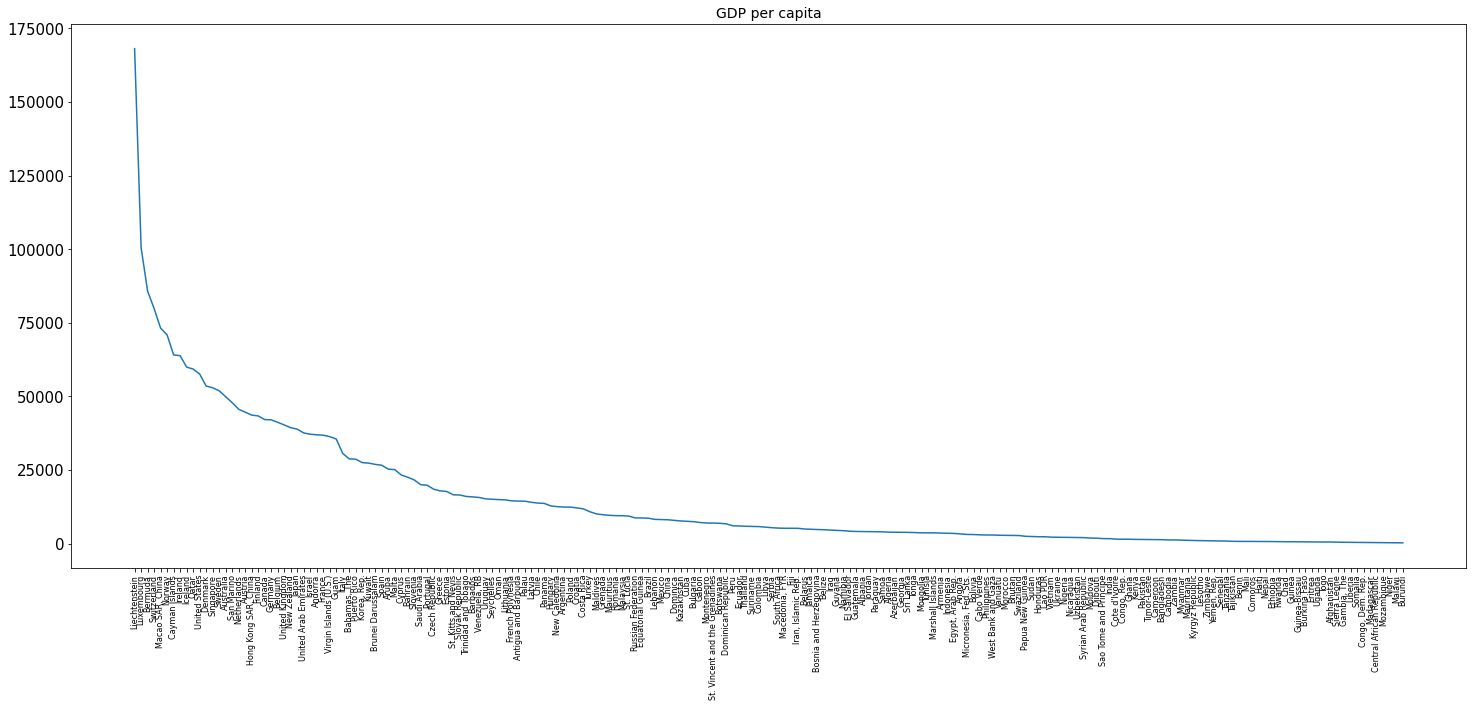

In [105]:
plt.figure(figsize=(25, 10))
plt.plot(GDP_per_capita)
plt.xticks(fontsize=8, rotation=90)
plt.title('GDP per capita',fontsize=14)

In [106]:
GDP_per_capita_15 = GDP_per_capita.copy()
GDP_per_capita_15 = GDP_per_capita_15.iloc[0:15,:]
GDP_per_capita_15['GDP per capita'] = GDP_per_capita_15['Last value'].rank(ascending=True)
GDP_per_capita_15['GDP_per_capita_15'] = 5 
GDP_per_capita_15['GDP_per_capita_15xscore'] = GDP_per_capita_15['GDP_per_capita_15'] * GDP_per_capita_15['GDP per capita']
GDP_per_capita_15


Last value  GDP per capita  GDP_per_capita_15  GDP_per_capita_15xscore
Country Name                                                                               
Liechtenstein     168146.015281            15.0                  5                     75.0
Luxembourg        100573.139978            14.0                  5                     70.0
Bermuda            85748.065414            13.0                  5                     65.0
Switzerland        79890.524005            12.0                  5                     60.0
Macao SAR, China   73186.960143            11.0                  5                     55.0
Norway             70911.757159            10.0                  5                     50.0
Cayman Islands     64100.907696             9.0                  5                     45.0
Ireland            63861.921982             8.0                  5                     40.0
Iceland            59976.942565             7.0                  5                     35.0
Qatar              59324.338773             6.0                  5                     30.0
United States      57638.159088             5.0                  5                     25.0
Denmark            53549.700671             4.0                  5                     20.0
Singapore          52962.491569             3.0                  5                     15.0
Sweden             51949.271432             2.0                  5                     10.0
Australia          49927.819509             1.0                  5                      5.0

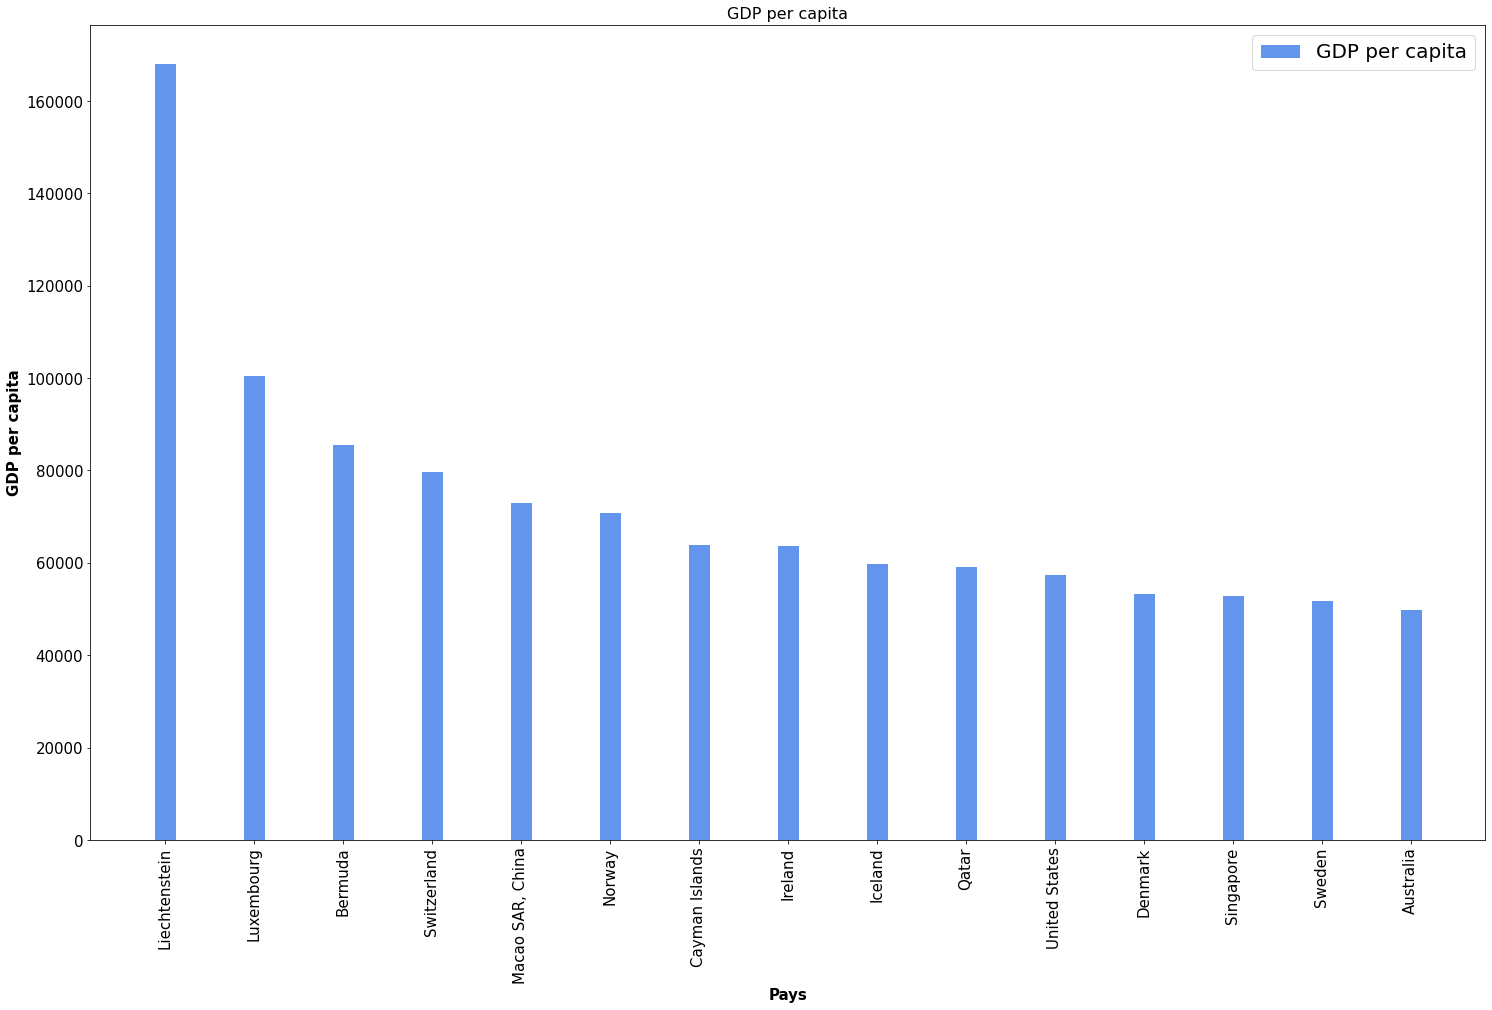

In [107]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = GDP_per_capita_15['Last value']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r2, bars1, color='cornflowerblue', width=barWidth, edgecolor='white', label='GDP per capita')
 
# Add xticks on the middle of the group bars
plt.xlabel('Pays', fontweight='bold')
plt.ylabel('GDP per capita', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], GDP_per_capita_15.index, rotation=90)

# Add a tilte
plt.title('GDP per capita',fontsize=16)

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()

In [108]:
# Evolution 

GDP_per_capita_tot_evol = GDP_per_capita_tot.loc[:,['Evolution 2014-2015','Evolution 2015-2016','Evolution Totale']].sort_values(by = 'Evolution Totale', ascending = False)
GDP_per_capita_tot_evol

Evolution 2014-2015  Evolution 2015-2016  Evolution Totale
Country Name                                                                              
Bangladesh                                11.580061            12.281055         25.283269
Ethiopia                                  13.009040             9.495862         23.740223
Palau                                     19.679172             3.192003         23.499335
Timor-Leste                                8.233954             8.562291         17.501261
Lao PDR                                    7.030472             8.970088         16.631200
Cambodia                                   5.870884             9.174554         15.584065
Grenada                                    8.909138             5.448185         14.842709
Iceland                                   -3.313449            18.217405         14.300331
Ireland                                   11.163873             2.771574         14.244862
Guatemala                                  6.394379             5.687947         12.446035
Guyana                                     3.193259             8.866497         12.342886
Antigua and Barbuda                        5.500592             5.879052         11.703027
Costa Rica                                 7.127730             3.667036         11.056142
Sudan                                     15.480129            -3.932022         10.939425
Bhutan                                     4.415381             6.050407         10.732936
Dominica                                   1.646274             8.106160          9.885883
Maldives                                   6.200313             3.329690          9.736454
Pakistan                                   8.478229             1.049069          9.616240
Kenya                                      1.116468             7.806811          9.010439
Gambia, The                                5.639883             3.098561          8.913199
Nicaragua                                  6.099921             2.643914          8.905112
India                                      1.484435             7.085746          8.675364
Panama                                     4.290280             4.158600          8.627296
Hong Kong SAR, China                       5.226821             3.141358          8.532372
Vietnam                                    2.664978             5.096064          7.896851
Dominican Republic                         3.186941             3.922903          7.234865
St. Lucia                                  5.793858             0.628201          6.458456
El Salvador                                3.468383             2.337390          5.886842
Marshall Islands                          -2.047237             8.089190          5.876348
China                                      5.019982             0.668812          5.722368
Ghana                                     -4.965274            11.192827          5.671799
United States                              3.425839             2.070428          5.567196
St. Vincent and the Grenadines             3.753809             1.549410          5.361380
Honduras                                   3.720877             1.504815          5.281685
St. Kitts and Nevis                        2.550372             2.587667          5.204034
Guinea-Bissau                             -4.289536             9.635063          4.932228
Egypt, Arab Rep.                           6.609826            -1.969192          4.510474
Somalia                                    1.943057             1.924593          3.905046
Philippines                                1.245191             2.526929          3.803585
Fiji                                      -2.453921             6.329171          3.719938
Guam                                       2.472881             0.999065          3.496652
Nepal                                      5.794325            -2.414235          3.240201
Uzbekistan                  

In [109]:
GDP_per_capita_tot_evol.count()

Evolution 2014-2015    186
Evolution 2015-2016    182
Evolution Totale       182
dtype: int64

In [110]:
GDP_per_capita_tot_evol = GDP_per_capita_tot_evol.sort_values(by = 'Evolution Totale', ascending = False)
GDP_per_capita_tot_evol

Evolution 2014-2015  Evolution 2015-2016  Evolution Totale
Country Name                                                                              
Bangladesh                                11.580061            12.281055         25.283269
Ethiopia                                  13.009040             9.495862         23.740223
Palau                                     19.679172             3.192003         23.499335
Timor-Leste                                8.233954             8.562291         17.501261
Lao PDR                                    7.030472             8.970088         16.631200
Cambodia                                   5.870884             9.174554         15.584065
Grenada                                    8.909138             5.448185         14.842709
Iceland                                   -3.313449            18.217405         14.300331
Ireland                                   11.163873             2.771574         14.244862
Guatemala                                  6.394379             5.687947         12.446035
Guyana                                     3.193259             8.866497         12.342886
Antigua and Barbuda                        5.500592             5.879052         11.703027
Costa Rica                                 7.127730             3.667036         11.056142
Sudan                                     15.480129            -3.932022         10.939425
Bhutan                                     4.415381             6.050407         10.732936
Dominica                                   1.646274             8.106160          9.885883
Maldives                                   6.200313             3.329690          9.736454
Pakistan                                   8.478229             1.049069          9.616240
Kenya                                      1.116468             7.806811          9.010439
Gambia, The                                5.639883             3.098561          8.913199
Nicaragua                                  6.099921             2.643914          8.905112
India                                      1.484435             7.085746          8.675364
Panama                                     4.290280             4.158600          8.627296
Hong Kong SAR, China                       5.226821             3.141358          8.532372
Vietnam                                    2.664978             5.096064          7.896851
Dominican Republic                         3.186941             3.922903          7.234865
St. Lucia                                  5.793858             0.628201          6.458456
El Salvador                                3.468383             2.337390          5.886842
Marshall Islands                          -2.047237             8.089190          5.876348
China                                      5.019982             0.668812          5.722368
Ghana                                     -4.965274            11.192827          5.671799
United States                              3.425839             2.070428          5.567196
St. Vincent and the Grenadines             3.753809             1.549410          5.361380
Honduras                                   3.720877             1.504815          5.281685
St. Kitts and Nevis                        2.550372             2.587667          5.204034
Guinea-Bissau                             -4.289536             9.635063          4.932228
Egypt, Arab Rep.                           6.609826            -1.969192          4.510474
Somalia                                    1.943057             1.924593          3.905046
Philippines                                1.245191             2.526929          3.803585
Fiji                                      -2.453921             6.329171          3.719938
Guam                                       2.472881             0.999065          3.496652
Nepal                                      5.794325            -2.414235          3.240201
Uzbekistan                  

In [111]:
GDP_per_capita_tot_evol = GDP_per_capita_tot_evol.loc[:,[ 'Evolution Totale']].sort_values(by = 'Evolution Totale', ascending = False)
GDP_per_capita_tot_evol = GDP_per_capita_tot_evol.iloc[0:15,:]
GDP_per_capita_tot_evol['GDP_per_capita_tot_evol_15'] = GDP_per_capita_tot_evol['Evolution Totale'].rank(ascending=True)
GDP_per_capita_tot_evol


Evolution Totale  GDP_per_capita_tot_evol_15
Country Name                                                     
Bangladesh                  25.283269                        15.0
Ethiopia                    23.740223                        14.0
Palau                       23.499335                        13.0
Timor-Leste                 17.501261                        12.0
Lao PDR                     16.631200                        11.0
Cambodia                    15.584065                        10.0
Grenada                     14.842709                         9.0
Iceland                     14.300331                         8.0
Ireland                     14.244862                         7.0
Guatemala                   12.446035                         6.0
Guyana                      12.342886                         5.0
Antigua and Barbuda         11.703027                         4.0
Costa Rica                  11.056142                         3.0
Sudan                       10.939425                         2.0
Bhutan                      10.732936                         1.0

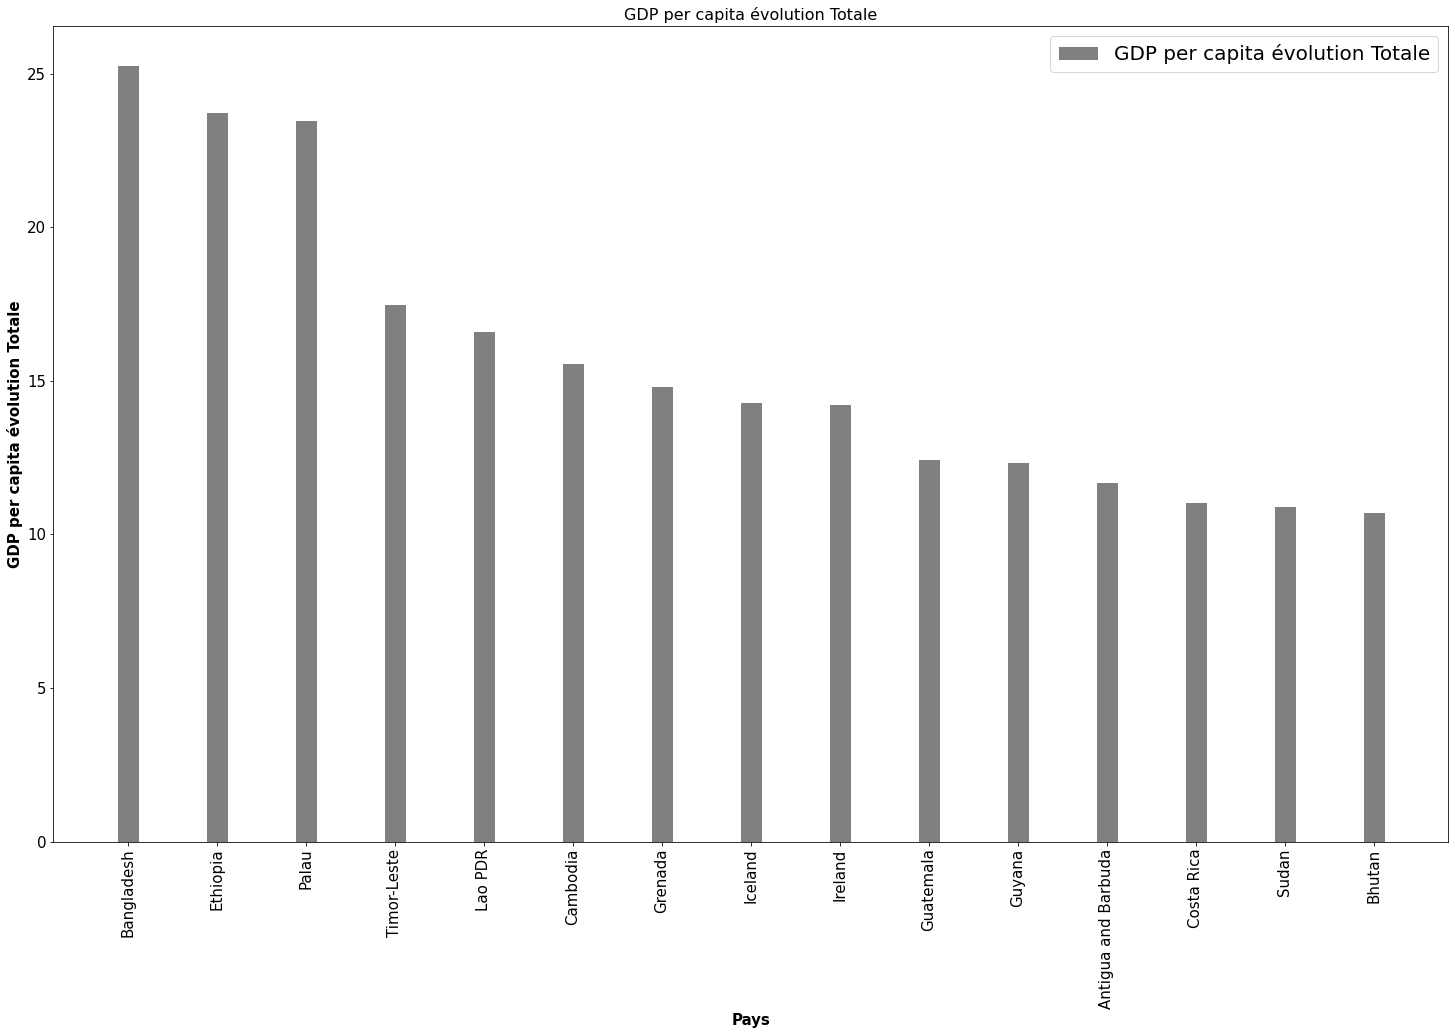

In [112]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = GDP_per_capita_tot_evol['Evolution Totale']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25, 15))
plt.bar(r2, bars1, color='grey', width=barWidth, edgecolor='white', label='GDP per capita évolution Totale')
 
# Add xticks on the middle of the group bars
plt.xlabel('Pays', fontweight='bold')
plt.ylabel('GDP per capita évolution Totale', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], GDP_per_capita_tot_evol.index, rotation=90)

# Add a tilte
plt.title('GDP per capita évolution Totale',fontsize=16)

 
# Create legend & Show graphic
plt.legend(prop={"size":20})
plt.show()

# Scoring total

In [113]:
# Scoring = last value

score_all = Population_totale_15.merge(tertiary_education_15, how='outer', on="Country Name")
score_all = score_all.merge(Internet_users_15, how='outer', on="Country Name")
score_all = score_all.merge(secondary_education_15, how='outer', on="Country Name")
score_all = score_all.merge(GDP_per_capita_15, how='outer', on="Country Name")

score_classique = score_all.copy()
score_classique = score_classique.loc[:,['score_population','score_tertiary','score_internet','score_secondary','GDP per capita']]
score_classique['Total score last value'] = score_classique.sum(axis=1)
score_classique = score_classique.sort_values(by = 'Total score last value', ascending = False)
score_classique


/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Last value_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


score_population  score_tertiary  score_internet  score_secondary  GDP per capita  Total score last value
Country Name                                                                                                                   
China                             15.0            15.0             NaN             14.0             NaN                    44.0
United States                     13.0            13.0             NaN             13.0             5.0                    44.0
India                             14.0            14.0             NaN             15.0             NaN                    43.0
Brazil                            11.0            12.0             NaN             12.0             NaN                    35.0
Indonesia                         12.0             9.0             NaN             11.0             NaN                    32.0
Liechtenstein                      NaN             NaN            14.0              NaN            15.0                    29.0
Bermuda                            NaN             NaN            13.0              NaN            13.0                    26.0
Luxembourg                         NaN             NaN            10.0              NaN            14.0                    24.0
Russian Federation                 7.0            11.0             NaN              5.0             NaN                    23.0
Iceland                            NaN             NaN            15.0              NaN             7.0                    22.0
Norway                             NaN             NaN             9.0              NaN            10.0                    19.0
Bangladesh                         8.0             NaN             NaN             10.0             NaN                    18.0
Nigeria                            9.0             NaN             NaN              9.0             NaN                    18.0
Pakistan                          10.0             NaN             NaN              8.0             NaN                    18.0
Mexico                             6.0             5.0             NaN              7.0             NaN                    18.0
Japan                              5.0             7.0             3.0              1.0             NaN                    16.0
Turkey                             NaN            10.0             NaN              6.0             NaN                    16.0
Philippines                        4.0             6.0             NaN              3.0             NaN                    13.0
Bahrain                            NaN             NaN            12.0              NaN             NaN                    12.0
Denmark                            NaN             NaN             8.0              NaN             4.0                    12.0
Qatar                              NaN             NaN             6.0              NaN             6.0                    12.0
Switzerland                        NaN             NaN             NaN              NaN            12.0                    12.0
Andorra                            NaN             NaN            11.0              NaN             NaN                    11.0
Macao SAR, China                   NaN             NaN             NaN              NaN            11.0                    11.0
Cayman Islands                     NaN             NaN             NaN              NaN             9.0                     9.0
Ireland                            NaN             NaN             NaN              NaN             8.0                     8.0
Korea, Rep.                        NaN             4.0             4.0              NaN             NaN                     8.0
Iran, Islamic Rep.                 NaN             8.0             NaN              NaN             NaN                     8.0
United Kingdom                     NaN             NaN             7.0              NaN             NaN                     7.0
Vietnam                            1.0             NaN

In [114]:
score_classique_3 = score_classique.iloc[0:3,:]
score_classique_3 = score_classique_3.index.tolist()
score_classique_3

['China', 'United States', 'India']

In [115]:
# Scoring = all growth

score_all_growth = Evolution_totale_15.merge(tertiary_education_evol, how='outer', on="Country Name")
score_all_growth = score_all_growth.merge(Internet_users_evol, how='outer', on="Country Name")
score_all_growth = score_all_growth.merge(secondary_education_evol, how='outer', on="Country Name")
score_all_growth = score_all_growth.merge(GDP_per_capita_tot_evol, how='outer', on="Country Name")

score_classique_growth = score_all_growth.copy()
score_classique_growth = score_classique_growth.loc[:,['score_évolution','Evolution 2014-2015_15','Evolution Totale_15','secondary_education_evol_15','GDP_per_capita_tot_evol_15']]
score_classique_growth['Total score growth'] = score_classique_growth.sum(axis=1)
score_classique_growth = score_classique_growth.sort_values(by = 'Total score growth', ascending = False)
score_classique_growth


score_évolution  Evolution 2014-2015_15  Evolution Totale_15  secondary_education_evol_15  GDP_per_capita_tot_evol_15  Total score growth
Country Name                                                                                                                                                    
Niger                             13.0                     NaN                 14.0                         15.0                         NaN                42.0
Burundi                            6.0                     NaN                 15.0                         12.0                         NaN                33.0
Qatar                             11.0                     7.0                  NaN                          6.0                         NaN                24.0
Sao Tome and Principe              NaN                    14.0                  NaN                         10.0                         NaN                24.0
Ethiopia                           NaN                     NaN                  9.0                          NaN                        14.0                23.0
Timor-Leste                        NaN                     NaN                  NaN                          8.0                        12.0                20.0
Congo, Dem. Rep.                   8.0                     NaN                 11.0                          NaN                         NaN                19.0
Oman                              15.0                     2.0                  NaN                          NaN                         NaN                17.0
Mozambique                         NaN                    10.0                  6.0                          NaN                         NaN                16.0
Seychelles                         NaN                    15.0                  NaN                          NaN                         NaN                15.0
Benin                              NaN                     NaN                 10.0                          5.0                         NaN                15.0
Bangladesh                         NaN                     NaN                  NaN                          NaN                        15.0                15.0
Cote d'Ivoire                      NaN                     4.0                  NaN                         11.0                         NaN                15.0
Equatorial Guinea                 14.0                     NaN                  NaN                          NaN                         NaN                14.0
Burkina Faso                       NaN                     NaN                  NaN                         14.0                         NaN                14.0
Cambodia                           NaN                     NaN                  3.0                          NaN                        10.0                13.0
Guatemala                          NaN                     NaN                  NaN                          7.0                         6.0                13.0
Egypt, Arab Rep.                   NaN                    13.0                  NaN                          NaN                         NaN                13.0
Palau                              NaN                     NaN                  NaN                          NaN                        13.0                13.0
Myanmar                            NaN                     NaN                 13.0                          NaN                         NaN                13.0
Malawi                             NaN                     NaN                  NaN                         13.0                         NaN                13.0
Cameroon                           NaN                    12.0                  NaN                          NaN                         NaN                12.0
Bahrain                           12.0                     NaN                  NaN                          NaN                         NaN                12.

In [116]:
score_classique_growth_3 = score_classique_growth.iloc[0:3,:]
score_classique_growth_3 = score_classique_growth_3.index.tolist()
score_classique_growth_3

['Niger', 'Burundi', 'Qatar']

In [117]:
# Scoring = all 

score_all_tot = score_classique.merge(score_classique_growth, how='outer', on="Country Name")
score_all_tot = score_all_tot.loc[:,['Total score last value','Total score growth']]
score_all_tot['Total score'] = score_all_tot.sum(axis=1)
score_all_tot = score_all_tot.sort_values(by = 'Total score', ascending = False)
score_all_tot


Total score last value  Total score growth  Total score
Country Name                                                                  
China                                    44.0                 NaN         44.0
United States                            44.0                 NaN         44.0
India                                    43.0                 NaN         43.0
Niger                                     NaN                42.0         42.0
Qatar                                    12.0                24.0         36.0
Brazil                                   35.0                 NaN         35.0
Burundi                                   NaN                33.0         33.0
Bangladesh                               18.0                15.0         33.0
Indonesia                                32.0                 NaN         32.0
Iceland                                  22.0                 8.0         30.0
Liechtenstein                            29.0                 NaN         29.0
Bermuda                                  26.0                 NaN         26.0
Ethiopia                                  3.0                23.0         26.0
Turkey                                   16.0                 9.0         25.0
Bahrain                                  12.0                12.0         24.0
Sao Tome and Principe                     NaN                24.0         24.0
Luxembourg                               24.0                 NaN         24.0
Russian Federation                       23.0                 NaN         23.0
Pakistan                                 18.0                 3.0         21.0
Timor-Leste                               NaN                20.0         20.0
Norway                                   19.0                 NaN         19.0
Congo, Dem. Rep.                          NaN                19.0         19.0
Mexico                                   18.0                 NaN         18.0
Egypt, Arab Rep.                          5.0                13.0         18.0
Nigeria                                  18.0                 NaN         18.0
Oman                                      NaN                17.0         17.0
Japan                                    16.0                 NaN         16.0
Mozambique                                NaN                16.0         16.0
Ireland                                   8.0                 7.0         15.0
Seychelles                                NaN                15.0         15.0
Benin                                     NaN                15.0         15.0
Cote d'Ivoire                             NaN                15.0         15.0
Burkina Faso                              NaN                14.0         14.0
Equatorial Guinea                         NaN                14.0         14.0
Myanmar                                   NaN                13.0         13.0
Malawi                                    NaN                13.0         13.0
Palau                                     NaN                13.0         13.0
Guatemala                                 NaN                13.0         13.0
Cambodia                                  NaN                13.0         13.0
Philippines                              13.0                 NaN         13.0
Namibia                                   NaN                12.0         12.0
Cameroon                                  NaN                12.0         12.0
Denmark                                  12.0                 NaN         12.0
Switzerland                              12.0                 NaN         12.0
Andorra                                  11.0                 NaN         11.0
Morocco                                   NaN                11.0         11.0
Togo                                      NaN                11.0         11.0
Lao PDR                                   NaN                11.0         11.0
Macao SAR, China                         11.0                 NaN        

In [118]:
score_all_tot_3 = score_all_tot.iloc[0:3,:]
score_all_tot_3 = score_all_tot_3.index.tolist()
score_all_tot_3

['China', 'United States', 'India']

In [119]:
evol_pays_3 = StatsData_1_selec.loc[StatsData_1_selec['Country Name'].isin(score_all_tot_3)]
evol_pays_3 = evol_pays_3.loc[:,['Country Name','Indicator Name','Last value growth']]
evol_pays_3

Country Name                                     Indicator Name  Last value growth
243087          China  Enrolment in secondary general, both sexes (nu...          -1.275684
243094          China  Enrolment in tertiary education, all programme...           3.442384
243135          China                       GDP per capita (current US$)           5.722368
243265          China                    Internet users (per 100 people)          11.064718
244197          China                       Population growth (annual %)           6.945707
244423          China                                  Population, total           1.055143
415342          India  Enrolment in secondary general, both sexes (nu...          -0.047663
415349          India  Enrolment in tertiary education, all programme...           5.944635
415390          India                       GDP per capita (current US$)           8.675364
415520          India                    Internet users (per 100 people)          40.700776
416452          India                       Population growth (annual %)          -3.456869
416678          India                                  Population, total           2.342763
847812  United States  Enrolment in secondary general, both sexes (nu...                NaN
847819  United States  Enrolment in tertiary education, all programme...          -0.855280
847860  United States                       GDP per capita (current US$)           5.567196
847990  United States                    Internet users (per 100 people)           4.351694
848922  United States                       Population growth (annual %)          -6.771803
849148  United States                                  Population, total           1.432699

In [120]:
evol_pays_China = evol_pays_3.loc[evol_pays_3['Country Name'].isin(['China'])]
evol_pays_China

Country Name                                     Indicator Name  Last value growth
243087        China  Enrolment in secondary general, both sexes (nu...          -1.275684
243094        China  Enrolment in tertiary education, all programme...           3.442384
243135        China                       GDP per capita (current US$)           5.722368
243265        China                    Internet users (per 100 people)          11.064718
244197        China                       Population growth (annual %)           6.945707
244423        China                                  Population, total           1.055143

In [121]:
evol_pays_US = evol_pays_3.loc[evol_pays_3['Country Name'].isin(['United States'])]
evol_pays_US

Country Name                                     Indicator Name  Last value growth
847812  United States  Enrolment in secondary general, both sexes (nu...                NaN
847819  United States  Enrolment in tertiary education, all programme...          -0.855280
847860  United States                       GDP per capita (current US$)           5.567196
847990  United States                    Internet users (per 100 people)           4.351694
848922  United States                       Population growth (annual %)          -6.771803
849148  United States                                  Population, total           1.432699

In [122]:
evol_pays_India = evol_pays_3.loc[evol_pays_3['Country Name'].isin(['India'])]
evol_pays_India

Country Name                                     Indicator Name  Last value growth
415342        India  Enrolment in secondary general, both sexes (nu...          -0.047663
415349        India  Enrolment in tertiary education, all programme...           5.944635
415390        India                       GDP per capita (current US$)           8.675364
415520        India                    Internet users (per 100 people)          40.700776
416452        India                       Population growth (annual %)          -3.456869
416678        India                                  Population, total           2.342763

In [123]:
# Variance des 3 pays séléctionnés

var_3 = StatsData_1_selec.loc[StatsData_1_selec['Country Name'].isin(score_all_tot_3)]
var_3 = var_3.loc[:,['Country Name','Indicator Name','Last value']]
var_3

Country Name                                     Indicator Name    Last value
243087          China  Enrolment in secondary general, both sexes (nu...  6.857188e+07
243094          China  Enrolment in tertiary education, all programme...  4.336739e+07
243135          China                       GDP per capita (current US$)  8.123181e+03
243265          China                    Internet users (per 100 people)  5.320000e+01
244197          China                       Population growth (annual %)  5.414785e-01
244423          China                                  Population, total  1.378665e+09
415342          India  Enrolment in secondary general, both sexes (nu...  1.277872e+08
415349          India  Enrolment in tertiary education, all programme...  3.210742e+07
415390          India                       GDP per capita (current US$)  1.709592e+03
415520          India                    Internet users (per 100 people)  2.954716e+01
416452          India                       Population growth (annual %)  1.148215e+00
416678          India                                  Population, total  1.324171e+09
847812  United States  Enrolment in secondary general, both sexes (nu...  2.422978e+07
847819  United States  Enrolment in tertiary education, all programme...  1.953173e+07
847860  United States                       GDP per capita (current US$)  5.763816e+04
847990  United States                    Internet users (per 100 people)  7.617674e+01
848922  United States                       Population growth (annual %)  6.928013e-01
849148  United States                                  Population, total  3.231275e+08

In [124]:
var_3['Indicator Name'].unique().tolist()

['Enrolment in secondary general, both sexes (number)',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'GDP per capita (current US$)',
 'Internet users (per 100 people)',
 'Population growth (annual %)',
 'Population, total']

In [125]:
var_pop_3 = var_3.loc[var_3['Indicator Name'].isin(['Population, total'])]
var_pop_3

Country Name     Indicator Name    Last value
244423          China  Population, total  1.378665e+09
416678          India  Population, total  1.324171e+09
849148  United States  Population, total  3.231275e+08

In [126]:
mean_pop = Population_totale.mean()
mean_pop

Last value    3.760968e+07
dtype: float64

In [127]:
var_pop = Population_totale.var()
var_pop

Last value    1.990186e+16
dtype: float64

In [128]:
var_pop_3['mean_pop'] = mean_pop['Last value']
var_pop_3['var_pop'] = var_pop['Last value']
var_pop_3

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Country Name     Indicator Name    Last value      mean_pop       var_pop
244423          China  Population, total  1.378665e+09  3.760968e+07  1.990186e+16
416678          India  Population, total  1.324171e+09  3.760968e+07  1.990186e+16
849148  United States  Population, total  3.231275e+08  3.760968e+07  1.990186e+16

In [129]:
var_pop_3['différence moyenne'] = (var_pop_3['Last value'] - var_pop_3['mean_pop'])**2
var_pop_3['différence vars'] = var_pop_3['différence moyenne'] - var_pop_3['var_pop']
var_pop_3

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Country Name     Indicator Name    Last value      mean_pop       var_pop  différence moyenne  différence vars
244423          China  Population, total  1.378665e+09  3.760968e+07  1.990186e+16        1.798429e+18     1.778528e+18
416678          India  Population, total  1.324171e+09  3.760968e+07  1.990186e+16        1.655241e+18     1.635339e+18
849148  United States  Population, total  3.231275e+08  3.760968e+07  1.990186e+16        8.152043e+16     6.161857e+16

In [130]:
enrol_tert_3 = var_3.loc[var_3['Indicator Name'].isin(['Enrolment in tertiary education, all programmes, both sexes (number)'])]
enrol_tert_3


Country Name                                     Indicator Name  Last value
243094          China  Enrolment in tertiary education, all programme...  43367392.0
415349          India  Enrolment in tertiary education, all programme...  32107420.0
847819  United States  Enrolment in tertiary education, all programme...  19531728.0

In [131]:
mean_enrol_tert = tertiary_education.mean()
mean_enrol_tert = tertiary_education.var()
enrol_tert_3['mean_enrol'] = mean_enrol_tert['Last value']
enrol_tert_3['var_enrol'] = mean_enrol_tert['Last value']
enrol_tert_3['différence moyenne'] = (enrol_tert_3['Last value'] - enrol_tert_3['mean_enrol'])**2
enrol_tert_3['différence vars'] = enrol_tert_3['différence moyenne'] - enrol_tert_3['var_enrol']
enrol_tert_3

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

Country Name                                     Indicator Name  Last value    mean_enrol     var_enrol  différence moyenne  différence vars
243094          China  Enrolment in tertiary education, all programme...  43367392.0  1.830789e+13  1.830789e+13        3.351771e+26     3.351771e+26
415349          India  Enrolment in tertiary education, all programme...  32107420.0  1.830789e+13  1.830789e+13        3.351775e+26     3.351775e+26
847819  United States  Enrolment in tertiary education, all programme...  19531728.0  1.830789e+13  1.830789e+13        3.351780e+26     3.351780e+26

In [132]:
enrol_sec_3 = var_3.loc[var_3['Indicator Name'].isin(['Enrolment in secondary general, both sexes (number)'])]
enrol_sec_3

Country Name                                     Indicator Name   Last value
243087          China  Enrolment in secondary general, both sexes (nu...   68571880.0
415342          India  Enrolment in secondary general, both sexes (nu...  127787176.0
847812  United States  Enrolment in secondary general, both sexes (nu...   24229776.0

In [133]:
mean_sec = secondary_education.mean()
var_sec = secondary_education.var()
enrol_sec_3['mean_enrol'] = mean_sec['Last value']
enrol_sec_3['var_enrol'] = var_sec['Last value']
enrol_sec_3['différence moyenne'] = (enrol_sec_3['Last value'] - enrol_sec_3['mean_enrol'])**2
enrol_sec_3['différence vars'] = enrol_sec_3['différence moyenne'] - enrol_sec_3['var_enrol']
enrol_sec_3

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

Country Name                                     Indicator Name   Last value    mean_enrol     var_enrol  différence moyenne  différence vars
243087          China  Enrolment in secondary general, both sexes (nu...   68571880.0  2.746193e+06  1.188090e+14        4.333021e+15     4.214212e+15
415342          India  Enrolment in secondary general, both sexes (nu...  127787176.0  2.746193e+06  1.188090e+14        1.563525e+16     1.551644e+16
847812  United States  Enrolment in secondary general, both sexes (nu...   24229776.0  2.746193e+06  1.188090e+14        4.615443e+14     3.427354e+14

In [145]:
enrol_sec_3_ok = enrol_sec_3.loc[:,['Country Name','Indicator Name','différence vars']]
enrol_sec_3_ok

Country Name                                     Indicator Name  différence vars
243087          China  Enrolment in secondary general, both sexes (nu...     4.214212e+15
415342          India  Enrolment in secondary general, both sexes (nu...     1.551644e+16
847812  United States  Enrolment in secondary general, both sexes (nu...     3.427354e+14

In [146]:
enrol_tert_3_ok = enrol_tert_3.loc[:,['Country Name','Indicator Name','différence vars']]
enrol_tert_3_ok

Country Name                                     Indicator Name  différence vars
243094          China  Enrolment in tertiary education, all programme...     3.351771e+26
415349          India  Enrolment in tertiary education, all programme...     3.351775e+26
847819  United States  Enrolment in tertiary education, all programme...     3.351780e+26

In [147]:
var_pop_3_ok = var_pop_3.loc[:,['Country Name','Indicator Name','différence vars']]
var_pop_3_ok

Country Name     Indicator Name  différence vars
244423          China  Population, total     1.778528e+18
416678          India  Population, total     1.635339e+18
849148  United States  Population, total     6.161857e+16